# **POTENTIAL CUSTOMER PREDICTION TO OPEN TERM DEPOSITS IN BANK MARKETING CAMPAIGN**

In [1]:
!pip install category_encoders

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from scipy.stats import normaltest, mannwhitneyu, chi2_contingency

# data prep
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, StandardScaler,OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

# import PIPELINE KHUSUS dari imblearn
from imblearn.pipeline import Pipeline

# model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector

 # import beberapa metode undersampling dan oversampling
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NeighbourhoodCleaningRule, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE


# evaluation
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score


# Bussiness prob understanding

## Background

Dalam kampanye pemasaran yang dilakukan oleh sebuah bank, terlihat adanya penurunan signifikan dalam tingkat penerimaan tawaran dibandingkan dengan kampanye sebelumnya. Kampanye sebelumnya berhasil mencatatkan tingkat penerimaan sebesar 25,2%, sementara pada kampanye kali ini hanya tercatat 11,8%. Penurunan ini terjadi meskipun jumlah nasabah yang dihubungi hampir tujuh kali lipat lebih banyak dibandingkan dengan kampanye sebelumnya. Hal ini menunjukkan bahwa meskipun jumlah kontak yang dilakukan meningkat, strategi yang diterapkan belum efektif dalam menyasar segmen nasabah yang tepat.

Analisis lebih lanjut mengungkapkan bahwa sebagian besar penerima tawaran pada kampanye ini berasal dari segmen nasabah baru, yaitu mereka yang sebelumnya tidak terlibat dalam kampanye. Segmen nasabah baru ini menunjukkan potensi yang cukup besar, namun ketergantungan pada mereka juga mencerminkan kurangnya keberhasilan dalam mempertahankan nasabah lama yang sebelumnya memberikan respons positif terhadap tawaran.

Dengan total 36.658 calon pelanggan yang terlibat dalam kampanye ini, hanya 4.337 nasabah (11,8%) yang akhirnya berlangganan produk deposito berjangka. Persentase keberhasilan yang rendah ini, yang menurun dari 25,2% pada kampanye sebelumnya, menunjukkan bahwa mayoritas calon pelanggan tidak tertarik untuk menjadi pelanggan baru. Kondisi ini menimbulkan tantangan besar bagi perusahaan untuk menentukan strategi pemasaran yang lebih efektif dan relevan dalam kampanye mendatang, terutama dalam mempertahankan nasabah lama dan meningkatkan efektivitas penawaran kepada segmen nasabah yang tepat.

## **Permasalahan**

Meskipun kampanye pemasaran kali ini berhasil menjangkau lebih dari 36.000 calon pelanggan, tingkat keberhasilannya hanya mencapai 11,8%, yang lebih rendah dibandingkan kampanye sebelumnya dengan tingkat keberhasilan sebesar 25,2%. Penurunan ini kemungkinan disebabkan oleh jumlah nasabah yang dihubungi pada kampanye saat ini yang hampir tujuh kali lipat lebih banyak dibandingkan dengan kampanye sebelumnya. Hal ini menunjukkan bahwa meskipun jumlah nasabah yang dihubungi meningkat, efektivitas strategi kampanye dalam menjangkau segmen nasabah yang tepat belum maksimal.

Menghubungi seluruh nasabah untuk menawarkan produk deposito berjangka tentu tidak efisien dan akan memerlukan biaya yang sangat besar. Oleh karena itu, perusahaan ingin memprediksi nasabah mana yang memiliki kemungkinan besar untuk tertarik pada produk deposito, agar tim pemasaran dapat menargetkan mereka dengan cara yang lebih terarah, efektif, dan efisien.

## **Fokus Analisa**

1. Apa saja faktor yang memengaruhi keputusan nasabah untuk menerima tawaran deposito?
2. Bagaimana Pengaruh Status Kredit (Default, Housing, Loan) Terhadap Keputusan Nasabah Untuk Mengambil Produk Deposito?
3. Saluran komunikasi (contact) apa yang paling efektif untuk meningkatkan tingkat penerimaan tawaran deposito?
4. Bagaimana kondisi ekonomi makro memengaruhi keputusan nasabah untuk menerima tawaran deposito?
5. Kapan waktu terbaik untuk menjalankan kampanye promosi (berdasarkan month, day_of_week, pdays)?

## **Tujuan**

Perusahaan ingin meningkatkan efektivitas kampanye pemasaran dengan menargetkan nasabah yang lebih potensial untuk menerima tawaran term deposito. Berdasarkan masalah yang dihadapi terkait penurunan tingkat penerimaan tawaran dalam kampanye pemasaran sebelumnya, tujuan dari pemodelan ini adalah sebagai berikut:

1. **Meningkatkan Akurasi Prediksi Nasabah Potensial**:
   - Tujuan utama dari modeling ini adalah membangun dan menerapkan model klasifikasi yang dapat memprediksi nasabah yang memiliki probabilitas tinggi untuk menerima tawaran term deposito. Dengan menggunakan algoritma machine learning yang lebih canggih, model ini diharapkan dapat memberikan prediksi yang lebih akurat dibandingkan metode konvensional yang digunakan sebelumnya.

2. **Optimalisasi Strategi Kampanye Pemasaran**:
   - Dengan adanya model prediksi yang lebih tepat, divisi pemasaran dapat mengoptimalkan segmentasi dan penargetan nasabah, sehingga lebih efisien dalam mengalokasikan sumber daya dan mengurangi biaya serta waktu yang terbuang. Hal ini diharapkan dapat meningkatkan tingkat penerimaan tawaran dan meminimalkan pemborosan dalam kampanye mendatang.

3. **Menargetkan Segmen Nasabah yang Tepat**:
   - Pemodelan ini bertujuan untuk mengidentifikasi nasabah yang paling berpotensi dari berbagai segmen, baik nasabah lama yang pernah merespons positif maupun nasabah baru. Dengan menggunakan data dari kampanye sebelumnya dan informasi demografis nasabah, model ini diharapkan dapat menyaring nasabah yang cenderung lebih responsif terhadap penawaran term deposito.

4. **Meningkatkan Retensi dan Mengurangi Ketergantungan pada Nasabah Baru**:
   - Salah satu tujuan dari pemodelan ini adalah untuk mengurangi ketergantungan pada segmen nasabah baru, yang cenderung memiliki potensi lebih tinggi namun juga meningkatkan risiko. Fokus pada pemeliharaan hubungan dengan nasabah lama yang memberikan respons positif pada kampanye sebelumnya akan membantu meningkatkan keberlanjutan hasil kampanye.

5. **Hyperparameter Tuning untuk Meningkatkan Performa Model**:
   - Mengoptimalkan parameter model melalui proses hyperparameter tuning adalah bagian penting dari modeling ini. Dengan tuning yang tepat, diharapkan model dapat memberikan prediksi yang lebih presisi dan sesuai dengan kebutuhan bisnis.

Dengan mencapai tujuan-tujuan tersebut, perusahaan diharapkan dapat:
   - Meningkatkan **tingkat penerimaan** tawaran term deposito melalui segmentasi yang lebih akurat.
   - Mengoptimalkan **strategi pemasaran** dan **pengelolaan anggaran kampanye**.
   - **Meningkatkan loyalitas nasabah** dengan memberikan penawaran yang lebih relevan dan terpersonalisasi berdasarkan prediksi yang lebih tepat.

## **Pendekatan Analitis**

Langkah yang akan dilakukan adalah menganalisis data yang diperoleh untuk mengidentifikasi pola dari berbagai fitur yang ada, yang dapat karakteristik dari masing-masing nasabah. Model klasifikasi ini akan digunakan untuk membantu perusahaan dalam menyediakan alat prediksi nasabah potensial dengan bantuan algoritma machine learning. Secara detail, analisis yang akan dilakukan adalah sebagai berikut:

- **Data Cleaning**: Membersihkan data, memastikan tidak ada data hilang, memastikan dataset yang digunakan valid dan sesuai dengan fitur yang ada
- **Preprocessing Data**: Melakukan encoding untuk fitur kategorikal, normalisasi untuk fitur numerik, dan membagi data menjadi training dan testing set.
- **Benchmarking Model Klasifikasi**: Melakukan benchmarking model dengan beberapa model seperti Logistic Regression, Decision Trees, Random Forest, XGBoost dan lainya, serta Evaluasi menggunakan metrik seperti akurasi, precision dan recall.
- **Hyperparameter Tuning**: Melakukan tuning parameter model untuk optimasi kinerja.
- **Penerapan Model**: Menerapkan model pada data nasabah untuk memprediksi yang berpotensi menerima tawaran term deposito.

## **Metrik Evaluasi**

Metrik evaluasi yang akan digunakan adalah Recall dan precision dengan keterangan sebagai berikut:
1. `Recall` <br>
    - Recall adalah salah satu metrik evaluasi yang digunakan dalam model klasifikasi untuk mengukur sejauh mana model berhasil mengidentifikasi semua sampel positif dalam dataset. Recall menunjukkan proporsi dari jumlah kasus positif yang sebenarnya (aktual) yang berhasil diprediksi dengan benar oleh model.
    - Recall menjawab pertanyaan: "Dari semua kasus positif yang sebenarnya, berapa banyak yang berhasil ditemukan oleh model?"
    - Nilai recall berkisar antara 0 dan 1:
      - Recall tinggi (mendekati 1): Model dapat mengidentifikasi hampir semua kasus positif.
      - Recall rendah (mendekati 0): Model gagal mendeteksi banyak kasus positif.

2. `Precision`<br>
  - Precision adalah salah satu metrik evaluasi dalam model klasifikasi yang digunakan untuk mengukur seberapa akurat prediksi positif dari model. Dengan kata lain, precision menunjukkan proporsi prediksi positif yang benar-benar relevan atau benar sesuai dengan data aktual.
  - Precision menjawab pertanyaan: "Dari semua prediksi positif yang dibuat oleh model, berapa banyak yang benar-benar positif?"
  - Nilai precision berkisar antara 0 hingga 1:
    - Precision tinggi (mendekati 1): Sebagian besar prediksi positif model benar.
    - Precision rendah (mendekati 0): Banyak prediksi positif model salah.

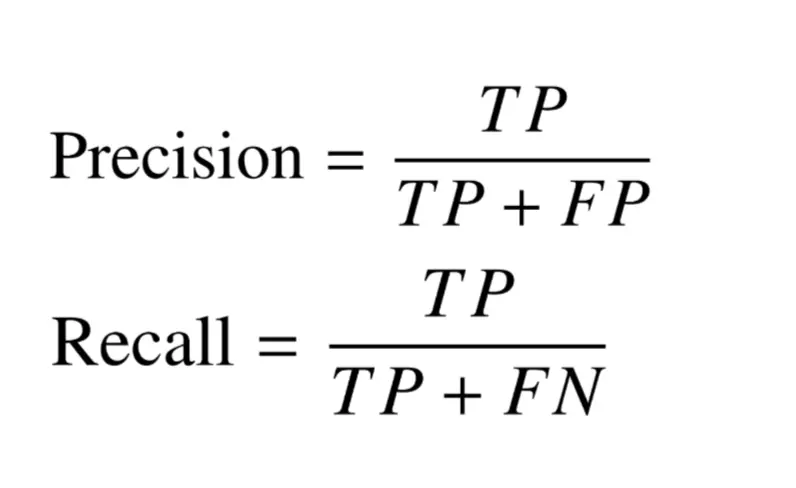

Komponen Kunci

- True Positives (TP): Jumlah kasus yang model prediksi dengan benar sebagai positif.
- True Negatives (TN): Jumlah kasus yang model prediksi dengan benar sebagai negatif.
- False Positives (FP): Jumlah kasus yang model salah prediksi sebagai positif (juga dikenal sebagai kesalahan Tipe I).
- False Negatives (FN): Jumlah kasus yang model salah prediksi sebagai negatif (juga dikenal sebagai kesalahan Tipe II).

Dalam konteks pembuatan model prediksi nasabah potensial untuk penerimaan tawaran deposito bank, komponen kunci untuk tiap metrix diatas adalah sebagai berikut:

|  | Tidak Menerima Tawaran (0) | Menerima Tawaran (1) |
| --- | --- | --- |
| **Tidak Menerima Tawaran (0)** | **True Negative (TN)** | **False Positif (FP)** |
|  | Model memprediksi *client* tidak menerima tawaran deposito, dan *client* tidak menerima tawaran. | Model memprediksi *client* menerima tawaran deposito, tetapi *client* tidak menerima tawaran deposito.|
| **Menerima Tawaran (1)** | **False Negatif (FN)** | **True Positif (TP)** |
|  | Model memprediksi *client* tidak menerima tawaran deposito, tetapi *client* menerima tawaran. | Model memprediksi *client* menerima tawaran deposito, dan *client* menerima tawaran deposito.|


---



| **Tipe error** | **Konsekuensi** |
| --- | --- |
| False Positive | Kehilangan biaya *marketing* |
| False Negative | Kehilangan *potensial profit* |

Berikut merupakan gambaran perhitungan untuk melihat dampak biaya dari kesalahan prediksi:

**Asumsi Dasar**
1. Gaji bulanan telemarketing di: €2,497 [avg telemarketing salary](https://www.paylab.com/pt/salaryinfo/banking?__cf_chl_tk=xORZsn4gf7zdzxPFGIXUykggh5HjGybwuPypiiPyU2o-1731758313-1.0.1.1-MrwJOygNMBC0NagXVgQFTmIL7jsnSu35ompsOXQYWgE)
2. Hari kerja dalam sebulan: 22 hari [work-day](https://www.bluselection.com/blog/2022/12/working-days-in-portugal-everything-you-need-to-know?source=chatgpt.com)
3. Jam kerja dalam sehari: 8 jam [working-hour](https://www.bluselection.com/blog/2022/12/working-days-in-portugal-everything-you-need-to-know?source=chatgpt.com)
4. Rata-rata durasi panggilan telemarketing per orang: 180 detik [avg campaign call duration](https://simply-crm.com/blog/telemarketing-metrics-and-analytics-your-success-impact/)
5. Min jumlah deposit per nasabah: €100 [min deposito](https://www.nerdwallet.com/article/banking/savings/typical-minimum-balances-to-open-a-savings-account)
6. Interest rate (suku bunga tabungan): 4.5% [Portugal interest rate](https://tradingeconomics.com/portugal/interest-rate)
7. Lending rate (suku bunga pinjaman): 5.17% [Portugal landing rate](https://tradingeconomics.com/portugal/bank-lending-rate)
8. Biaya pulsa di Portugal: $0.03 (€0.029 per menit) [Portugal phone rate](https://www.openphone.com/rate/portugal)

**Perhitungan**

  **Hilangnya Biaya dan Waktu untuk Telemarketing**
    Biaya yang hilang dari waktu yang dihabiskan untuk setiap panggilan telemarketing dihitung sebagai berikut:

    1. Menghitung Upah Per Jam:
      - Gaji bulanan telemarketing: €2,497
      - Hari kerja per bulan: 22 hari
      - Jam kerja per hari: 8 jam
      - Upah per jam:
        - €2,497 dibagi dengan (22 hari x 8 jam) = €14.19 per jam.
      - Biaya pulsa per jam: €0.029 x 60 = €1.74  

    2. Menghitung Biaya untuk Satu Panggilan Telemarketing:
      - Durasi panggilan telemarketing per orang: 253 detik (4.2 menit)
      - Konversi durasi panggilan ke dalam jam: 253 detik / 3600 detik (1 jam) = 0.07 jam.
      - Biaya upah telemarketing: €14.19 x 0.07 = €0.993
      - Biaya pulsa perpanggilan: €1.74 x 0.07 = €0.122
      - Total biaya per panggilan: €0,122+€0,993 = €1,115.

      Kesimpulan
       Biaya yang hilang per panggilan telemarketing adalah sekitar €1,115 per orang.

  **Poin 2: Hilangnya Potensi Pendapatan**
    Potensi pendapatan yang hilang akibat perbedaan antara lending rate dan interest rate dihitung sebagai berikut:

    1. Menghitung Selisih antara Lending Rate dan Interest Rate:
      - Suku Bunga Pinjaman (Lending rate): 5.98%
      - SUku Bunga tabungan (Interest rate): 4.5%
      - Spread/ margin keuntungan bank
        Selisih antara lending rate dan interest rate: 5.98% - 4.5% = 1.48%

    2. Menghitung Hilangnya Potensi Pendapatan dari Deposit:
      - min deposit per nasabah: €100
      - Potensi pendapatan yang hilang: 1.48% x €100 = €1.48

      Kesimpulan
      Potensi pendapatan yang hilang per nasabah adalah €1.48.

Dari perhitungan di atas, dapat disimpulkan bahwa:
- **Biaya yang hilang untuk setiap panggilan telemarketing** adalah sekitar **€1.115** per orang.
- **Potensi pendapatan yang hilang akibat perbedaan lending rate dan interest rate** adalah sekitar **€1.48** per orang.

Berdasarkan informasi diatas, kerugian yang didapatkan untuk miss prediction FN lebih besar dibanding FP. Hal ini terjadi ketika model memprediksi bahwa seorang nasabah tidak akan melakukan deposit (negatif), tetapi kenyataannya mereka akan melakukannya. Nasabah potensial yang diabaikan mungkin merasa tidak diperhatikan oleh perusahaan, yang dapat berdampak negatif pada loyalitas mereka.

Untuk itu analisis ini akan menggunakan Recall sebagai metrix evaluasion utama dalam proses membangun model, guna menekan recall yang ada sehingga mengurangi potensi kerugian akibat salah prediksi, namun tetap memperhatikan nilai Precision sebagai informasi tambahan

# **Data Understanding**

## **General Info**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

In [4]:
pd.set_option('display.max_columns',None)
data = pd.read_csv('bank-additional-full.csv',sep=';')
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

Dataset yang digunakan pada analisis dan modeling kali ini adalah data Bank Campaign Result yang berdimensi 41188 baris dengan 21 kolom.
Penjelasan untuk masing-masing variabel dapat dilihat pada markdown dibawah ini
<br><br>
Dataset yang digunakan dalam analisis kalil ini dapat anda akses pada tautan berikut:
[Bank Marketing Campaign Dataset](https://colab.research.google.com/drive/1ZtxXgsIud5SAnQTnnWZoVlLl3i8tXI4P#scrollTo=HG7fvj8Gx-61)

**Data Pribadi Nasabah**
<br>

| **Nama Kolom**     | **Keterangan**|
|---------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| age                 | Usia Nasabah (tahun)|
| job                 | Jenis/ profesi pekerjaan nasabah|
| marital             | Satus Pernikahan Nasabah |
| education           | Jenjang Pendidikan Nasabah|
| default             | Riwayat Kredit Bermasalah |
| housing             | Apakah Nasabah memiliki pinjaman perumahan?|
| loan                | Apakah Nasabah memiliki pinjaman pribadi? |

<br>                                                                             **Data Kampanye saat ini**
                                                                         
| **Nama Kolom**     | **Keterangan**|
|---------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|                             
| contact             | Metode Komunikasi Nasabah |
| month               | Bulan terakhir nasabah dihubungi (Nama bulan)|
| day_of_week         | Hari terakhir nasabah dihubungi (nama hari)|
| duration            | Durasi telpon saat terakhir kali dihubungi (detik)|
| campaign            | Jumlah kontak yang dilakukan selama kampanye ini untuk nasabah ini |

<br>                                                                             **Data Kampanye sebelumnya**
                                                                         
| **Nama Kolom**     | **Keterangan**|
|---------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| pdays               | Jumlah hari yang telah berlalu sejak nasabah terakhir kali dihubungi dalam kampanye sebelumnya (angka 999 pada kolom ini berarti nasabah belum pernah dihubungi sebelumnya|
| previous            | Jumlah kontak yang dilakukan pada kampanye sebelumnya untuk nasabah ini |
| poutcome            | Hasil dari kampanye sebelumnya|

<br>                                                                             **Atribut Sosial dan Ekonomi Makro**
                                                                         
| **Nama Kolom**     | **Keterangan**|
|---------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| emp.var.rate        | Tingkat variasi ketenagakerjaan |
| cons.price.idx      | indeks harga konsumen |
| cons.conf.idx       |  indeks kepercayaan konsumen |
| euribor3m           | suku bunga Euribor selama 3 bulan |
| nr.employed         | Jumlah karyawan |

<br>                                                                             **Variabel Target**
                                                                         
| **Nama Kolom**     | **Keterangan**|
|---------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| y                   | Has the client subscribed to a term deposit? (binary: "yes", "no")                                                               |


pada tahap ini akan dibuat copy file dari data asli yang ada agar menghindari overwrite ataupun kesalahan yang tidak dapat dipulihkan, serta melakukan crosscheck dengan raw data akan menjadi lebih mudah.

In [6]:
df = data.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### **Skimming Dataset**

In [8]:
resume = pd.DataFrame({
    'feature': df.columns.values,
    'type': [df[col].dtype for col in df.columns],
    'null(%)': df.isna().mean().values * 100,
    'neg(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'n_unique': df.nunique().values,
    'top': [df[col].value_counts().nlargest(1).index[0] for col in df.columns],
    'freq':[df[col].value_counts().nlargest(1).values[0] for col in df.columns],
    '%freq':[df[col].value_counts().nlargest(1).values[0]*100/len(df) for col in df.columns],
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(2)
resume

feature     type  null(%)  neg(%)  n_unique                top  \
0              age    int64      0.0    0.00        78                 31   
1              job   object      0.0    0.00        12             admin.   
2          marital   object      0.0    0.00         4            married   
3        education   object      0.0    0.00         8  university.degree   
4          default   object      0.0    0.00         3                 no   
5          housing   object      0.0    0.00         3                yes   
6             loan   object      0.0    0.00         3                 no   
7          contact   object      0.0    0.00         2           cellular   
8            month   object      0.0    0.00        10                may   
9      day_of_week   object      0.0    0.00         5                thu   
10        duration    int64      0.0    0.00      1544                 90   
11        campaign    int64      0.0    0.00        42                  1   
12           pdays    int64      0.0    0.00        27                999   
13        previous    int64      0.0    0.00         8                  0   
14        poutcome   object      0.0    0.00         3        nonexistent   
15    emp.var.rate  float64      0.0   41.74        10                1.4   
16  cons.price.idx  float64      0.0    0.00        26             93.994   
17   cons.conf.idx  float64      0.0  100.00        26              -36.4   
18       euribor3m  float64      0.0    0.00       316              4.857   
19     nr.employed  float64      0.0    0.00        11             5228.1   
20               y   object      0.0    0.00         2                 no   

     freq  %freq                                      sample_unique  
0    1947   4.73  [56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5...  
1   10422  25.30  [housemaid, services, admin., blue-collar, tec...  
2   24928  60.52               [married, single, divorced, unknown]  
3   12168  29.54  [basic.4y, high.school, basic.6y, basic.9y, pr...  
4   32588  79.12                                 [no, unknown, yes]  
5   21576  52.38                                 [no, yes, unknown]  
6   33950  82.43                                 [no, yes, unknown]  
7   26144  63.47                              [telephone, cellular]  
8   13769  33.43  [may, jun, jul, aug, oct, nov, dec, mar, apr, ...  
9    8623  20.94                          [mon, tue, wed, thu, fri]  
10    170   0.41  [261, 149, 226, 151, 307, 198, 139, 217, 380, ...  
11  17642  42.83  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19...  
12  39673  96.32  [999, 6, 4, 3, 5, 1, 0, 10, 7, 8, 9, 11, 2, 12...  
13  35563  86.34                           [0, 1, 2, 3, 4, 5, 6, 7]  
14  35563  86.34                    [nonexistent, failure, success]  
15  16234  39.41  [1.1, 1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3.0,...  
16   7763  18.85  [93.994, 94.465, 93.918, 93.444, 93.798, 93.2,...  
17   7763  18.85  [-36.4, -41.8, -42.7, -36.1, -40.4, -42.0, -45...  
18   2868   6.96  [4.857, 4.856, 4.855, 4.859, 4.86, 4.858, 4.86...  
19  16234  39.41  [5191.0, 5228.1, 5195.8, 5176.3, 5099.1, 5076....  
20  36548  88.73                                          [no, yes]

Berdasarkan hasil diatas, didapatkan beberapa informasi sebagai berikut:
- seluruh variabel memiliki jumlah baris yang sama (41188 baris data) dan terdapar 21 kolom.
- terdiri atas 5 data float/ desimal, 5 integer/ bilangan bulat, dan 11 data object/string.
- Jika dilihat dari jumlah data yang ada, terlihat tidak adanya data NaN pada dataset ini. Namun, pada sample unique dataset dapat dilihat terdapat beberapa nilai di beberapa kolom yang diindikasikan sebagai data NaN, seperti pada kolom `job`, `marital`, `education`, `default`, `housing`, `loan`.
- Terlihat juga pada kolom `pdays` terdapat nilai 999 yang pada praktiknya sering diinterpretasikan sebagai data kategorik, yang menyatakan masih berjalan/ dalam dataset ini berarti belum pernah di hubungi sebelumnya. Perlu handling lebih lanjut terhadap kolom pdays agar tidak membuat bias dalam analisis dan modeling
- Dari data diatas juga dapat dilihat bahwa dataset ini hanya berisi data dalam 10 bulan (`month`=10). Hal ini juga berkaitan dengan emp.var.rate yang merupakan indikator bulanan rate tenaga kerja.
- Kampanye hanya dilakukan pada week-day (senin- jumat)
- Sebanyak 63.47% penawaran dilakukan melalui panggilan (direct) cellular client, artinya telemarketing dilakukan melalui panggilan nomor handphone.
- Pada current campaign tidak adanya penawaran telemarketing yang dilakukan bulan January dan February.
- Nonexistent pada *poutcome* diasumsikan sebagai nasabah yang belum menerima penawaran kampanye, atau bukan merupakan bagian dari kampanye sebelumnya, artinya sebanyak 86.34% nasabah dataset termasuk pada adalah nasabah yang baru baru dihubungi pada kampanye saat ini saja.

## **Missing Value**

Pada pemodelan Machine Learning, harus dipastikan bahwa dataset tidak memiliki missing Value. Handling missing value dapat dilakukan dengan pengisian nilai hilang menggunakan beberapa metode seperti dengan domain knowledge, menggunakan mean/median/modus, iterative imputer, ataupun dropping row yang memiliki data NaN. Pemilihan metode terebut dapat disesuaikan dengan konteks dari data yang dimiliki.

### **NaN**

Pada tahap ini akan dilakukan pengecekan data NaN/null, atau data yang pada sistem/ dataset tidak tersedia /tidak berisi.

In [280]:
def nan_tab(df):
    nan = df.isna().sum()
    percof_missval = pd.DataFrame({'perscentage': round((nan/len(df))*100,2).sort_values(ascending = False)})

    nan_table = pd.concat([nan, percof_missval], axis = 1)
    nan_table.columns = ['jumlah', 'persentase %']

    nan_table = nan_table[nan_table['jumlah'] != 0]
    return nan_table

In [281]:
if len(nan_tab(df))==0:
  print('Tidak ada missing value')
else:
  print('Ada missing value')
  display(nan_tab(df))

Tidak ada missing value


<Axes: >

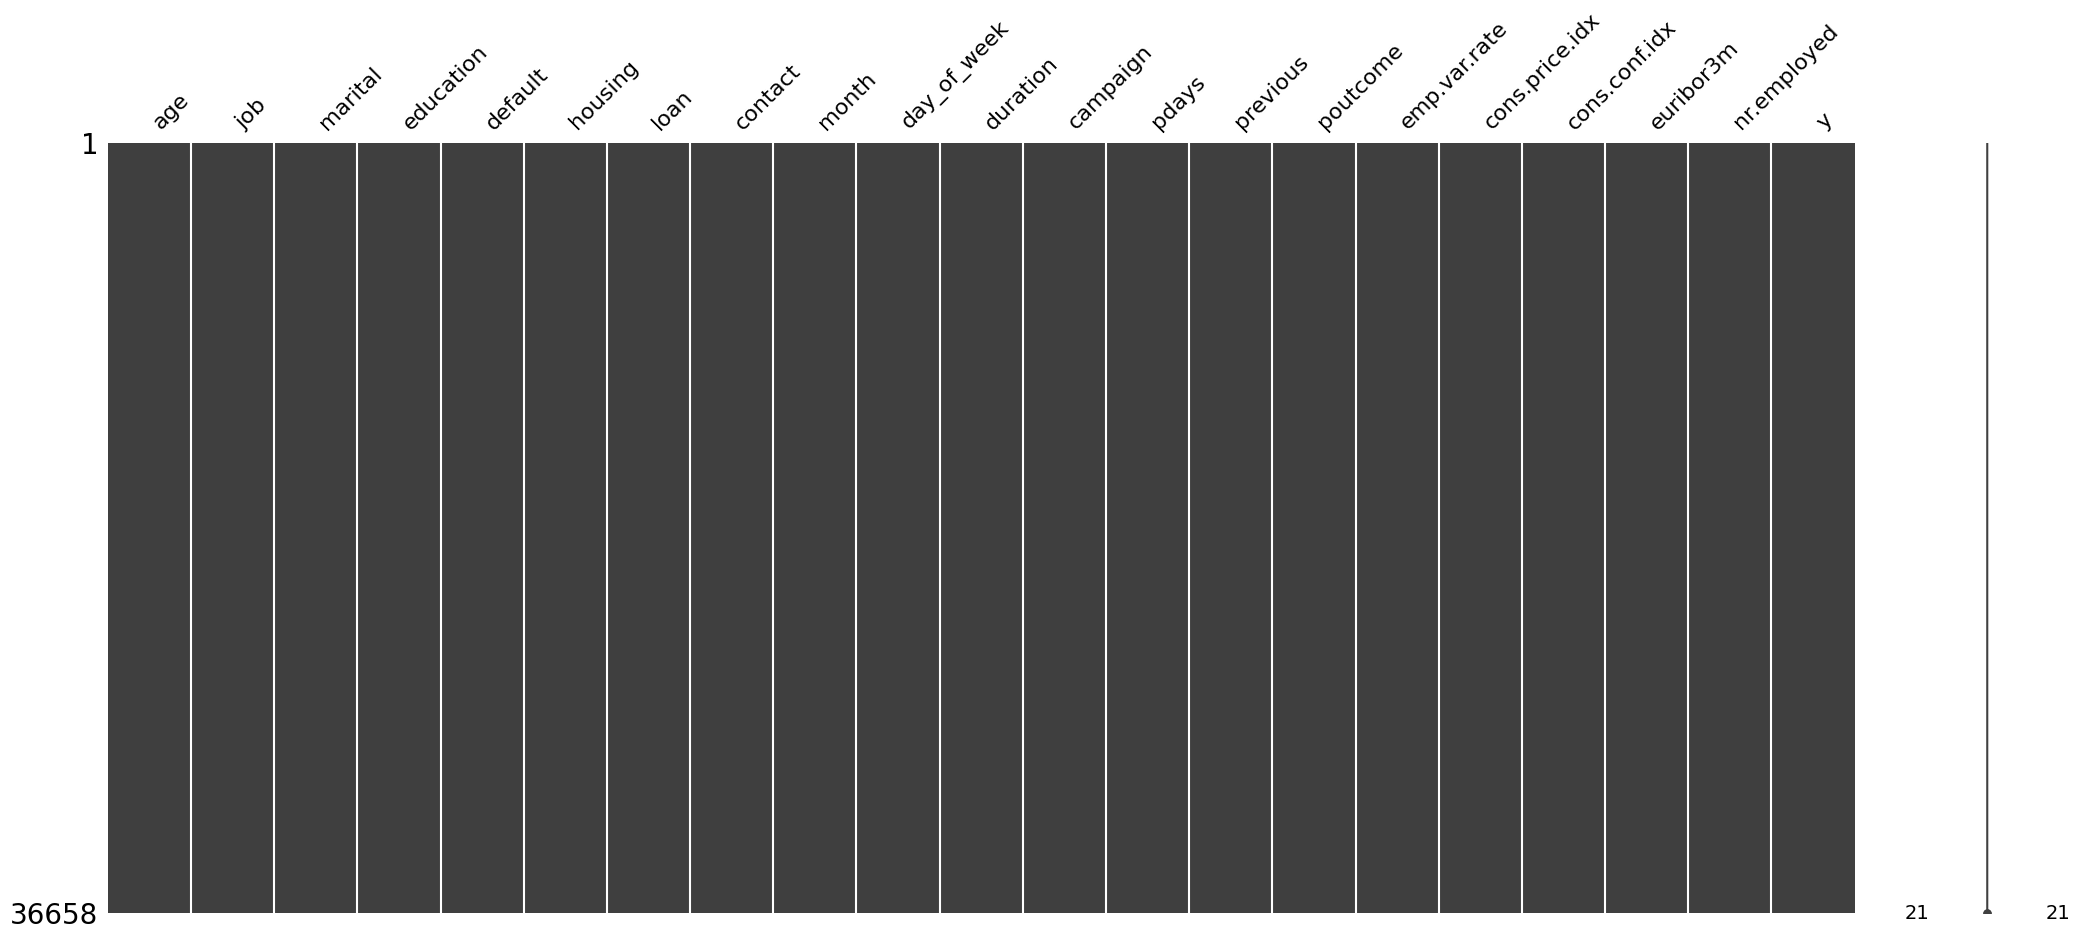

In [282]:
import missingno
missingno.matrix(df)

Dari pengecekan diatas, didapati bahwa tidak ada data NaN pada dataset yang dimiliki. Meski demikian, mengingat adanya kemungkinan penginputan lain pada data dengan kode tertentu yang dapat merepresentasikan missing value (seperti pada skimming data sebelumnya), maka harus dilakukan pengamatan terhadap data lebih lanjut.

### **Zero Values**

Pengecekan untuk setiap nilai bernilai 0 didalam dataset

In [13]:
zero_data = pd.DataFrame({
                          'feature': df.columns.values,
                          'data_type': df.dtypes.values,
                          'zero(n)': [len(df[col][df[col] == '0']) for col in df.columns],
                          'zero(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
                      }).round(3).sort_values(by='zero(%)', ascending=False).reset_index(drop=True)
zero_data.loc[zero_data['zero(%)'] > 0]

feature data_type  zero(n)  zero(%)
0  previous     int64        0   86.343
1     pdays     int64        0    0.036
2  duration     int64        0    0.010

dari hasil diatas, terdapat 3 variabel yang memiliki nilai 0 didalam dataset, previous(86.34%), pdays(0.036%) dan duration (0.01%). Namun jika dilihat lebih seksama, untuk seluruh variabel yang memiliki nilai 0 diatas adalah mungkin terjadi mengingat:
- previous = jumlah kontak yang dilakukan pada kampanye sebelumnya. Yang artinya nilai 0 adalah mungkin terjadi jika nasabah tersebut tidak pernah dikontak pada kampanye sebelumnya.
- pdays = jumlah hari berlalu sejak kontak terakhir pada kampanye sebelumnya dilakukan. Hal ini juga mungkin terjadi jika nasabah tersebut dihubungi kembali di hari yang sama.
- duration = durasi telpon, hal ini mungkin terjadi jika nasabah tersebut tidak menerima panggilan/ gagal memanggil.

### **Unknown Values**

Berdasarkan hasil skimming dataset, terlihat setidaknya ada 6 variabel (`job`, `marital`, `education`, `default`, `housing`, `loan`) yang memiliki nilai unknown values dan diindikasi sebagai data NaN. Namun, guna menghindari kesalahan pemahaman dataset, perlu dilakukan pengecekan nilai Unknown lebih lanjut. Untuk itu akan dilakukan pengcopy-an dataset, dan data unknown akan dirubah ke bentuk NaN untuk mendapatkan insight baru dari value unknown yang ada pada tiap variabel.

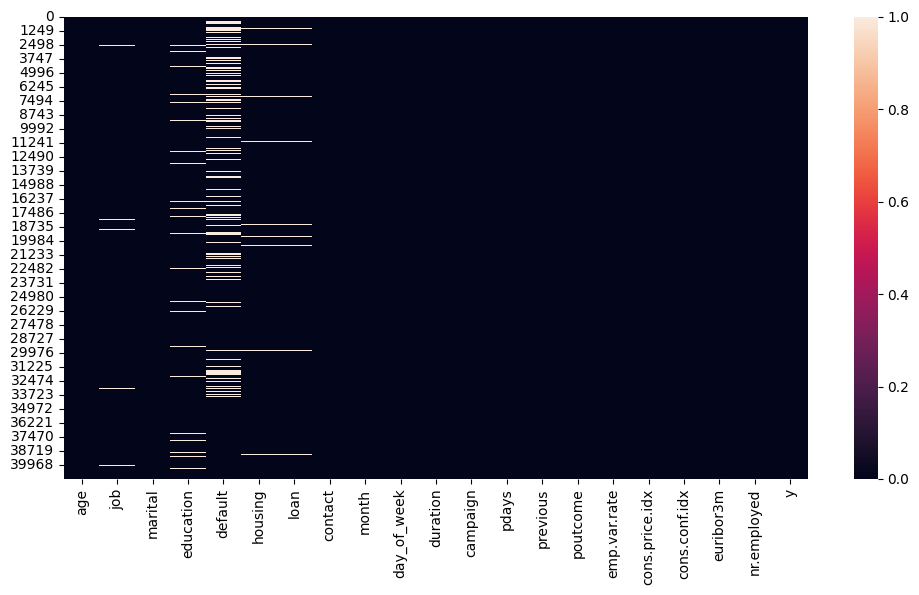

In [14]:
df_copy = df.copy()
df_copy[df_copy == 'unknown'] = np.nan
df_copy.isna().sum()
plt.figure(figsize = (12, 6))
sns.heatmap(data = df_copy.isna(), vmin = 0, vmax = 1)
plt.show()

In [15]:
unknown_data = pd.DataFrame({
                              'feature': df.columns.values,
                              'Unknown(n)': [len(df[col][df[col] == 'unknown']) for col in df.columns],
                              'Unknown(%)': [len(df[col][df[col] == 'unknown']) / len(df) * 100 for col in df.columns]
                          }).round(3).sort_values(by='Unknown(%)', ascending=False).reset_index(drop=True)
unknown_data.loc[unknown_data['Unknown(%)'] > 0]

feature  Unknown(n)  Unknown(%)
0    default        8597      20.873
1  education        1731       4.203
2    housing         990       2.404
3       loan         990       2.404
4        job         330       0.801
5    marital          80       0.194

- Dari grafik dan tabel diatas didapatkan beberapa informasi bahwa terdapat 6 variabel/fitur yang memiliki nilai unknown.
- Nilai unknown tertinggi terdapat pada `default` dengan 20.87% data, diikuti oleh `education` 4.2% `housing` dan `loan` 2.404%, `job` 0.801% dan `marital` 0.19%.
- Pada grafik, dapat dilihat bahwa unknown value pada `housing` dan `loan` berada di baris yang sama
- Pada grafik tidak terlihat adanya NaN pada variabel `marital`, hal ini dapat terjadi karena skala grafik yang kecil dan persentase unknown pada `marital` sangat kecil sehingga dapat tidak terlihat.

Namun, mengingat dalam skala perbankan data-data tersebut tidak mungkin tidak diketahui ataupun dibiarkan kosong oleh pihak perbankan (seperti default, loan, dan housing dapat dicek dengan sistem seperti BI Checking , dan data nasabah tidak mungkin dibiarkan kosong oleh staff counter), data ini akan tetapkan sebagai NaN.

In [16]:
import pandas as pd

# Create the initial DataFrame for tracking 'unknown' counts and percentages
unknown_data = pd.DataFrame({
    'feature': df.columns.values,
    'Unknown(n)': [df[col].eq('unknown').sum() for col in df.columns],
    'Unknown(%)': [df[col].eq('unknown').mean() * 100 for col in df.columns]
}).round(3).sort_values(by='Unknown(%)', ascending=False).reset_index(drop=True)

# Calculate the percentage of y=1 for each category with unknown values
unknown_data['Y_yes_unknown'] = unknown_data.apply(
                                                            lambda row: (df[(df[row['feature']] == 'unknown') & (df['y'] == 'yes')].shape[0] / row['Unknown(n)'] * 100)
                                                            if row['Unknown(n)'] > 0 else 0, axis=1
                                                             )

# Filter and show only columns with non-zero unknown percentage
filtered_unknown_data = unknown_data[unknown_data['Unknown(%)'] > 0]
filtered_unknown_data

feature  Unknown(n)  Unknown(%)  Y_yes_unknown
0    default        8597      20.873       5.152960
1  education        1731       4.203      14.500289
2    housing         990       2.404      10.808081
3       loan         990       2.404      10.808081
4        job         330       0.801      11.212121
5    marital          80       0.194      15.000000

### **PDays - 999**

Berdasarkan domain knowladge, nilai 999 pada `pdays` berarti nasabah tersebut belum pernah dihubungi dalam kampanye sebelumnya. Maka akan dilihat apakah ada kekeliruan dalam input `pdays` atau tidak.<br><br>

Fungsi dibawah ini adalah fungsi yang dapat mengecek nilai apa saja yang mengisi sebuah variabel beserta jumlah (count) datanya terhadap suatu variabel yang dicari.

In [19]:
# Fungsi untuk mencari pekerjaan berdasarkan usia dan juga menemukan pekerjaan yang paling sering (mode)
def info_by_base(data, base_data, info_column):
    # Menghitung jumlah kemunculan setiap pekerjaan berdasarkan usia
    job_counts = data.groupby([base_data, info_column]).size().reset_index(name='value_counts')

    # Mengelompokkan berdasarkan usia dan membuat daftar pekerjaan terkait
    base_with_counts = job_counts.groupby(base_data).agg(
        info_list=(info_column, lambda x: ', '.join(x.astype(str).unique())),
        total_counts=('value_counts', 'sum'),
        value_counts_per_job=('value_counts', lambda x: ', '.join(x.astype(str))),
    ).reset_index()

    # Menambahkan kolom modus pekerjaan untuk setiap usia
    mode_by_base = data.groupby(base_data)[info_column].agg(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()
    mode_by_base.columns = [base_data, 'mode']

    # Menggabungkan DataFrame age_jobs_with_counts dengan mode_job_by_age
    base_with_counts = base_with_counts.merge(mode_by_base, on=base_data, how='left')

    return base_with_counts

pd.set_option("display.max_colwidth", None)

variabel `pdays` sangat berkaitan erat dengan `previous`. Dimana jika nasabah tersebut belum pernah dikontak pada kampanye sebelumya, maka nilai `previous` (jumlah kontak yang dilakukan pada kampanye sebelumnya) adalah = 0. Maka, pengecekan nilai pdays akan memakai acuan dari `previous`.

In [20]:
# Mendapatkan informasi pekerjaan berdasarkan usia beserta modus pekerjaan
pdays_previous = info_by_base(df, 'pdays', 'previous')
pdays_previous[pdays_previous['pdays'] == 999]

pdays            info_list  total_counts            value_counts_per_job  \
26    999  0, 1, 2, 3, 4, 5, 6         39673  35563, 3696, 349, 50, 12, 2, 1   

    mode  
26     0

Dari tabel diatas, terlihat bahwa nasabah dengan pdays == 999 memiliki nilai previous yang beragam. Hal ini mengindikasi adanya kemungkinan kesalahan dalam pencatatan data pdays. Maka, pdays dengan 999 akan dilakukan handling lebih lanjut saat cleaning data

### **POutcome**

Pada variabel `POutcome` terdapat nilai `nonexistent` yang dicurigai sebagai kekeliruan. Nilai `POutcome` juga berkaitan dengan `previous`. Jika nasabah tersebut belum pernah dihubungi sebelumnya, maka nilai `previous` akan bernilai 0.

In [22]:
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [23]:
len(df['poutcome'])

41188

In [24]:
pdays_previous = info_by_base(df, 'poutcome', 'previous')
pdays_previous[pdays_previous['poutcome'] == 'nonexistent']

poutcome info_list  total_counts value_counts_per_job  mode
1  nonexistent         0         35563                35563     0

dari tabel diatas, terlihat bahwa pada data dengan poutcome == nonexistent hanya memiliki previous == 0, yang berarti data ini sudah tepat secara logika dan bukanlah missing data, dimana data poutcome tidak tersedia karena pada kampanye sebelumnya nasabah tersebut memang tidak dihubungi.

## **Duplicate Data**

In [25]:
dupe = df.duplicated().sum()

if dupe == 0:
  print(f'Tidak ditemukan adanya set data duplikat')
else:
  print(f'Ditemukan set data duplikat sebanyak {dupe} data\n')

df_duplicate = pd.DataFrame({
    'No.':[1],
    'Jlh Data Duplikat':df.duplicated().sum(),
    '%Data Duplikat':df.duplicated().sum() / len(df) * 100,
})

df_duplicate.drop(columns='No.', inplace=True)

df_duplicate

Ditemukan set data duplikat sebanyak 12 data



Jlh Data Duplikat  %Data Duplikat
0                 12        0.029135

In [26]:
dupe_data = df[df.duplicated(keep='first')]

dupe_count = dupe_data.groupby(list(df.columns)).size().reset_index(name='Jumlah Duplikat')

dupe_count

age          job   marital            education  default housing loan  \
0    24     services    single          high.school       no     yes   no   
1    27   technician    single  professional.course       no      no   no   
2    32   technician    single  professional.course       no     yes   no   
3    35       admin.   married    university.degree       no     yes   no   
4    36      retired   married              unknown       no      no   no   
5    39       admin.   married    university.degree       no      no   no   
6    39  blue-collar   married             basic.6y       no      no   no   
7    41   technician   married  professional.course       no     yes   no   
8    45       admin.   married    university.degree       no      no   no   
9    47   technician  divorced          high.school       no     yes   no   
10   55     services   married          high.school  unknown      no   no   
11   71      retired    single    university.degree       no      no   no   

      contact month day_of_week  duration  campaign  pdays  previous  \
0    cellular   apr         tue       114         1    999         0   
1    cellular   jul         mon       331         2    999         0   
2    cellular   jul         thu       128         1    999         0   
3    cellular   may         fri       348         4    999         0   
4   telephone   jul         thu        88         1    999         0   
5    cellular   nov         tue       123         2    999         0   
6   telephone   may         thu       124         1    999         0   
7    cellular   aug         tue       127         1    999         0   
8    cellular   jul         thu       252         1    999         0   
9    cellular   jul         thu        43         3    999         0   
10   cellular   aug         mon        33         1    999         0   
11  telephone   oct         tue       120         1    999         0   

       poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0   nonexistent          -1.8          93.075          -47.1      1.423   
1   nonexistent           1.4          93.918          -42.7      4.962   
2   nonexistent           1.4          93.918          -42.7      4.968   
3   nonexistent          -1.8          92.893          -46.2      1.313   
4   nonexistent           1.4          93.918          -42.7      4.966   
5   nonexistent          -0.1          93.200          -42.0      4.153   
6   nonexistent           1.1          93.994          -36.4      4.855   
7   nonexistent           1.4          93.444          -36.1      4.966   
8   nonexistent          -2.9          92.469          -33.6      1.072   
9   nonexistent           1.4          93.918          -42.7      4.962   
10  nonexistent           1.4          93.444          -36.1      4.965   
11  nonexistent          -3.4          92.431          -26.9      0.742   

    nr.employed    y  Jumlah Duplikat  
0        5099.1   no                1  
1        5228.1   no                1  
2        5228.1   no                1  
3        5099.1   no                1  
4        5228.1   no                1  
5        5195.8   no                1  
6        5191.0   no                1  
7        5228.1   no                1  
8        5076.2  yes                1  
9        5228.1   no                1  
10       5228.1   no                1  
11       5017.5   no                1

Pada dataset ini terdapat 12 row data duplikat. Mengingat data duplikat tidak akan memberikan informasi tambahan dalam analisis, maka data duplikat ini akan dilakukan droping saat cleaning.

## **Variabel Numerik**

In [27]:
numerik = df.select_dtypes(include='number')
numerik

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  
0              -36.4      4.857       5191.0  
1              -36.4      4.857       5191.0  
2              -36.4      4.857       5191.0  
3              -36.4      4.857       5191.0  
4              -36.4      4.857       5191.0  
...              ...        ...          ...  
41183          -50.8      1.028       4963.6  
41184          -50.8      1.028       4963.6  
41185          -50.8      1.028       4963.6  
41186          -50.8      1.028       4963.6  
41187          -50.8      1.028       4963.6  

[41188 rows x 10 columns]

Mengingat adanya nilai 999 pada fitur `pdays` yang merujuk pada data kategorik yang berarti nasabah tersebut belum dihubungi sebelumnya,  data tersebut dapat membuat interpretasi dari pemahaman variabel numerik menjadi kurang relevant, maka pada tahap ini akan dilakukan drop sementara pada kolom pdays agar terhindar dari bias data, dan variabel pdays akan dilakukan pengecekan secara terpisah.

In [28]:
numerik_wpd = numerik[numerik['pdays'] != 999]

### **Deskriptive and Distributions**

In [29]:
numerik_wpd.describe().round(2)

age  duration  campaign    pdays  previous  emp.var.rate  \
count  1515.00   1515.00   1515.00  1515.00   1515.00       1515.00   
mean     41.85    321.49      1.82     6.01      1.66         -2.10   
std      15.30    254.68      1.24     3.82      0.93          0.83   
min      17.00      1.00      1.00     0.00      1.00         -3.40   
25%      30.00    165.00      1.00     3.00      1.00         -2.90   
50%      37.00    253.00      1.00     6.00      1.00         -1.80   
75%      52.00    392.00      2.00     7.00      2.00         -1.70   
max      98.00   3509.00     13.00    27.00      7.00         -0.10   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
count         1515.00        1515.00    1515.00      1515.00  
mean            93.34         -38.34       0.99      5029.24  
std              0.78           6.63       0.53        52.31  
min             92.20         -50.80       0.63      4963.60  
25%             92.65         -42.00       0.72      4991.60  
50%             93.20         -38.30       0.88      5017.50  
75%             94.06         -31.40       1.04      5076.20  
max             94.77         -26.90       4.29      5195.80

In [ ]:
pdays_data = numerik[['pdays']]
pdays_data=pdays_data[pdays_data['pdays'] != 999]
pdays_data.describe().round(2)

pdays
count  1515.00
mean      6.01
std       3.82
min       0.00
25%       3.00
50%       6.00
75%       7.00
max      27.00

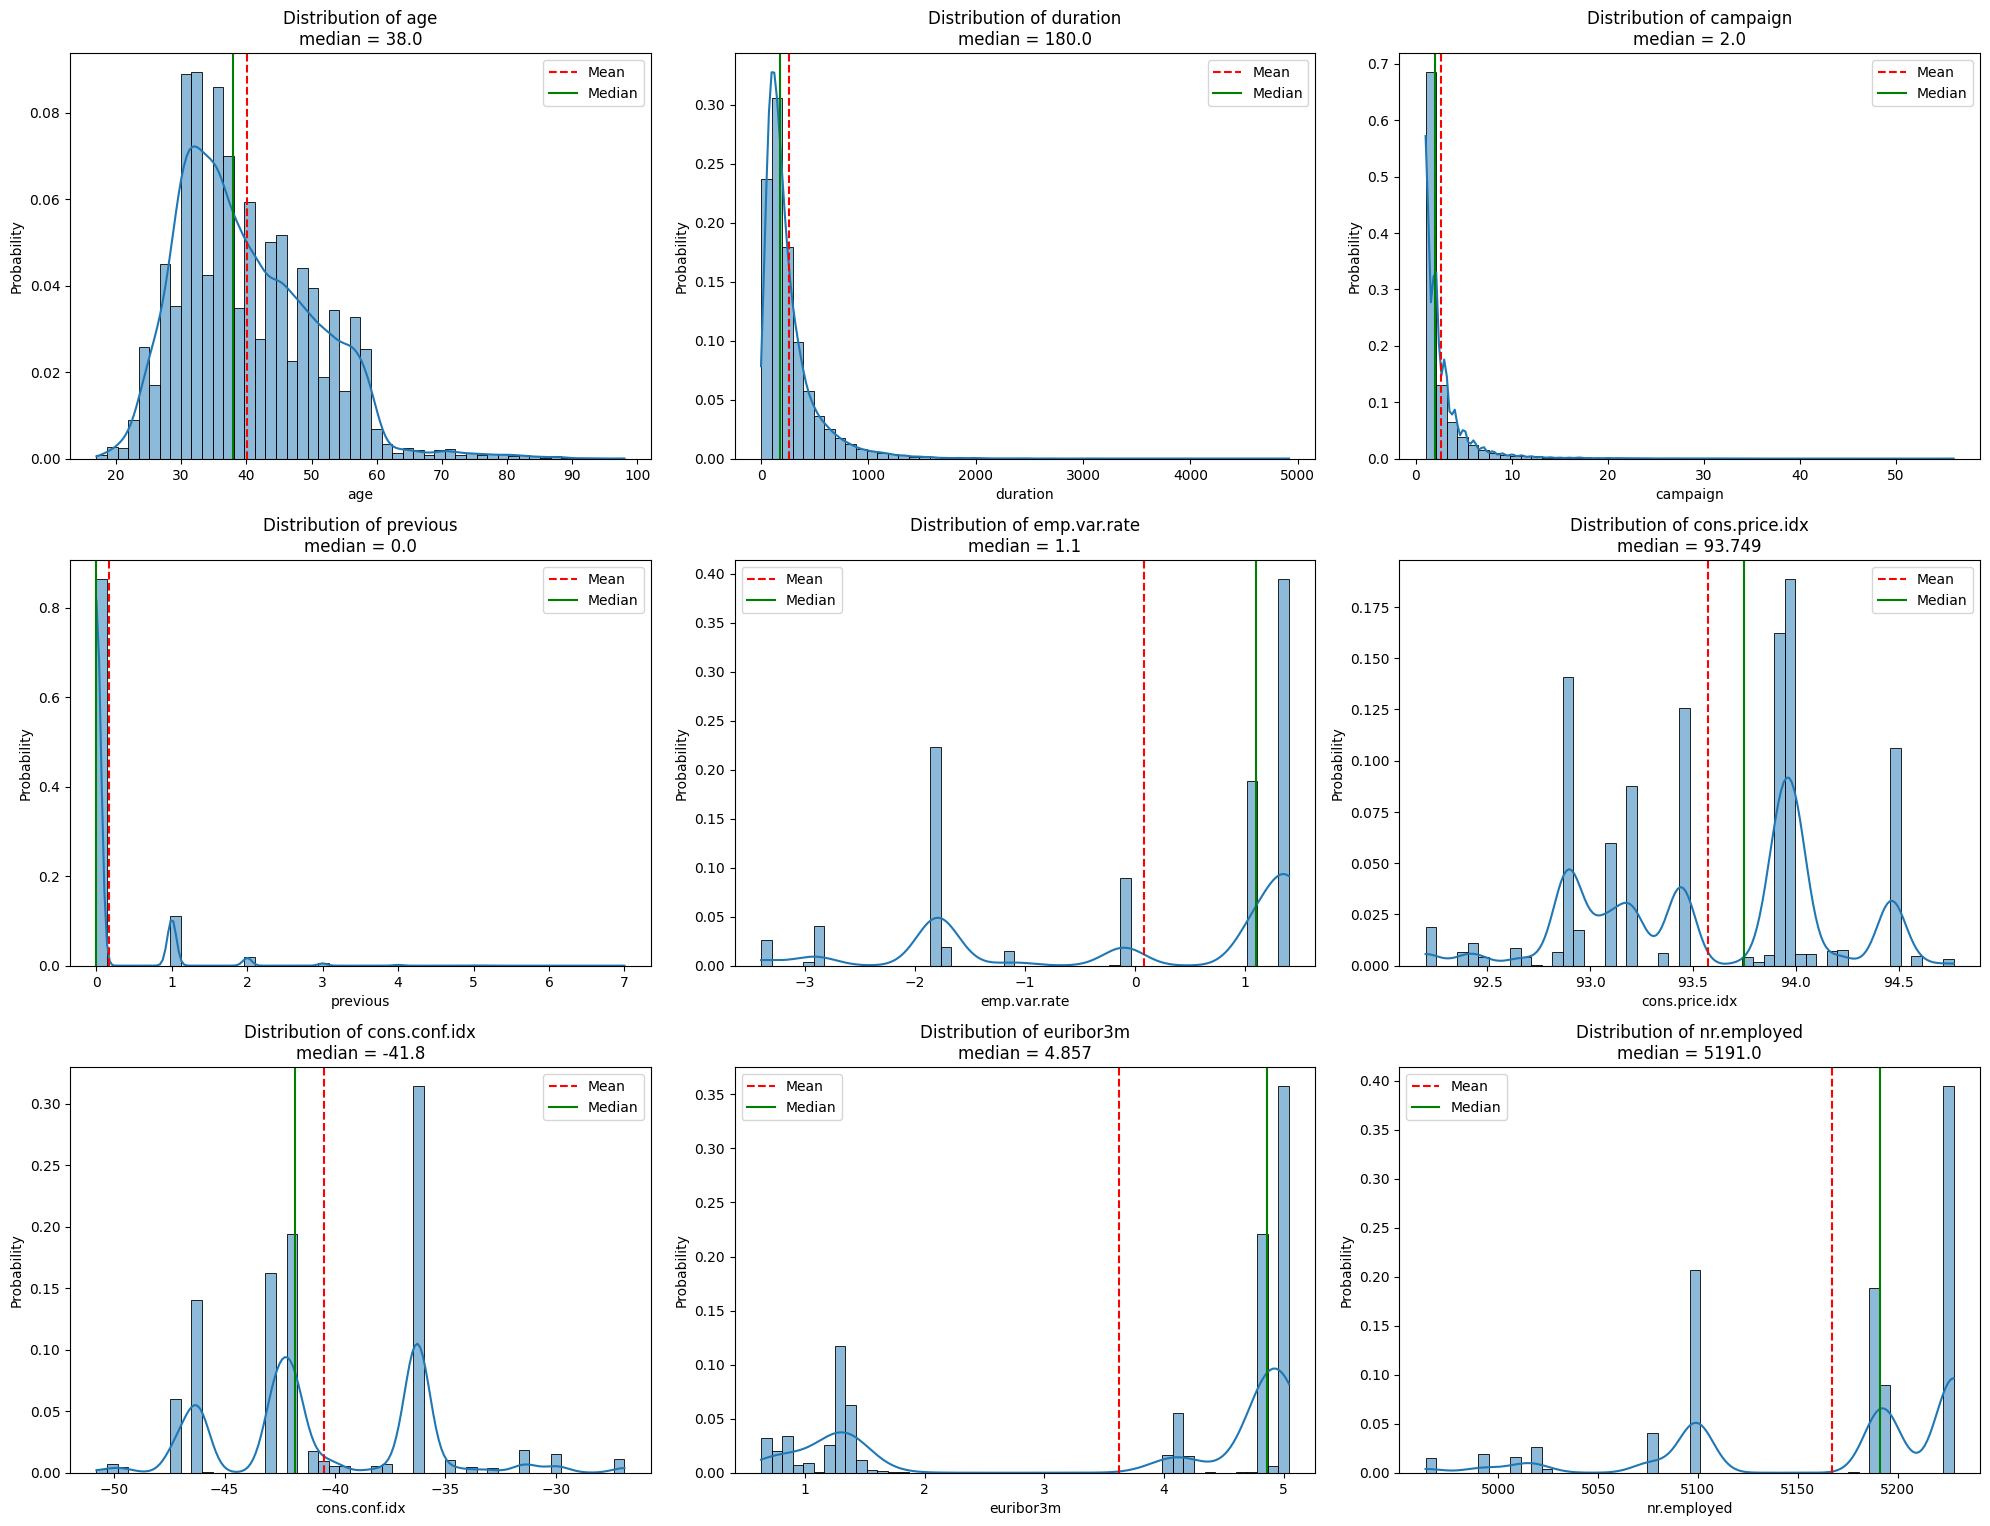

In [ ]:
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

for i, col in enumerate(numerik_wpd.columns):
    ax1 = axes[i // cols, i % cols]

    pvalue = normaltest(numerik[col])[1]
    if pvalue > 0.05:
        teks = (f'pvalue = {pvalue:.4f}, Data terdistribusi normal')
    else:
        teks = (f'pvalue = {pvalue:.4f}, Data tidak terdistribusi normal')

    ax1.set_title(f"Distribution of {col}\nmedian = {numerik[col].median()}", color="black")

    sns.histplot(numerik_wpd[col], ax=ax1, stat="probability", kde=True, bins=50)
    ax1.axvline(numerik_wpd[col].mean(), color='r', linestyle='--', label='Mean')
    ax1.axvline(numerik_wpd[col].median(), color='g', linestyle='-', label='Median')
    ax1.legend()

for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout()
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

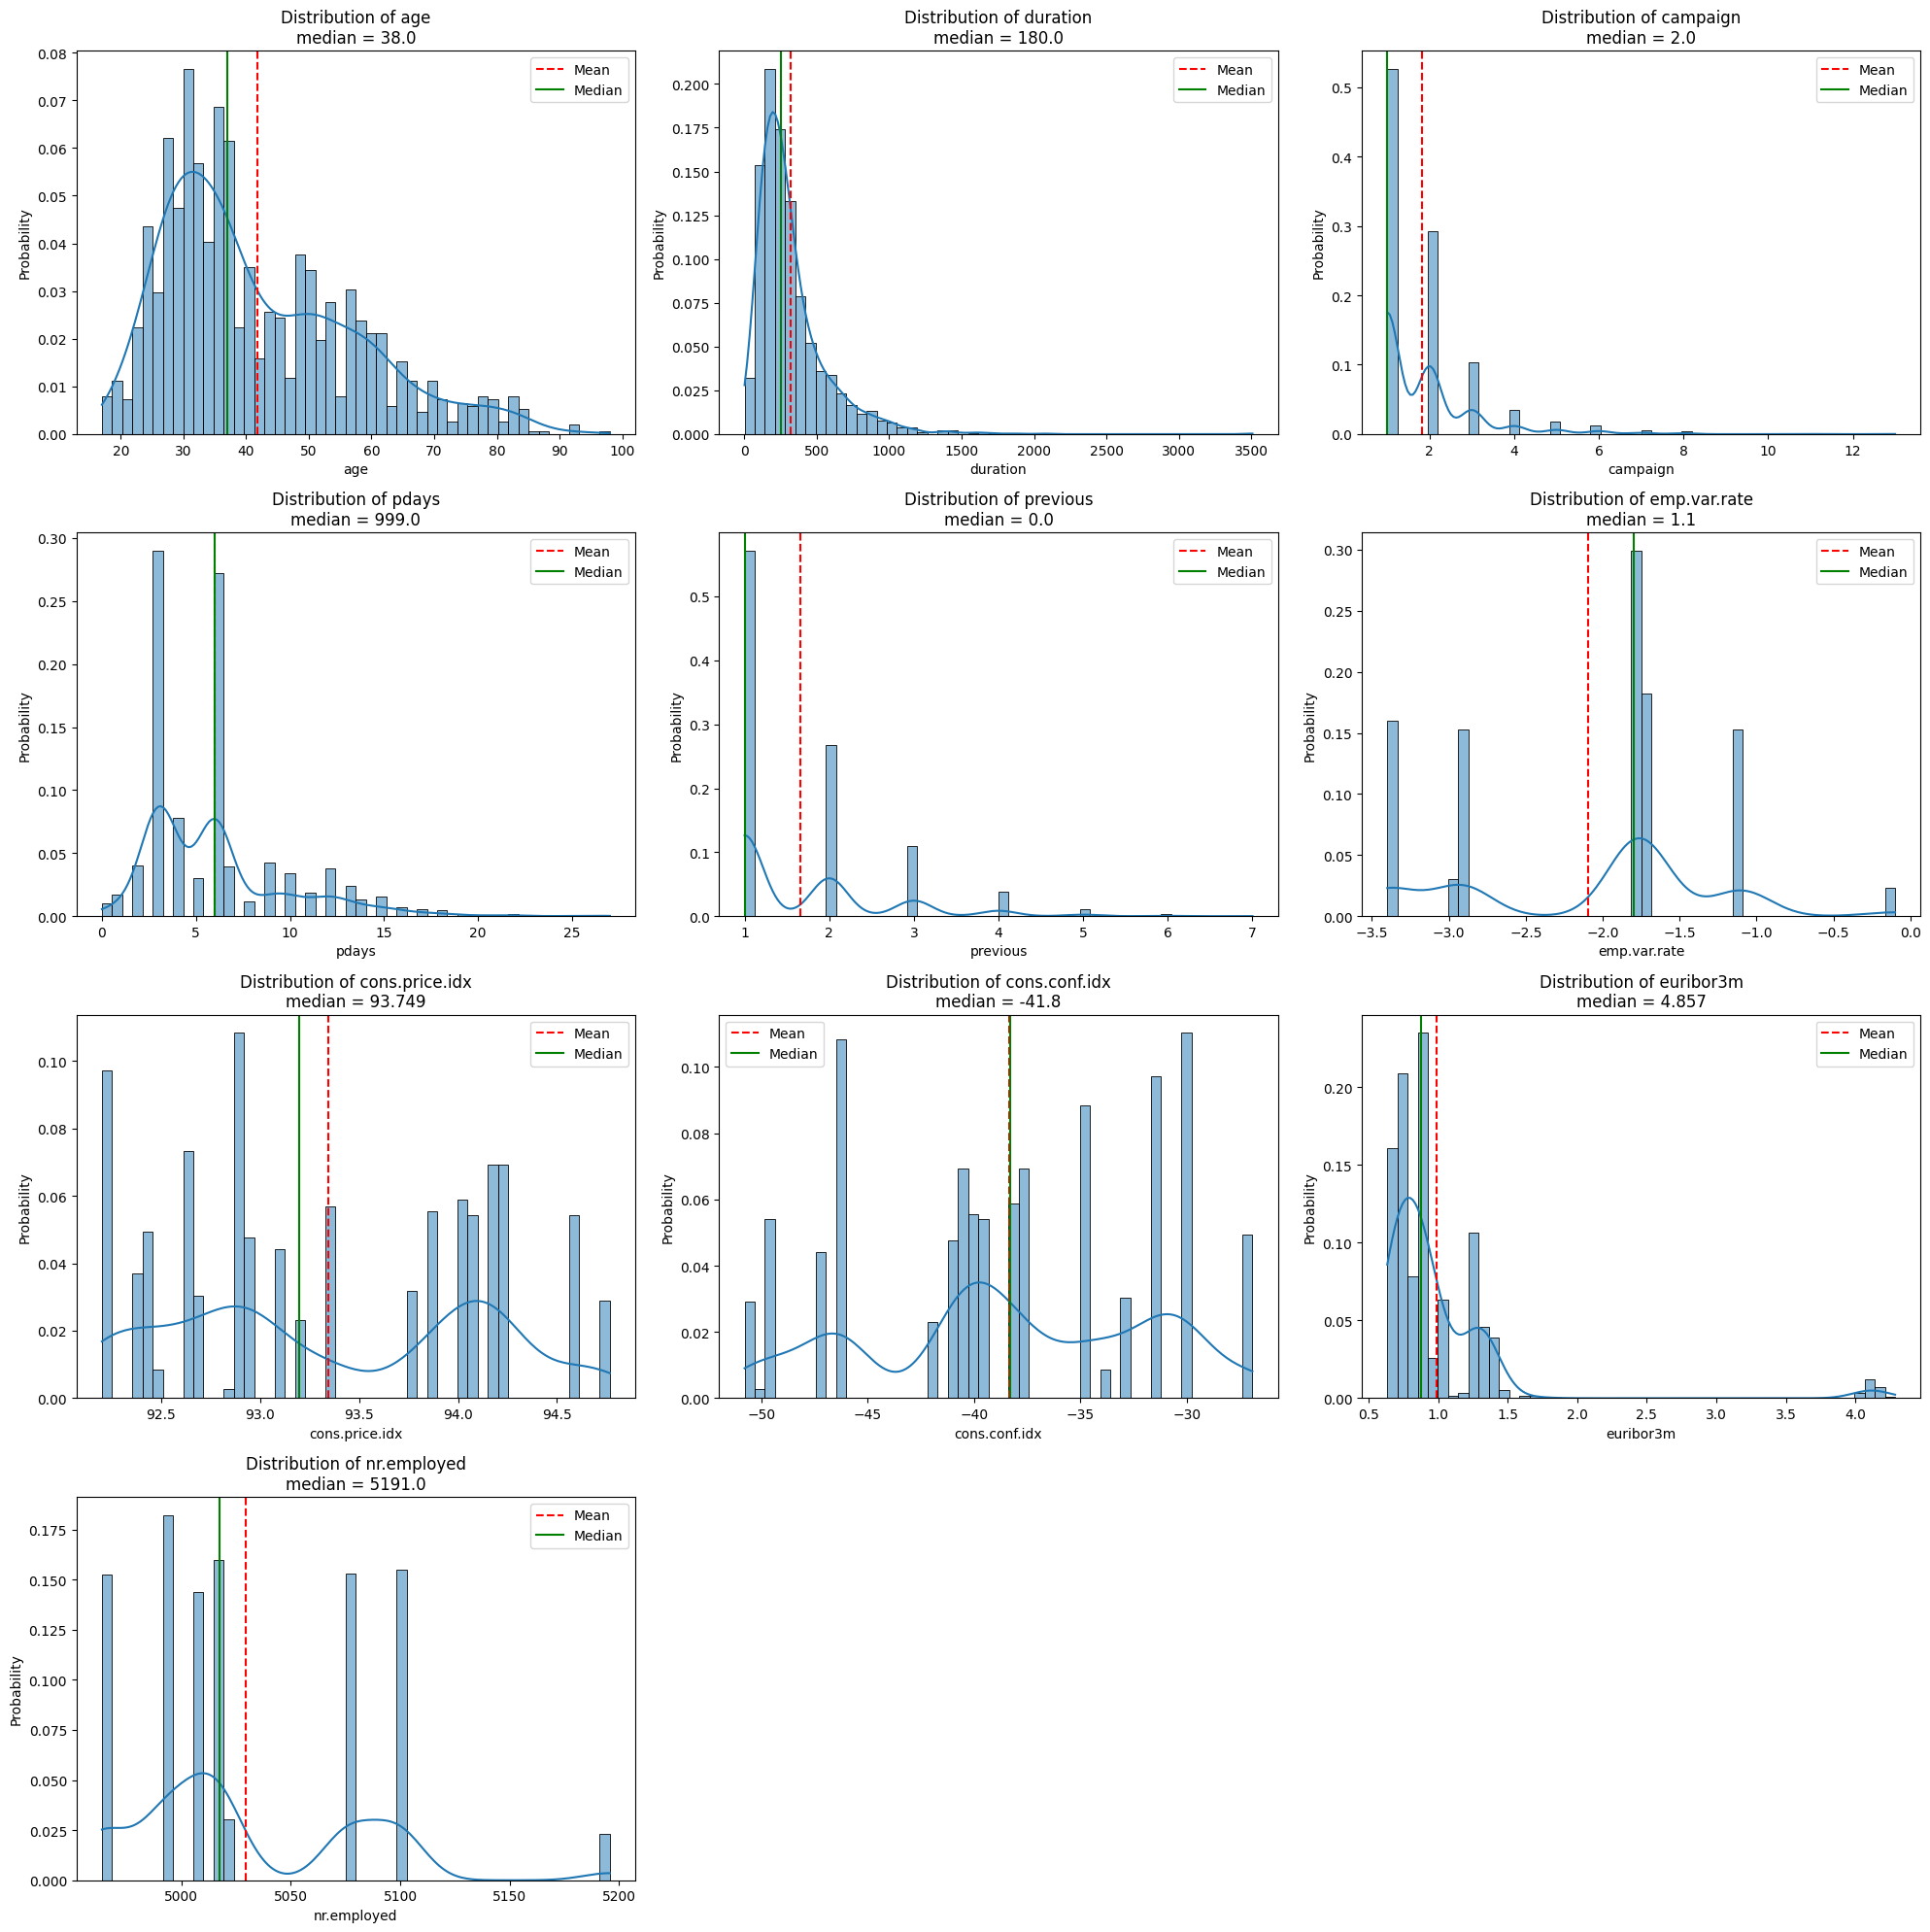

In [ ]:
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

for i, col in enumerate(numerik_wpd.columns):
    ax1 = axes[i // cols, i % cols]

    pvalue = normaltest(numerik[col])[1]
    if pvalue > 0.05:
        teks = (f'pvalue = {pvalue:.4f}, Data terdistribusi normal')
    else:
        teks = (f'pvalue = {pvalue:.4f}, Data tidak terdistribusi normal')

    ax1.set_title(f"Distribution of {col}\nmedian = {numerik[col].median()}", color="black")

    sns.histplot(numerik_wpd[col], ax=ax1, stat="probability", kde=True, bins=50)
    ax1.axvline(numerik_wpd[col].mean(), color='r', linestyle='--', label='Mean')
    ax1.axvline(numerik_wpd[col].median(), color='g', linestyle='-', label='Median')
    ax1.legend()

for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout()
plt.show()

Berikut adalah kesimpulan yang diperoleh dari tabel deskriptif dan grafik diatas:

- **Usia nasabah (Age)**  
Usia rata-rata nasabah adalah 40 tahun, dengan standar deviasi 10,42, menunjukkan bahwa mayoritas nasabah berada dalam kelompok usia produktif. Usia termuda adalah 17 tahun, sedangkan usia tertua mencapai 98 tahun, memperlihatkan bahwa kampanye bank menjangkau rentang usia yang luas. Nilai median sebesar 38 tahun mengindikasikan separuh dari nasabah berada di bawah usia ini, yang menegaskan fokus utama kampanye pada kelompok usia kerja.

- **Durasi kontak (Duration)**  
Rata-rata durasi kontak adalah sekitar 258 detik, dengan standar deviasi yang hampir sama, menunjukkan variasi durasi percakapan yang signifikan. Durasi terpendek adalah 0 detik, yang menandakan beberapa kontak mungkin tidak berhasil. Sementara itu, durasi maksimum mencapai hampir 82 menit, menunjukkan bahwa beberapa percakapan berlangsung cukup lama, yang bisa jadi merupakan indikasi minat yang tinggi dari nasabah tersebut. Namun, banyaknya kontak yang berakhir dalam waktu singkat (kuartil pertama hanya 102 detik) menunjukkan efisiensi atau tantangan dalam menarik perhatian nasabah.

- **Jumlah kontak per kampanye (Campaign)**  
Nasabah rata-rata dihubungi sekitar 2,57 kali dalam kampanye ini, dengan rentang mulai dari sekali hingga sebanyak 56 kali. Sebagian besar nasabah dihubungi antara 1 hingga 3 kali, seperti terlihat dari kuartil ketiga. Meskipun sebagian kecil nasabah dihubungi sangat sering, hal ini dapat mengindikasikan pendekatan yang terlalu agresif terhadap segmen tertentu, yang berisiko menurunkan efektivitas kampanye.

- **Jumlah kontak sebelumnya (Previous)**  
Sebagian besar nasabah belum pernah dihubungi dalam kampanye sebelumnya, dengan rata-rata jumlah kontak sebelumnya hanya 0,17 kali. Nilai median dan kuartil pertama hingga ketiga semuanya bernilai 0, menunjukkan bahwa kampanye ini terutama menargetkan nasabah baru.

- **Tingkat variasi ketenagakerjaan (Emp.var.rate)**  
Rata-rata tingkat variasi ketenagakerjaan adalah 0,08 dengan standar deviasi 1,57, menunjukkan volatilitas yang signifikan. Nilai minimum -3,40 menunjukkan periode penurunan signifikan dalam ketenagakerjaan, sedangkan nilai maksimum 1,40 mencerminkan pertumbuhan. Volatilitas ini dapat memengaruhi daya beli nasabah serta respons mereka terhadap produk finansial seperti deposito.

- **Indeks harga konsumen (Cons.price.idx)**  
Indeks harga konsumen rata-rata berada pada 93,58 dengan variasi yang relatif kecil (standar deviasi 0,58). Nilai ini menunjukkan bahwa inflasi relatif stabil selama periode kampanye, yang memberikan keuntungan bagi nasabah dalam mempertimbangkan keputusan finansial jangka panjang.

- **Indeks kepercayaan konsumen (Cons.conf.idx)**  
Indeks kepercayaan konsumen memiliki rata-rata -40,50 dengan nilai minimum -50,80 dan maksimum -26,90. Hal ini menunjukkan pesimisme konsumen terhadap kondisi ekonomi. Pesimisme ini dapat berdampak negatif pada tingkat respons terhadap produk pemasaran, terutama jika produk tersebut memerlukan komitmen finansial jangka panjang.

- **Suku bunga Euribor 3 bulan (Euribor3m)**  
Rata-rata suku bunga Euribor selama periode ini adalah 3,62 dengan variasi yang cukup besar, mulai dari 0,63 hingga 5,04. Suku bunga yang tinggi dapat menjadi hambatan dalam menarik nasabah untuk menyimpan uang mereka dalam deposito berjangka, karena biaya pinjaman dan pengembalian investasi lain mungkin lebih kompetitif.

- **Jumlah karyawan (Nr.employed)**  
Jumlah karyawan rata-rata adalah 5167,04, dengan variasi yang kecil. Nilai ini stabil di kisaran 4963 hingga 5228, mencerminkan pasar tenaga kerja yang konsisten. Stabilitas ini memberikan sinyal positif terhadap daya beli nasabah, meskipun fluktuasi kecil tetap ada.

- **pdays**
 rata-rata jumlah hari sejak kontak terakhir adalah 6,01 hari, dengan standar deviasi 3,82. Hal ini menunjukkan bahwa rata-rata kontak dilakukan dalam interval waktu yang relatif dekat dari kontak sebelumnya. Interval kontak yang sangat singkat ini, terutama di bawah seminggu, dapat berisiko menimbulkan kelelahan atau kejenuhan pada nasabah, terutama jika pesan kampanye tidak relevan atau berulang.
 Kontak terdekat terjadi pada hari yang sama (0 hari), sedangkan kontak terjauh dilakukan 27 hari sebelumnya. Adanya kontak pada hari yang sama (0 hari) dapat mencerminkan pengelolaan kampanye yang terlalu agresif atau kebutuhan mendesak untuk merespons nasabah tertentu

- Terlihat pada grafik seluruh data numerik terdistribusi tidak normal. Diluar variabel okonomi makro yang cukup fluktuatif, data numerik lainya memiliki distribusi **right-skewed**.

### **Outliers**

#### **IQR**

In [ ]:
def calculate_outliers_iqr(data):
    q3 = data.quantile(0.75)
    q1 = data.quantile(0.25)
    iqr = q3 - q1
    whis = 1.5 * iqr
    upper_bound = round(q3 + whis,2)
    lower_bound = round(q1 - whis,2)
    outliers = len(data[(data > upper_bound) | (data < lower_bound)])
    percent_outliers = round((outliers / len(data)) * 100, 2)
    return outliers, percent_outliers, upper_bound, lower_bound

In [ ]:
list_outliers_iqr = []
list_persentase_outliersiqr = []
jlh_data = []
list_upper_bound = []
list_lower_bound = []
list_min = []
list_max = []

for setiap_kolom in numerik_wpd.columns:
    data = numerik_wpd[setiap_kolom]
    outliers_iqr, percent_outliers_iqr, upper_bound, lower_bound = calculate_outliers_iqr(data)
    list_outliers_iqr.append(outliers_iqr)
    list_persentase_outliersiqr.append(percent_outliers_iqr)
    list_upper_bound.append(upper_bound)
    list_lower_bound.append(lower_bound)
    list_min.append(data.min())
    list_max.append(data.max())
    jlh_data.append(len(data))

outliers_wpd = pd.DataFrame({
    'kolom': numerik_wpd.columns,
    'len': jlh_data,
    'outliers(n)': list_outliers_iqr,
    'outliers(%)': list_persentase_outliersiqr,
    'upper bound': list_upper_bound,
    'lower bound': list_lower_bound,
    'min': list_min,
    'max': list_max
    })
outliers_wpd.loc[zero_data['zero(%)'] > 0].sort_values(by='outliers(n)', ascending=False)

kolom    len  outliers(n)  outliers(%)  upper bound  lower bound   min  \
1  duration  41188         2963         7.19        644.5       -223.5   0.0   
2  campaign  41188         2406         5.84          6.0         -2.0   1.0   
0       age  41188          469         1.14         69.5          9.5  17.0   

      max  
1  4918.0  
2    56.0  
0    98.0

In [ ]:
data = pdays_data['pdays']
outliers_iqr, percent_outliers_iqr, upper_bound, lower_bound = calculate_outliers_iqr(data)
min_pdays= pdays_data['pdays'].min()
max_pdays=pdays_data['pdays'].max()
jlh_data = len(pdays_data['pdays'])

outliers_pdays = pd.DataFrame({
    'kolom': pdays_data.columns,
    'len': jlh_data,
    'outliers(n)': outliers_iqr,
    'outliers(%)': percent_outliers_iqr,
    'upper bound': upper_bound,
    'lower bound': lower_bound,
    'min': min_pdays,
    'max': max_pdays
    })
outliers_pdays.loc[zero_data['zero(%)'] > 0].sort_values(by='outliers(n)', ascending=False)

kolom   len  outliers(n)  outliers(%)  upper bound  lower bound  min  max
0  pdays  1515           82         5.41         13.0         -3.0    0   27

#### **Boxplot**

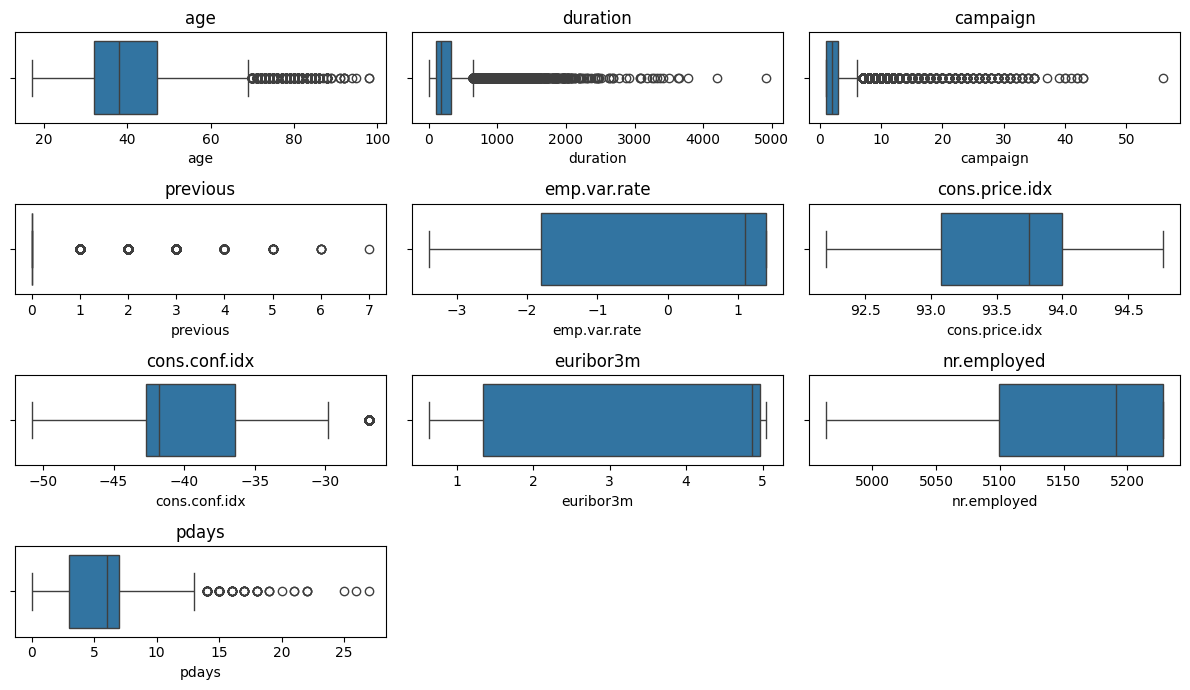

In [ ]:
posisi = 1
plt.figure(figsize = (12,7))

for tiap_kolom in numerik_wpd.columns:
  plt.subplot(4,3,posisi)
  sns.boxplot(numerik_wpd[tiap_kolom],orient = 'h')
  plt.title(tiap_kolom)
  posisi += 1
  plt.tight_layout()

plt.subplot(4,3,10)
sns.boxplot(pdays_data['pdays'],orient = 'h')
plt.title('pdays')
plt.tight_layout()

1. Durasi (Duration)
  - Sebanyak 7,19% dari total data (2963 dari 41.188) adalah outliers.
  - Data durasi pada rentang 644,5 detik atau di bawah -223,5 detik akan dianggap sebagai outliers(Namun hal ini tidak relevan karena durasi tidak mungkin negatif).
  - Durasi maksimum mencapai 4918 detik, jauh melampaui batas atas, yang menunjukkan adanya kontak yang sangat lama.

  Insight dari pengecekan outliers pada `duration`: Outliers ini kemungkinan besar mewakili percakapan yang sangat sukses (durasi lama) ataupun data yang tidak akurat. Kontak yang sangat lama dapat dieksplorasi lebih lanjut untuk memahami pola dan dampaknya terhadap konversi nasabah.

2. Kampanye (Campaign)
  -  Sebanyak 5,84% data (2406 dari 41.188) adalah outliers.
  - Data campaign yang ditemukan di atas 6 kali kontak atau di bawah -2 akan dianggap sebagai outliers (tidak relevan karena jumlah kontak tidak mungkin negatif).
  - Nasabah tertinggi dihubungi sebanyak 56 kali, yang menunjukkan pendekatan sangat intens.
  
  Insight: Jumlah kontak yang berlebihan (di atas 6 kali) berpotensi menyebabkan kelelahan pada nasabah dan menurunkan efektivitas kampanye. Analisis lebih lanjut diperlukan untuk memastikan apakah pendekatan ini meningkatkan konversi.

3. Usia (Age)
  - Hanya 1,14% data (469 dari 41.188) yang termasuk outliers.
  - Batas IQR: Outliers ditemukan di atas 69,5 tahun atau di bawah 9,5 tahun.
  - Nilai Ekstrem: Usia maksimum mencapai 98 tahun, sedangkan usia minimum adalah 17 tahun.

  Insight: Outliers ini mencerminkan kelompok usia di luar target utama, seperti lansia atau calon nasabah sangat muda. Segmentasi lebih spesifik diperlukan untuk memahami apakah kelompok ini layak diprioritaskan.

4. Jumlah Hari sejak Kontak Sebelumnya (Pdays)
  - Sebanyak 5,41% data (82 dari 1515) adalah outliers.
  - Batas IQR: Outliers ditemukan di atas 13 hari atau di bawah -3 hari (tidak relevan).
  - Nilai Ekstrem: Nilai maksimum adalah 27 hari, menunjukkan interval kontak yang lebih panjang untuk sebagian kecil nasabah.

  Insight: Nasabah yang mengalami interval lebih dari 13 hari dapat menjadi fokus evaluasi untuk memahami apakah interval waktu ini masih efektif dalam mempertahankan keterlibatan mereka.

### **Korelasi**

#### **Antar Fitur Numerik**

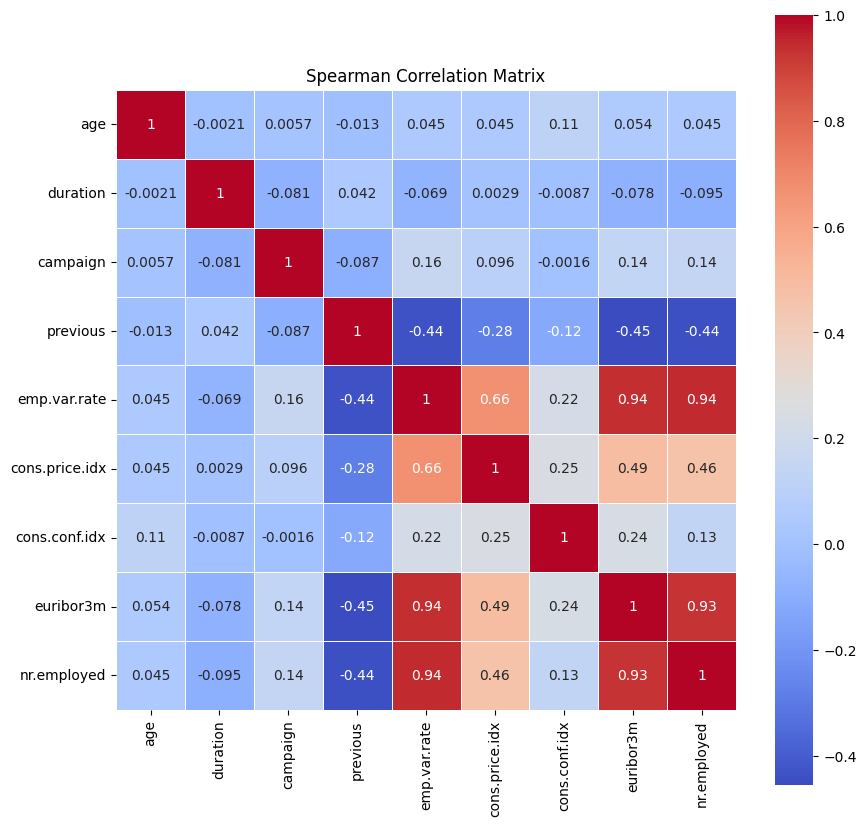

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(numerik_wpd.corr(method='spearman'), annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Spearman Correlation Matrix')
plt.show()

- **Hubungan Variabel Ekonomi dengan Tenaga Kerja:**
  <br>Terdapat korelasi yang sangat kuat antara employment variation rate (emp.var.rate), euribor 3-month rate (euribor3m), dan number of employees (nr.employed) dengan nilai korelasi mendekati 0,94. Ini menunjukkan bahwa faktor ekonomi makro terkait secara erat dan saling memengaruhi dalam menentukan kondisi tenaga kerja.<br>
- **Durasi (Duration)**:
  <br>Korelasi duration dengan variabel lain, seperti campaign (-0,081) atau previous (0,042), sangat kecil. Namun, durasi kontak lebih penting sebagai variabel independen dalam memengaruhi hasil (y) karena berperan langsung dalam interaksi dengan nasabah, meskipun tidak banyak terhubung dengan faktor lainnya.
- **Kampanye (Campaign) dan Riwayat Kontak (Previous):**
  <br>Korelasi negatif antara campaign dan previous (-0,087) menunjukkan bahwa semakin banyak kontak sebelumnya, semakin sedikit jumlah kontak yang dilakukan dalam kampanye saat ini. Hal ini bisa mengindikasikan efektivitas dari kontak sebelumnya.
- **Indeks Harga dan Kepercayaan Konsumen:**
  <br>Consumer price index (cons.price.idx) dan consumer confidence index (cons.conf.idx) memiliki korelasi yang sedang (0,25) tetapi keduanya menunjukkan pola korelasi positif terhadap variabel ekonomi makro seperti emp.var.rate dan nr.employed.
- **Usia (Age):**
  <br>Age memiliki korelasi yang sangat rendah dengan semua variabel lain (di bawah 0,05). Hal ini menunjukkan bahwa usia nasabah tidak memiliki hubungan langsung yang signifikan dengan durasi, kampanye, atau faktor ekonomi.

#### **Fitur dengan Target**

Pada tahap ini dilakukan pengecekan nilai korelasi  menggunakan **point biserial correlation** yang dapat mengukur hubungan antara fitur numerik dengan variabel target (kategorik/ biner)

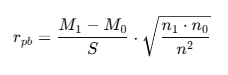

- M1 dan M0 : Rata-rata variabel numerik untuk kategori 1 dan 0.
- S: Standar deviasi dari variabel numerik.
- n1 dan n0​: Jumlah data untuk masing-masing kategori 1 dan 0.
- n: Total jumlah data.


Nilai rpb berkisar antara -1 hingga 1.
  - Nilai rpb positif  menunjukkan korelasi langsung (nilai numerik lebih tinggi pada kategori 1).
  - Nilai rpb Negatif menunjukkan korelasi terbalik (nilai numerik lebih tinggi pada kategori 0).

In [ ]:
from scipy.stats import pointbiserialr

if df['y'].dtype == 'object':
    df['y_num'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

results = []

for feature in numerik:
    if feature != 'y_num':
        correlation, p_value = pointbiserialr(df['y_num'], df[feature])
        results.append({
            'Feature': feature,
            'Point Biserial Correlation': correlation,
            'P-value': p_value,
            'Keterangan': 'Signifikan' if p_value < 0.05 else 'tidak signifikan'
        })

results_df = pd.DataFrame(results)
results_df

Feature  Point Biserial Correlation        P-value  Keterangan
0             age                    0.030399   6.802136e-10  Signifikan
1        duration                    0.405274   0.000000e+00  Signifikan
2        campaign                   -0.066357   2.007780e-41  Signifikan
3           pdays                   -0.324914   0.000000e+00  Signifikan
4        previous                    0.230181   0.000000e+00  Signifikan
5    emp.var.rate                   -0.298334   0.000000e+00  Signifikan
6  cons.price.idx                   -0.136211  9.318965e-170  Signifikan
7   cons.conf.idx                    0.054878   7.536665e-29  Signifikan
8       euribor3m                   -0.307771   0.000000e+00  Signifikan
9     nr.employed                   -0.354678   0.000000e+00  Signifikan

In [ ]:
df.drop(columns = 'y_num', inplace=True)

<ipython-input-36-b46eb6a0f91e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


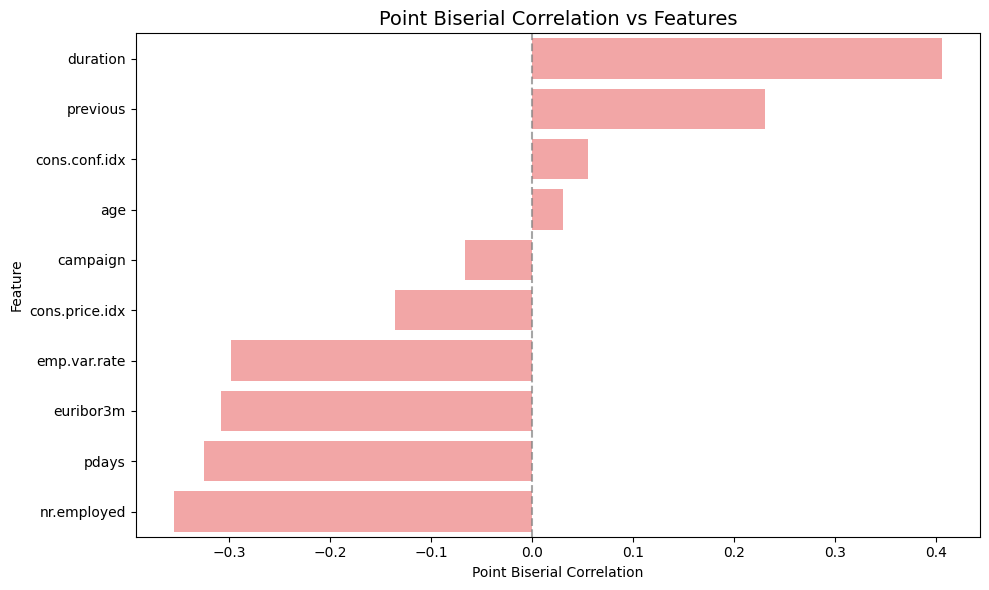

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df = results_df.sort_values(by='Point Biserial Correlation', ascending=False)
colors = ['#69b3a2' if k == 'Penting' else '#ff9999' for k in results_df['Keterangan']]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df,
    y='Feature',
    x='Point Biserial Correlation',
    palette=colors
)

plt.axvline(0, color='grey', linestyle='--', alpha=0.7)
plt.title('Point Biserial Correlation vs Features', fontsize=14)
plt.xlabel('Point Biserial Correlation')
plt.ylabel('Feature')
plt.tight_layout()

plt.show()

**Kesimpulan**

- **Signifikansi Statistik**:<br>
Semua fitur memiliki nilai P-value yang sangat rendah (di bawah tingkat signifikansi 0,05), yang menunjukkan bahwa korelasi setiap fitur dengan variabel target (y) signifikan secara statistik. Hal ini mengindikasikan bahwa setiap fitur memiliki hubungan yang relevan dengan hasil kampanye (apakah nasabah menyetujui deposit berjangka atau tidak).

- **Fitur dengan Korelasi Positif Terkuat**:<br>
  - Duration (0.405) memiliki korelasi positif paling kuat dengan variabel target, menegaskan pentingnya durasi percakapan sebagai penentu keberhasilan kampanye. Semakin lama durasi kontak, semakin besar kemungkinan nasabah untuk menyetujui deposit berjangka. Hal ini dapat digunakan untuk memprioritaskan strategi di mana percakapan yang lebih panjang diarahkan untuk membangun hubungan yang lebih baik dengan nasabah.
  - Previous (0.230) juga menunjukkan korelasi positif yang signifikan, yang berarti nasabah yang pernah dihubungi sebelumnya lebih cenderung untuk menyetujui deposit.
- **Fitur dengan Korelasi Negatif Terkuat**:<br>
  - Number of employees (nr.employed) (-0.355), euribor 3-month rate (euribor3m) (-0.308), dan pdays (-0.325) memiliki korelasi negatif kuat terhadap variabel target. Ini menunjukkan bahwa kondisi ekonomi makro dan jarak waktu sejak kontak sebelumnya dapat memengaruhi peluang keberhasilan kampanye.
  - Employment variation rate (emp.var.rate) (-0.298) juga memiliki hubungan negatif yang kuat, mengindikasikan bahwa kondisi pasar tenaga kerja yang lebih tidak stabil cenderung menurunkan keberhasilan kampanye.
- **Hubungan dengan Indeks Harga dan Kepercayaan Konsumen**:<br>
  Consumer confidence index (cons.conf.idx) memiliki korelasi positif kecil (0.054), sedangkan consumer price index (cons.price.idx) memiliki korelasi negatif moderat (-0.136). Ini menunjukkan bahwa kepercayaan konsumen memiliki dampak kecil tetapi positif pada keberhasilan kampanye, sementara inflasi atau kenaikan harga dapat sedikit mengurangi keberhasilan.
- **Usia (Age) dan Kampanye (Campaign)**:<br>
Age (0.030) dan Campaign (-0.066) menunjukkan korelasi yang sangat lemah dengan variabel target. Ini berarti usia dan jumlah kontak selama kampanye mungkin tidak terlalu berpengaruh secara langsung, meskipun mereka signifikan secara statistik.

### **Multikolinearitas**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [ ]:
calc_vif(numerik).sort_values(by = 'VIF', ascending = False)

variables           VIF
9     nr.employed  26746.634212
6  cons.price.idx  22561.123124
8       euribor3m    226.237349
7   cons.conf.idx    120.086975
3           pdays     44.413175
5    emp.var.rate     28.910219
0             age     16.047296
1        duration      2.011044
4        previous      2.001464
2        campaign      1.921499

**Kesimpulan**:
- Multikolinearitas yang ekstrem, terutama pada variabel seperti nr.employed, cons.price.idx, euribor3m, dan cons.conf.idx, menunjukkan bahwa variabel-variabel ini hampir sepenuhnya dikorelasikan dengan variabel lain dalam dataset. hal ini dapat menyebabkan masalah dalam model prediktif. Koefisien regresi bisa menjadi tidak stabil, sulit diinterpretasikan, atau bahkan tidak signifikan secara statistik meskipun variabel tersebut memiliki hubungan nyata dengan target.
- Variabel nr.employed, cons.price.idx, euribor3m, dan emp.var.rate menunjukkan overlap informasi yang kuat. Ini mengindikasikan bahwa variabel-variabel ini mungkin mencerminkan kondisi ekonomi makro yang sama, sehingga tidak semuanya perlu dimasukkan dalam model secara bersamaan
- Variabel seperti age (16,05), duration (2,01), previous (2,00), dan campaign (1,92) memiliki nilai VIF yang rendah hingga moderat, menunjukkan hubungan yang lebih independen dengan variabel lainnya.

## **Variabel Kategorik**

In [ ]:
kategorik = df.select_dtypes(include='object')

### **Deskriptif**

In [ ]:
kategorik.describe()

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

**Kesimpulan**
- **Distribusi Pekerjaan (Job)**:<br>
Terdapat 12 kategori pekerjaan, dengan kategori admin. sebagai pekerjaan paling umum (10.422 data, sekitar 25,3% dari total data).
Distribusi pekerjaan cukup bervariasi, mencerminkan keberagaman klien yang menjadi target dalam kampanye bank.
- **Status Pernikahan (Marital):**<br>
Mayoritas klien berada pada status married (24.928 data, sekitar 60,5% dari total data).
Status lainnya seperti single dan divorced jauh lebih rendah frekuensinya, menunjukkan bahwa kampanye mungkin lebih efektif menargetkan nasabah yang sudah menikah.
- **Tingkat Pendidikan (Education):**<br>
Terdapat 8 tingkat pendidikan, dengan university.degree sebagai tingkat pendidikan paling dominan (12.168 data, sekitar 29,5%).
Ini menunjukkan bahwa sebagian besar klien memiliki latar belakang pendidikan yang lebih tinggi.
- **Status Kredit Default (Default):** <br>Mayoritas klien tidak memiliki kredit macet (no, 32.588 data atau 79,1%). Klien dengan status default yes sangat sedikit, menunjukkan basis data didominasi oleh klien dengan histori kredit yang baik.
- **Kepemilikan Pinjaman Perumahan (Housing):**<br>
Sebagian besar klien memiliki pinjaman perumahan (yes, 21.576 data atau 52,4%).
Ini mungkin relevan dalam menilai profil risiko atau kebutuhan klien untuk produk perbankan lainnya.
- **Kepemilikan Pinjaman Pribadi (Loan):**<br> Sebagian besar klien tidak memiliki pinjaman pribadi (no, 33.950 data atau 82,4%). Hal ini menunjukkan potensi ruang untuk menawarkan produk pinjaman pribadi kepada klien tertentu.
- **Jenis Kontak (Contact):** <br>Sebagian besar kontak dilakukan melalui cellular (26.144 data, sekitar 63,5%), dibandingkan dengan telephone. Pemilihan metode komunikasi ini kemungkinan berdasarkan preferensi klien atau efektivitas kampanye.
- **Bulan Kontak Terakhir (Month):**<br>
Bulan May adalah periode dengan kontak terbanyak (13.769 data, sekitar 33,4%).
Distribusi ini menunjukkan bahwa kampanye paling intens dilakukan pada bulan tersebut.
- **Hari Kontak Terakhir (Day of Week):**<br>
Hari Thursday (Kamis) adalah hari dengan jumlah kontak terbanyak (8.623 data, sekitar 20,9%). Kampanye mungkin paling aktif dilakukan pada hari kerja tertentu, yang perlu dipertimbangkan dalam perencanaan ke depan.
- **Hasil Kampanye Sebelumnya (Poutcome):**<br>
Sebagian besar klien tidak memiliki hasil kampanye sebelumnya atau berada dalam kategori nonexistent (35.563 data, sekitar 86,3%). Hal ini menunjukkan bahwa mayoritas target kampanye belum pernah terlibat dalam kampanye sebelumnya.
- **Respon Target (Y):**<br>
Sebagian besar klien tidak menyetujui deposito berjangka (no, 36.548 data, sekitar 88,7%). Tingkat keberhasilan kampanye masih relatif rendah, menunjukkan perlunya strategi yang lebih efektif.

### **Value Counts**

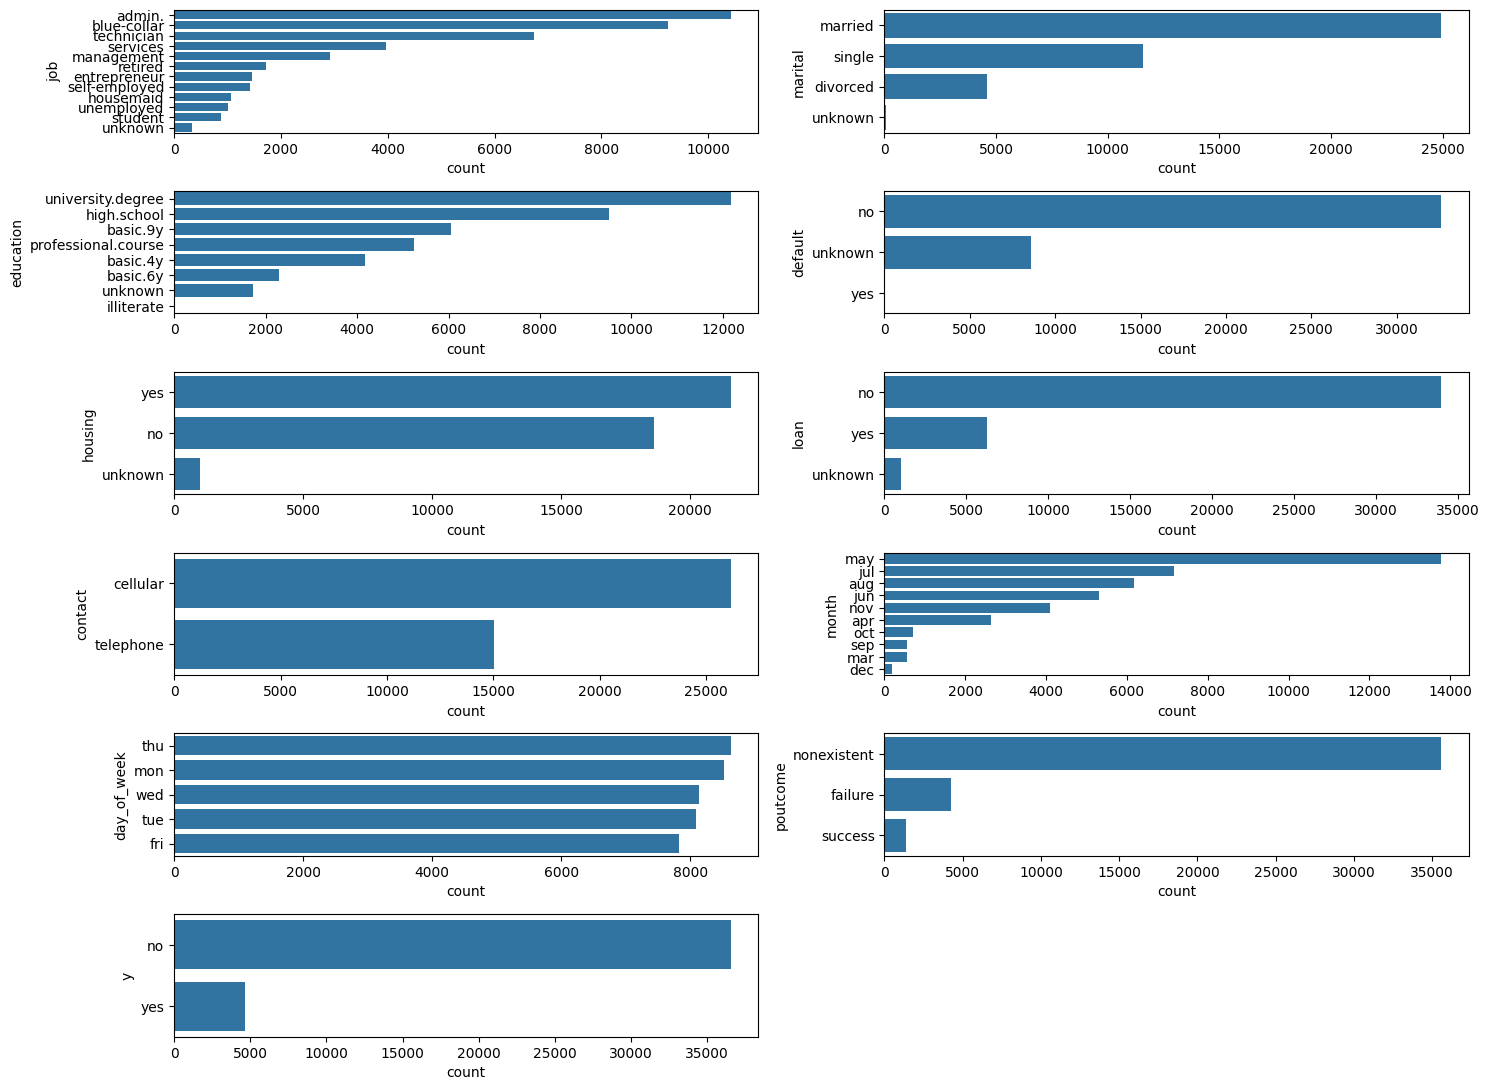

In [ ]:
plt.figure(figsize = (15,11))
posisi = 1
for setiap_kolom in kategorik.columns:
    plt.subplot(6,2,posisi)
    sns.barplot(df[setiap_kolom].value_counts(), orient = 'h')
    posisi = posisi + 1
    plt.tight_layout()

Berdasarkan visualisasi yang ditampilkan, berikut kesimpulan dan insight dari masing-masing grafik:

1. **Pekerjaan (Job)**
   - Mayoritas klien bekerja di sektor administrasi (**admin.**), diikuti oleh pekerja biru (**blue-collar**) dan teknisi (**technician**).
   - Proporsi kategori pekerjaan "unknown" cukup kecil, tetapi perlu diperhatikan untuk menghindari data yang tidak informatif dalam analisis lebih lanjut.

2. **Status Pernikahan (Marital)**
   - Sebagian besar klien berstatus menikah (**married**) dengan proporsi lebih dari setengah populasi.
   - Status lajang (**single**) berada di posisi kedua, sementara status "divorced" (termasuk janda/duda) jauh lebih sedikit.
   - Kehadiran kategori "unknown" kecil tetapi tetap signifikan untuk dipertimbangkan.

3. **Pendidikan (Education)**
   - Pendidikan mayoritas klien adalah **university degree** (gelar universitas), diikuti oleh lulusan SMA (**high school**).
   - Sebagian kecil klien memiliki latar belakang pendidikan rendah (basic.4y hingga basic.9y), dengan kategori "illiterate" hampir tidak signifikan.
   - Data kategori "unknown" juga cukup kecil, tetapi pengaruhnya harus dipertimbangkan.

4. **Kredit Default (Default)**
   - Mayoritas besar klien tidak memiliki riwayat kredit macet (**no**), menunjukkan populasi klien yang relatif sehat secara finansial.
   - Sebagian kecil kategori "yes" (memiliki kredit macet), dan kategori "unknown" cukup signifikan untuk diperhatikan dalam pengolahan data lebih lanjut.

5. **Kredit Rumah (Housing)**
   - Sebagian besar klien memiliki pinjaman rumah (**yes**), menunjukkan bahwa produk perbankan ini relevan bagi audiens target.
   - Proporsi yang tidak memiliki pinjaman rumah (**no**) juga signifikan, menunjukkan adanya keragaman dalam portofolio klien.

6. **Pinjaman Pribadi (Loan)**
   - Sebagian besar klien tidak memiliki pinjaman pribadi (**no**), yang berpotensi menunjukkan preferensi terhadap pinjaman rumah dibandingkan pinjaman pribadi.

7. **Media Kontak (Contact)**
   - Sebagian besar interaksi kampanye dilakukan melalui media seluler (**cellular**) dibandingkan telepon rumah (**telephone**). Ini mencerminkan pergeseran ke metode komunikasi yang lebih modern dan mudah dijangkau.

8. **Bulan Kontak (Month)**
   - Bulan dengan jumlah kontak tertinggi adalah Mei (**May**), diikuti oleh Agustus (**Aug**) dan Juli (**Jul**). Ini dapat menunjukkan pola musiman atau strategi kampanye tertentu yang lebih intens di bulan-bulan tersebut.

9. **Hari Kontak (Day of Week)**
   - Distribusi kontak cukup merata sepanjang minggu kerja, dengan puncaknya pada hari Kamis (**Thu**) dan jumlah terendah pada hari Senin (**Mon**).

10. **Hasil Kampanye Sebelumnya (Poutcome)**
   - Sebagian besar klien belum pernah dihubungi sebelumnya (**nonexistent**), sementara proporsi hasil sukses (**success**) jauh lebih kecil dibandingkan dengan kategori gagal (**failure**).

11. **Respons terhadap Kampanye (y)**
   - Mayoritas klien tidak berlangganan deposito berjangka (**no**), dengan hanya sebagian kecil klien yang memberikan respons positif (**yes**).
   - Insight ini menunjukkan perlunya evaluasi lebih dalam terhadap faktor-faktor yang memengaruhi keberhasilan kampanye.

# **Data Cleaning**

Pada tahap ini akan dilakukan handling teradap *missing value, duplicate,* maupun *outlier* yang ada pada dataset yang dimiliki. hal ini bertujuan untuk memastikan kualitas data yang digunakan dalam analisis sehingga data yang dianalisis akurat dan dapat diandalkan sehingga hasil analisis tidak bias atau menyesatkan.

## **Handling Duplicate**

Tahap ini dilakukan untuk memastikan, bahwa data yang akan dianalisis dan diproses nantinya tidak memiliki duplikat untuk meminimalisir kesalahan dalam analisis

In [ ]:
df_duplicate

Jlh Data Duplikat  %Data Duplikat
0                 12        0.029135

Terlihat dari data diatas, hanya terdapat 0.029% data duplikat didalam dataset. Data ini akan dilakukan drop karena **tidak akan memberikan banyak variasi** untuk model, dan cenderung akan membuat overfit nantinya, sehingga seluruh **data duplikat akan di drop**

In [ ]:
df = df.drop_duplicates()

## **Handling Unknown_Value**

In [ ]:
unknown_data.loc[unknown_data['Unknown(%)'] > 0]

feature  Unknown(n)  Unknown(%)
0    default        8597      20.873
1  education        1731       4.203
2    housing         990       2.404
3       loan         990       2.404
4        job         330       0.801
5    marital          80       0.194

Sebelumnya dalam data understanding, telah diketahui bahwa terdapat 6 variabel yang memiliki missing value berbentuk 'unknown'. Data Unknown disini dianggap sebagai missing value karena karena dalam dunia perbankan terdapat database yang dapat diakses oleh seluruh bank (seperti BI Checking) untuk melihat trackrecord perbankan dan data pribadi nasabah, dan data tersebut tidak mungkin bernilai 'unknown'. Namun, dalam rangka pembuatan machine learning, akan dilakukan handling menggunakan domain knowledge, modus data dan atau hubungan antar tiap variabel/fitur

### **Handling Unknown_Job**

Pada tahap ini akan dilakukan pengisian missing value **unknown_job**
sebanyak 330 data,(0.801%) menggunakan domain knowledge serta modus dari **age** dan **education** karena kedua hal tersebut yang berkaitan erat dengan pekerjaan seseorang

In [ ]:
len(df[df['job']=='unknown'])

330

In [ ]:
age_job_data = info_by_base(df, 'age', 'job')

#### **Handling with age**

Berdasarkan domain knowledge terkait hubungan antara jenis pekerjaan dengan usia nasabah, nasabah dengan nilai `unknown` pada kolom `job` pada rentang usia 17-24 tahun dengan `job` == `unknown` akan diisi dengan sebagai `student` ([Student-Age Reff](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Education_and_training_in_the_EU_-_facts_and_figures)) sedangkan pada rentang usia > 58 tahun akan diisi dengan `retired` ([Retired-Age](https://www.etk.fi/en/work-and-pensions-abroad/international-comparisons/retirement-ages/#:~:text=At%20the%20moment%2C%20retirement%20at,retirement%20age%20to%2067%20years.))

In [ ]:
df.loc[(df['job'] == 'unknown') & (df['age'] >= 17) & (df['age'] <= 24), 'job'] = 'student'
df.loc[(df['job'] == 'unknown') & (df['age'] > 67), 'job'] = 'retired'

In [ ]:
len(df[df['job']=='unknown'])

317

Terlihat dari data diatas, bahwa dengan pengisian missing value `job` dengan domain knowledge berdasarkan `age` hanya terisi 3.93% data dan tersisa 317 data. Maka dari itu akan dilakukan handling lebih lanjut dengan menggunakan data `education` yang juga berkaitan erat dengan jenis pekerjaan seseorang.

#### **Handling with education**

untuk `unknown job` yang tersisa akan dilakukan pengisian data menggunakan modus dari `job` berdasarkan `education` nasabah tersebut

In [ ]:
job_mode_by_edu = df.groupby('education')['job'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
job_mode_by_edu

education
basic.4y               blue-collar
basic.6y               blue-collar
basic.9y               blue-collar
high.school                 admin.
illiterate             blue-collar
professional.course     technician
university.degree           admin.
unknown                blue-collar
Name: job, dtype: object

In [ ]:
df.loc[(df['job'] == 'unknown'), 'job'] = df.loc[(df['job'] == 'unknown')].apply(lambda row: job_mode_by_edu.get(row['education'], 'unknown'), axis=1)

In [ ]:
len(df[df['job']=='unknown'])

0

Terlihat dari hasil kode diatas bahwa seluruh data unknown pada variabel job sudah teratasi.

### **Handling Unknown_Education**

Handling `unknown_education` juga akan dilakukan pengisian silang dengan jenis pekerjaan seseorang

In [ ]:
len(df[df['education']=='unknown'])

1730

Terlihat dari data diatas, terdapat 1730 missing data yang harus di tangani. Sama seperti pada tahap handling `unknown_job`, pada `unknown_education` akan dilakukan pengisian data berdasarkan **modus pekerjaan** nasabah berdasarkan `job` nasabah tersebut.

In [ ]:
age_edu_data = info_by_base(df, 'job', 'education')
age_edu_data

job  \
0          admin.   
1     blue-collar   
2    entrepreneur   
3       housemaid   
4      management   
5         retired   
6   self-employed   
7        services   
8         student   
9      technician   
10     unemployed   

                                                                                                 info_list  \
0   basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown   
1   basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown   
2   basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown   
3   basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown   
4               basic.4y, basic.6y, basic.9y, high.school, professional.course, university.degree, unknown   
5   basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown   
6   basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown   
7               basic.4y, basic.6y, basic.9y, high.school, professional.course, university.degree, unknown   
8               basic.4y, basic.6y, basic.9y, high.school, professional.course, university.degree, unknown   
9               basic.4y, basic.6y, basic.9y, high.school, professional.course, university.degree, unknown   
10              basic.4y, basic.6y, basic.9y, high.school, professional.course, university.degree, unknown   

    total_counts                   value_counts_per_data                 mode  
0          10494   77, 151, 499, 3366, 1, 363, 5788, 249    university.degree  
1           9483  2370, 1447, 3654, 878, 8, 453, 94, 579             basic.9y  
2           1456      137, 71, 210, 234, 2, 135, 610, 57    university.degree  
3           1060        474, 77, 94, 174, 1, 59, 139, 42             basic.4y  
4           2924        100, 85, 166, 298, 89, 2063, 123    university.degree  
5           1725     597, 75, 145, 276, 3, 241, 285, 103             basic.4y  
6           1421       93, 25, 220, 118, 3, 168, 765, 29    university.degree  
7           3967      132, 226, 388, 2680, 218, 173, 150          high.school  
8            881           26, 13, 99, 357, 43, 176, 167          high.school  
9           6751       58, 87, 384, 872, 3329, 1809, 212  professional.course  
10          1014         112, 34, 186, 259, 142, 262, 19    university.degree

In [ ]:
edu_mode_by_job = df.groupby('job')['education'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
df.loc[(df['education'] == 'unknown'), 'education'] = df.loc[(df['education'] == 'unknown'), 'job'].map(edu_mode_by_job)

In [ ]:
len(df[df['education']=='unknown'])

0

Terlihat bahwa sudah tidak ada data unknown pada variabel `education`

### **Handling Unknown_Default**

In [ ]:
df['default'].value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

berdasarkan data diatas, terlihat bahwa terdapat 8596 missing value pada fitur `default`. `Default` merupakan history tunggakan pinjaman nasabah. Biasanya data ini dapat dilihat oleh instansi perbankan/ keuangan melalui system seperti BI-Checking/ Credit Reporting System.<br>
Missing value untuk `default` akan di handle menggunakan data current credit/ other loan, yang pada dataset adalah `Loan` dan `Housing` karena dalam implementasinya ketiga hal ini berkaitan sangat erat dengan history kredit seseorang.

#### **Handling with Loan**

In [ ]:
job_default_data = info_by_base(df, 'default', 'loan')
job_default_data

default         info_list  total_counts value_counts_per_data mode
0       no  no, unknown, yes         32577      26838, 763, 4976   no
1  unknown  no, unknown, yes          8596       7097, 227, 1272   no
2      yes                no             3                     3   no

Pada praktiknya, Bank akan lebih berhati-hati dalam memberikan pinjaman kepada nasabah yang memiliki riwayat tunggak pinjaman. Dapat dilihat dari tabel diatas, client yang memiliki status `default` 'yes' tidak memiliki status `loan` == 'yes', yang berarti pada kolom `default` yang memiliki nilai `unknown` dengan status `loan` == 'yes' dapat diisi dengan status `default` == 'no' dan tidak berlaku sebaliknya.

In [ ]:
df.loc[(df['default'] == 'unknown') & (df['loan'] == 'yes'), 'default'] = 'no'

In [ ]:
df['default'].value_counts()

default
no         33849
unknown     7324
yes            3
Name: count, dtype: int64

dari hasil handling `unknown_default` dengan data `Loan`, hanya terisi 14,79% missing data dan tersisa 7324 yang akan dihandle menggunakan data `Housing`

#### **Handling with Housing**

In [ ]:
job_default_data = info_by_base(df, 'default', 'housing')
job_default_data

default         info_list  total_counts value_counts_per_data mode
0       no  no, unknown, yes         33849     15157, 763, 17929  yes
1  unknown  no, unknown, yes          7324       3456, 227, 3641  yes
2      yes           no, yes             3                  2, 1   no

pada handling missing default value ini akan dilakukan hal yang sama menggunakan data `Housing`. Meskipun dilihat ditabel, terdapat nasabah yang memiliki pinjaman/ kredit rumah meskipun memiliki status `default` == yes, Namun, dapat dilihat dari proporsinya; dari 3 nasabah, hanya 1 nasabah yang dengan history tunggakan memiliki kredit rumah. Maka, akan dilakukan handling dengan metode yang sama seperti `loan` yaitu nasabah dengan `default` == `unknown` dan `Housing` == yes akan diisi dengan `default` == No

In [ ]:
df.loc[(df['default'] == 'unknown') & (df['housing'] == 'yes'), 'default'] = 'no'

In [ ]:
unknown_data = pd.DataFrame({
                              'feature': df.columns.values,
                              'Unknown(n)': [len(df[col][df[col] == 'unknown']) for col in df.columns],
                              'Unknown(%)': [len(df[col][df[col] == 'unknown']) / len(df) * 100 for col in df.columns]
                          }).round(3).sort_values(by='Unknown(%)', ascending=False).reset_index(drop=True)
unknown_data.loc[unknown_data['feature'] == 'default']

feature  Unknown(n)  Unknown(%)
0  default        3683       8.945

Setelah dilakukan handling menggunakan 2 data berkaitan, Loan dan Housing, masih tersisa 8.945% data yang dianggap tidak dapat diisi menggunakan data lain dalam dataset dan akan dilakukan dropping agar tidak merusak distribusi data asli

In [ ]:
df.drop(df[df['default'] == 'unknown'].index, inplace=True)
df['default'].value_counts()

default
no     37490
yes        3
Name: count, dtype: int64

Dari hasil diatas, dapat terlihat bahwa sudah tidak ada data unknown pada fitur default dan tersisa 37,490 data nasabah.

### **Handling Unknown_housing and Unknown_loan**

In [ ]:
unknown_data = pd.DataFrame({
                              'feature': df.columns.values,
                              'Unknown(n)': [len(df[col][df[col] == 'unknown']) for col in df.columns],
                              'Unknown(%)': [len(df[col][df[col] == 'unknown']) / len(df) * 100 for col in df.columns]
                          }).round(3).sort_values(by='Unknown(%)', ascending=False).reset_index(drop=True)

In [ ]:
filtered_data = unknown_data.loc[unknown_data['feature'].isin(['housing', 'loan'])]
filtered_data

feature  Unknown(n)  Unknown(%)
0  housing         763       2.035
1     loan         763       2.035

Diketahui pada data unserstanding sebelumnya, unknown value pada `Loan` dan `Housing` berada pada baris yang sama, dan mengingat jumlah missing data yang tidak signifikan (2.035)%, maka **missing value** pada `housing` dan `loan` akan dilakukan **dropping**

In [ ]:
df.drop(df[df['housing'] == 'unknown'].index, inplace=True)
len(df)

36730

Setelah dilakukan dropping sebanyak 763 row data, tersisa 36,730 row data yang akan dapat diamati

### **Handling uUknown_Marital**

In [ ]:
unknown_data = pd.DataFrame({
                              'feature': df.columns.values,
                              'Unknown(n)': [len(df[col][df[col] == 'unknown']) for col in df.columns],
                              'Unknown(%)': [len(df[col][df[col] == 'unknown']) / len(df) * 100 for col in df.columns]
                          }).round(3).sort_values(by='Unknown(%)', ascending=False).reset_index(drop=True)
filtered_data = unknown_data.loc[unknown_data['feature'].isin(['marital'])]
filtered_data

feature  Unknown(n)  Unknown(%)
0  marital          72       0.196

dengan jumlah missing value yang sangat sedikit, yakni 0.196% data, missing value pada `marital` diputuskan untuk dilakukan dropping.

In [ ]:
df.drop(df[df['marital'] == 'unknown'].index, inplace=True)
len(df)

36658

Setelah dilakukan droping data `marital` tersisa 36,658 row data yang dapat diamati

### **Handling Paydays_999**

In [ ]:
pdays_previous = info_by_base(df, 'pdays', 'previous')
pdays_previous[pdays_previous['pdays'] == 999]

pdays            info_list  total_counts           value_counts_per_data  \
26    999  0, 1, 2, 3, 4, 5, 6         35204  31412, 3404, 325, 49, 11, 2, 1   

    mode  
26     0

Pada implementasinya nilai 999 diinterpretasikan sebagai *current* yang dalam konteks dataset ini dapat diartikan sebagai belum pernah dihubungi hingga saat data ini dicatat. Namun, terlihat adanya potensi kesalahan dalam pendataan karena pada data `pdays` == 999, terdapat nilai `previous` (data berapa kali dihubungi sebelumnya) != 0, yang berarti nasabah tersebut sudah pernah dihubungi sebelumnya.

Maka, akan dilakukan handling missing value `pdays`== 999 menggunakan modus dari pdays bedasarkan data modus `previous`nya.

In [ ]:
pdays_previous_1 = info_by_base(df, 'previous', 'pdays')
pdays_previous_1

previous  \
0         0   
1         1   
2         2   
3         3   
4         4   
5         5   
6         6   
7         7   

                                                                               info_list  \
0                                                                                    999   
1  0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 26, 27, 999   
2      0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 25, 999   
3                      0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 999   
4                             0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 17, 20, 999   
5                                                                 0, 2, 3, 5, 6, 21, 999   
6                                                                              1, 3, 999   
7                                                                                      3   

   total_counts  \
0         31412   
1          4236   
2           714   
3           207   
4            65   
5            18   
6             5   
7             1   

                                                                       value_counts_per_data  \
0                                                                                      31412   
1  7, 16, 41, 242, 71, 28, 213, 24, 8, 24, 32, 20, 38, 22, 12, 15, 8, 2, 2, 2, 3, 1, 1, 3404   
2           4, 5, 11, 110, 29, 11, 113, 22, 5, 21, 6, 5, 12, 13, 6, 5, 1, 3, 4, 1, 1, 1, 325   
3                               2, 3, 3, 42, 12, 5, 54, 8, 2, 12, 4, 1, 2, 1, 3, 1, 2, 1, 49   
4                                       1, 1, 3, 18, 2, 13, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 11   
5                                                                        1, 1, 9, 2, 2, 1, 2   
6                                                                                    1, 3, 1   
7                                                                                          1   

   mode  
0   999  
1   999  
2   999  
3     6  
4     3  
5     3  
6     3  
7     3

In [ ]:
mode_pdays_per_previous = (
    df[df['pdays'] != 999]
    .groupby('previous')['pdays']
    .agg(lambda x: x.mode()[0])
    .to_dict()
)

default_value = 999
mode_pdays_per_previous = {
    key: mode_pdays_per_previous.get(key, default_value)
    for key in df['previous'].unique()
}

In [ ]:
df.loc[df['pdays'] == 999, 'pdays'] = df.loc[df['pdays'] == 999, 'previous'].map(mode_pdays_per_previous)

In [ ]:
pdays_previous = info_by_base(df, 'pdays', 'previous')
pdays_previous[pdays_previous['pdays'] == 999]

pdays info_list  total_counts value_counts_per_data  mode
26    999         0         31412                 31412     0

Terlihat pada tabel diatas hanya tersisa previous == 0 untuk pdays==999 yang artinya nasabah yang memiliki pdays = 999 memang belum pernah dihubungi sebelumnya. Untung menghindari Bias data yang merupakan kategorik ini, maka selanjutnya akan dilakukan modifikasi tabel untuk kolom pdays.

### **Cleaned Data**

In [ ]:
unknown_data_new = pd.DataFrame({
                              'feature': df.columns.values,
                              'Unknown(n)': [len(df[col][df[col] == 'unknown']) for col in df.columns],
                              'Unknown(%)': [len(df[col][df[col] == 'unknown']) / len(df) * 100 for col in df.columns]
                          }).round(3).sort_values(by='Unknown(%)', ascending=False).reset_index(drop=True)
unknown_data_new.loc[unknown_data_new['Unknown(%)'] > 0]

Empty DataFrame
Columns: [feature, Unknown(n), Unknown(%)]
Index: []

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36658 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36658 non-null  int64  
 1   job             36658 non-null  object 
 2   marital         36658 non-null  object 
 3   education       36658 non-null  object 
 4   default         36658 non-null  object 
 5   housing         36658 non-null  object 
 6   loan            36658 non-null  object 
 7   contact         36658 non-null  object 
 8   month           36658 non-null  object 
 9   day_of_week     36658 non-null  object 
 10  duration        36658 non-null  int64  
 11  campaign        36658 non-null  int64  
 12  pdays           36658 non-null  int64  
 13  previous        36658 non-null  int64  
 14  poutcome        36658 non-null  object 
 15  emp.var.rate    36658 non-null  float64
 16  cons.price.idx  36658 non-null  float64
 17  cons.conf.idx   36658 non-null  floa

Setelah dilakukan cleaning data, sudah tidak ditemukan adanya missing/ unknown value yang tersisa, dan data set yang tersisa saat ini berdimensi 36.658 baris x 21 kolom

## Handling Outliers

Seperti yang diketahui pada tahap **data understanding**, terdapat beberapa outlier pada kolom `campaign`, `duration`, `pdays`, dan `age`, seperti dibawah ini. Namun, kita akan melakukan percobaan dalam penilaian performa model, pada tahap tersebut akan dilihat performa model apakah lebih baik tanpa/ dengan outlier, dan keputusan dalam handling outlier akan diidasari oleh performa model hasil eksperimen tersebut.

In [ ]:
numerik = df.select_dtypes(include='number')
numerik_wpd = numerik[numerik['pdays'] != 999]
outliers_wpd.loc[zero_data['zero(%)'] > 0].sort_values(by='outliers(n)', ascending=False)

kolom    len  outliers(n)  outliers(%)  upper bound  lower bound   min  \
1  duration  41188         2963         7.19        644.5       -223.5   0.0   
2  campaign  41188         2406         5.84          6.0         -2.0   1.0   
0       age  41188          469         1.14         69.5          9.5  17.0   

      max  
1  4918.0  
2    56.0  
0    98.0

## **Table Modification**

untuk mempermudah dalam proses EDA dan modeling, akan dilakukan modifikasi tabel pada fitur `Pdays` dan `Target Y`

### **Y column**

Pada tahap ini akan dilakukan perubahan data variabel target yang tadinya bertipe 'object' atau 'kategorik' diubah menjadi 'Numerik - Biner (0 dan 1)' dimana**y==0** berarti nasaba tersebut **menolak tawaran** term deposit, dan **y==1** untuk **menerima tawaran**term deposit

In [ ]:
if df['y'].dtype == 'object':
    df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

### **Pdays**

Tahap ini mengubah data numerik menjadi kategorik, dimana pada dasarnya nilai pada pdays juga merepresentasikan nasabah tersebut sudah/belum pernah dihubungi pada kampanye sebelumnya, yang merupakan variabel kategorik.

In [ ]:
def pdays(x):
    if x <= 5:
        contacted = '1 weeks'
    elif 5 < x <= 10:
        contacted = '2 weeks'
    elif 10 < x <= 31:
        contacted = '4-6 week'
    else:
        contacted = 'not contacted'

    return contacted

df['pdays'] = df['pdays'].apply(pdays)

In [ ]:
df['pdays'].value_counts()

pdays
not contacted    31412
1 weeks           4103
2 weeks            947
4-6 week           196
Name: count, dtype: int64

In [ ]:
df

age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
2       37     services  married          high.school      no     yes   no   
3       40       admin.  married             basic.6y      no      no   no   
4       56     services  married          high.school      no      no  yes   
6       59       admin.  married  professional.course      no      no   no   
...    ...          ...      ...                  ...     ...     ...  ...   
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

         contact month day_of_week  duration  campaign          pdays  \
0      telephone   may         mon       261         1  not contacted   
2      telephone   may         mon       226         1  not contacted   
3      telephone   may         mon       151         1  not contacted   
4      telephone   may         mon       307         1  not contacted   
6      telephone   may         mon       139         1  not contacted   
...          ...   ...         ...       ...       ...            ...   
41183   cellular   nov         fri       334         1  not contacted   
41184   cellular   nov         fri       383         1  not contacted   
41185   cellular   nov         fri       189         2  not contacted   
41186   cellular   nov         fri       442         1  not contacted   
41187   cellular   nov         fri       239         3        1 weeks   

       previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  \
0             0  nonexistent           1.1          93.994          -36.4   
2             0  nonexistent           1.1          93.994          -36.4   
3             0  nonexistent           1.1          93.994          -36.4   
4             0  nonexistent           1.1          93.994          -36.4   
6             0  nonexistent           1.1          93.994          -36.4   
...         ...          ...           ...             ...            ...   
41183         0  nonexistent          -1.1          94.767          -50.8   
41184         0  nonexistent          -1.1          94.767          -50.8   
41185         0  nonexistent          -1.1          94.767          -50.8   
41186         0  nonexistent          -1.1          94.767          -50.8   
41187         1      failure          -1.1          94.767          -50.8   

       euribor3m  nr.employed  y  
0          4.857       5191.0  0  
2          4.857       5191.0  0  
3          4.857       5191.0  0  
4          4.857       5191.0  0  
6          4.857       5191.0  0  
...          ...          ... ..  
41183      1.028       4963.6  1  
41184      1.028       4963.6  0  
41185      1.028       4963.6  0  
41186      1.028       4963.6  1  
41187      1.028       4963.6  0  

[36658 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36658 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36658 non-null  int64  
 1   job             36658 non-null  object 
 2   marital         36658 non-null  object 
 3   education       36658 non-null  object 
 4   default         36658 non-null  object 
 5   housing         36658 non-null  object 
 6   loan            36658 non-null  object 
 7   contact         36658 non-null  object 
 8   month           36658 non-null  object 
 9   day_of_week     36658 non-null  object 
 10  duration        36658 non-null  int64  
 11  campaign        36658 non-null  int64  
 12  pdays           36658 non-null  object 
 13  previous        36658 non-null  int64  
 14  poutcome        36658 non-null  object 
 15  emp.var.rate    36658 non-null  float64
 16  cons.price.idx  36658 non-null  float64
 17  cons.conf.idx   36658 non-null  floa

## **Save New Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36658 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36658 non-null  int64  
 1   job             36658 non-null  object 
 2   marital         36658 non-null  object 
 3   education       36658 non-null  object 
 4   default         36658 non-null  object 
 5   housing         36658 non-null  object 
 6   loan            36658 non-null  object 
 7   contact         36658 non-null  object 
 8   month           36658 non-null  object 
 9   day_of_week     36658 non-null  object 
 10  duration        36658 non-null  int64  
 11  campaign        36658 non-null  int64  
 12  pdays           36658 non-null  object 
 13  previous        36658 non-null  int64  
 14  poutcome        36658 non-null  object 
 15  emp.var.rate    36658 non-null  float64
 16  cons.price.idx  36658 non-null  float64
 17  cons.conf.idx   36658 non-null  floa

Data frame yang telah dibersihkan inilah yang nantinya akan digunakan dalam EDA dan modeling.
  - Data frame yang tersisa berdimensi 36,658 baris X 21 kolom
  - menjadi 5 float, 5 integer, dan 11 object object dengan variabel Y bersifat Biner (bukan numerik)

Dengan demikian, kita dapat malakukan save dataset baru

In [ ]:
from google.colab import files
csv_file_path = 'Cleaned_Dataset.csv'
df.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

# **EDA**

Pada tahap EDA ini akan dilakukan beberapa modifikasi pada tabel sementara untuk memudahkan proses analisis segmen dan karakteristik nasabah, maka dari itu perlu dilakukan penyalinan dataset agar terhindar dari overwrite ataupun kesalahan yang tidak dapat dipulihkan, serta melakukan crosscheck dengan raw data akan menjadi lebih mudah.

Dibawah ini terdapat beberapa fungsi dgn tujuan efisiensi ruang simpanan kode.

In [ ]:
df_EDA=df.copy()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_stacked_barplot(df, feature, target):
    stacked_data = pd.crosstab(df[feature], df[target])
    pastel_colors = sns.color_palette("pastel")
    ax = stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=pastel_colors)

    plt.title(f'Stacked Bar Plot of {feature} Based on {target}')
    plt.xlabel(feature)
    plt.ylabel('Count')

    plt.legend(title=target)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_pie_chart(data, title):
    plt.figure(figsize=(5, 5))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=40, colors=plt.cm.Paired.colors)
    plt.title(title, fontsize=14)
    plt.axis('equal')
    plt.show()

In [ ]:
def calculate_subscription_rates(df, feature, target):
    result = df.groupby([feature, target], observed=False).size().unstack().reset_index()

    if 0 in result.columns and 1 in result.columns:

        result['total'] = result[1] + result[0]
        result['CR(%class)'] = (result[1] / result['total'] * 100).round(2)
        result['PR(%n)'] = (result[1] / len(df) * 100).round(2)
        result['not subscribe(%n)'] = (result[0] / len(df) * 100).round(2)

        result = result.sort_values(by='PR(%n)', ascending=False)

        return result
    else:
        print("Error: Expected columns '0' and '1' not found. Please check the target variable values.")
        return None

**Conversion Rate (%class)**<br>

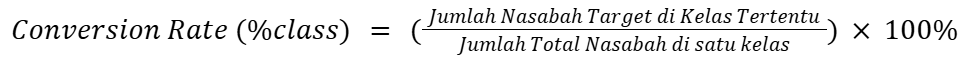

Penjelasan:
- **Jumlah nasabah target di kelas tertentu**: Total nasabah dalam kategori variabel tertentu (misalnya, usia: "adult", "child") yang setuju untuk deposito.
- **Jumlah total nasabah di satu kelas**: Total nasabah dalam kategori variabel tertentu, termasuk yang setuju dan tidak setuju.
- Hasilnya menggambarkan persentase penerimaan dalam kategori variabel tertentu

<br>

**Proportion Rate(%n)**
<br>

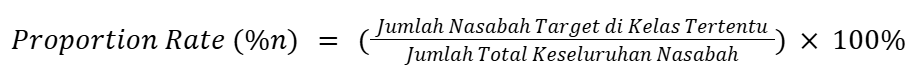

<br>

Penjelasan:<br>

- **Jumlah nasabah target di kelas tertentu**: Total nasabah dalam kategori variabel tertentu (misalnya, usia: "adult", "child") yang setuju untuk deposito.
- **Jumlah total Keseluruhan Nasabah**: Total seluruh nasabah dari semua kategori usia, termasuk yang setuju dan tidak setuju.
- Hasilnya menggambarkan kontribusi persentase dari kategori variabel tertentu terhadap total penerimaan semua secara keseluruhan.<br>

<br>

**Catatan**
- **Conversion Rate (%class)**: Berfokus pada keberhasilan dalam kategori tertentu.
- **Proportion Rate (%n)**: Berfokus pada kontribusi suatu kategori tertentu terhadap keseluruhan populasi nasabah.



## **Modifikasi Table Untuk Keperluan Analisis Data**

### **Age**

Modifikasi pertama dilakukan untuk kolom `Age`, dimana pembagian usia dibuat menjadi 6 Kategori, yakni:
  - Nasabah dengan usia dubawah 13 tahun = Child
  - Nasabah dengan usia 13-20 tahun = Teenage
  - Nasabah dengan usia 21-30 tahun = Young Adult
  - Nasabah dengan usia 31-44 tahun = Adult
  - Nasabah dengan usia 45-59 tahun = middle-age
  - Nasabah dengan usia diatas 60 tahun = Elderly

Pembagian kategori usia ini mengacu pada [PROVISIONAL GUIDELINES
ON STANDARD INTERNATIONAL AGE CLASSIFICATIONS ](https://unstats.un.org/unsd/publication/SeriesM/SeriesM_74e.pdf)

In [ ]:
def age_class(x):
    if x < 13:
        age_class = 'child'
    elif 13 <= x < 21:
        age_class = 'teenage'
    elif 21 <= x < 31:
        age_class = 'young adult'
    elif 31 <= x < 45:
        age_class = 'adult'
    elif 45 <= x < 60:
        age_class = 'middle-aged'
    else:
        age_class = 'elderly'

    return age_class

df_EDA.insert(1, 'age_class',value ='')

df_EDA['age_class'] = df_EDA['age'].apply(age_class)

### **Duration**

Modifikasi ke-2 dilakukan pada kolom `Duration` untuk menangkap pola durasi terefektif dan efisien dengan lebih mudah.

In [ ]:
bins = [0, 200, 400, 600, 800, 1000, df_EDA['duration'].max()]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df_EDA['duration_range'] = pd.cut(df_EDA['duration'], bins=bins, labels=labels, right=False)

### **Campaign**

Modifikasi ke-3 dilakukan pada kolom `Campaign` untuk menangkap pola jumlah frekuensi terefektif dan efisien dengan lebih mudah.

In [ ]:
bins = [1, 3, 5, 7, 9, 11, 13, 15, df_EDA['campaign'].max()]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df_EDA['campaign_range'] = pd.cut(df_EDA['campaign'], bins=bins, labels=labels, right=False)

In [ ]:
df_EDA.head()

age    age_class        job  marital            education default housing  \
0   56  middle-aged  housemaid  married             basic.4y      no      no   
2   37        adult   services  married          high.school      no     yes   
3   40        adult     admin.  married             basic.6y      no      no   
4   56  middle-aged   services  married          high.school      no      no   
6   59  middle-aged     admin.  married  professional.course      no      no   

  loan    contact month day_of_week  duration  campaign          pdays  \
0   no  telephone   may         mon       261         1  not contacted   
2   no  telephone   may         mon       226         1  not contacted   
3   no  telephone   may         mon       151         1  not contacted   
4  yes  telephone   may         mon       307         1  not contacted   
6   no  telephone   may         mon       139         1  not contacted   

   previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  \
0         0  nonexistent           1.1          93.994          -36.4   
2         0  nonexistent           1.1          93.994          -36.4   
3         0  nonexistent           1.1          93.994          -36.4   
4         0  nonexistent           1.1          93.994          -36.4   
6         0  nonexistent           1.1          93.994          -36.4   

   euribor3m  nr.employed  y duration_range campaign_range  
0      4.857       5191.0  0        200-400            1-3  
2      4.857       5191.0  0        200-400            1-3  
3      4.857       5191.0  0          0-200            1-3  
4      4.857       5191.0  0        200-400            1-3  
6      4.857       5191.0  0          0-200            1-3

In [ ]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36658 entries, 0 to 41187
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             36658 non-null  int64   
 1   age_class       36658 non-null  object  
 2   job             36658 non-null  object  
 3   marital         36658 non-null  object  
 4   education       36658 non-null  object  
 5   default         36658 non-null  object  
 6   housing         36658 non-null  object  
 7   loan            36658 non-null  object  
 8   contact         36658 non-null  object  
 9   month           36658 non-null  object  
 10  day_of_week     36658 non-null  object  
 11  duration        36658 non-null  int64   
 12  campaign        36658 non-null  int64   
 13  pdays           36658 non-null  object  
 14  previous        36658 non-null  int64   
 15  poutcome        36658 non-null  object  
 16  emp.var.rate    36658 non-null  float64 
 17  cons.price.idx  3

Dari sini terlihat, terdapat penambahan 3 kolom pada dataset, `age_class`, `duration_range`,`campaign_range`. 3 kolom tersebutlah yang akan digunakan dalam analisis data terkait variabel yang ingin ditinjau.

## **Hasil Kampanye**

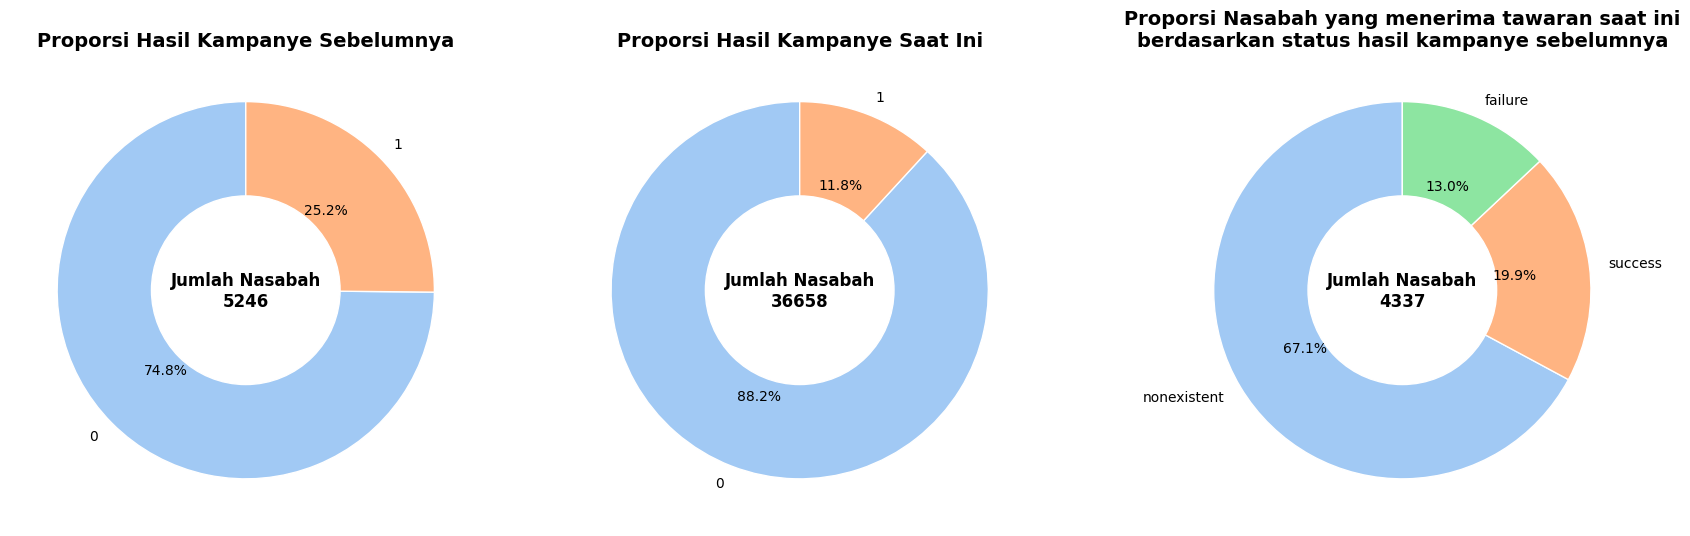

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_prev = df_EDA[df_EDA['poutcome'] != 'nonexistent'].copy()
if df_prev['poutcome'].dtype == 'object':
    df_prev.loc[:, 'poutcome'] = df_prev['poutcome'].apply(lambda x: 1 if x == 'success' else 0)

df_yes_filtered = df_EDA[df_EDA['y'] == 1]
poutcome_counts = df_yes_filtered['poutcome'].value_counts()

pastel_colors_2 = sns.color_palette("pastel", n_colors=2)
pastel_colors_3 = sns.color_palette("pastel", n_colors=len(poutcome_counts))

fig, axes = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1, 1.2]})

explode = (0.1, 0)
df_prev['poutcome'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=pastel_colors_2,
    ax=axes[0],
    wedgeprops={'edgecolor': 'white'}
)
axes[0].set_ylabel('')
axes[0].set_title('Proporsi Hasil Kampanye Sebelumnya', fontsize=14, fontweight='bold')
centre_circle_1 = plt.Circle((0, 0), 0.5, fc='white', edgecolor='white')
axes[0].add_artist(centre_circle_1)
axes[0].text(
    0, 0, f"Jumlah Nasabah\n{len(df_prev)}",
    fontsize=12, fontweight='bold', color='black', ha='center', va='center'
)

df_EDA['y'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=pastel_colors_2,
    ax=axes[1],
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_ylabel('')
axes[1].set_title('Proporsi Hasil Kampanye Saat Ini', fontsize=14, fontweight='bold')
centre_circle_2 = plt.Circle((0, 0), 0.5, fc='white', edgecolor='white')
axes[1].add_artist(centre_circle_2)
axes[1].text(
    0, 0, f"Jumlah Nasabah\n{len(df_EDA)}",
    fontsize=12, fontweight='bold', color='black', ha='center', va='center'
)

poutcome_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=pastel_colors_3,
    wedgeprops={'edgecolor': 'white'},
    ax=axes[2]
)
axes[2].set_ylabel('')
axes[2].set_title('Proporsi Nasabah yang menerima tawaran saat ini\nberdasarkan status hasil kampanye sebelumnya', fontsize=14, fontweight='bold')
centre_circle_2 = plt.Circle((0, 0), 0.5, fc='white', edgecolor='white')
axes[2].add_artist(centre_circle_2)
axes[2].text(
    0, 0, f"Jumlah Nasabah\n{len(df_yes_filtered)}",
    fontsize=12, fontweight='bold', color='black', ha='center', va='center'
)

plt.tight_layout(pad=3)
plt.show()

Dari grafik paling kiri dan tengah, terlihat bahwa **terjadi penurunan persentase tingkat penerimaan** dari kampanye sebelumnya ke kampanye saat ini. Pada kampanye sebelumnya, tingkat penerimaan mencapai **25.2%**, namun menurun **menjadi 11.8%** pada kampanye saat ini. **Penurunan ini sangat mungkin dipengaruhi oleh jumlah nasabah yang dihubungi pada kampanye saat ini, yang hampir 7 kali lipat lebih besar dibandingkan kampanye sebelumnya**. Hal ini menunjukkan bahwa **peningkatan jumlah nasabah** yang dihubungi **belum diimbangi dengan efektivitas strategi kampanye** yang relevan dengan segmen nasabah yang ditargetkan.

Sementara itu, grafik di sisi kanan memberikan wawasan lebih dalam tentang sumber keberhasilan kampanye saat ini. **Dari total 4337 nasabah** yang menerima tawaran pada kampanye ini (11.8%), **sebagian besar (67.1%) berasal dari kategori nonexistent**, yaitu nasabah yang tidak terlibat dalam kampanye sebelumnya. Hal ini menunjukkan bahwa **segmen nasabah baru memiliki potensi yang signifikan** dalam memberikan kontribusi terhadap hasil kampanye. Namun, hasil ini juga menyoroti adanya ketergantungan pada nasabah baru, mengingat hanya 19.3% penerima tawaran berasal dari nasabah dengan status kampanye sebelumnya "sukses." Sementara itu, 13% penerima tawaran berasal dari nasabah dengan status "gagal" pada kampanye sebelumnya.

Kesimpulannya, untuk meningkatkan keberhasilan kampanye di masa depan, **penting bagi tim pemasaran untuk melakukan evaluasi strategi kampanye**, khususnya dalam mempertahankan hubungan dengan nasabah lama yang pernah memberikan respons positif. Selain itu, perlu dilakukan segmentasi dan **pendekatan yang lebih terfokus untuk mengoptimalkan potensi dari segmen nasabah baru**, sembari meminimalkan tingkat kegagalan pada nasabah yang pernah dihubungi sebelumnya. Strategi ini dapat meliputi penguatan personalisasi kampanye dan edukasi yang lebih baik terhadap nasabah potensial.

Inilah yang **mendasari pentingnya pengembangan model machine learning yang dapat memprediksi potensi nasabah secara lebih akurat**. Dengan memanfaatkan machine learning, tim pemasaran dapat mengidentifikasi segmen nasabah yang memiliki probabilitas tinggi untuk menerima tawaran kampanye. Hal ini tidak hanya akan membantu meningkatkan efisiensi kampanye dengan mengurangi biaya dan waktu, tetapi juga memungkinkan perusahaan untuk memfokuskan sumber daya pada nasabah yang benar-benar potensial. Dengan demikian, kampanye yang lebih terarah dan berbasis data dapat memberikan hasil yang lebih optimal.

Dalam rangka menemukan strategi pendekatan/pola kampanye yang relevan terhadap nasabah potensial, akan dilakukan analisis awal data yang bertujuan untuk memahami karakteristik, struktur, dan komponen penting dari nasabah yang ada

## **Apa Saja Faktor yang Mempengaruhi Keputusan Nasabah Untuk Menerima Tawaran Deposito?**

Selain fitur numerik yang terbukti berpengaruh terhadap variabel target, kita perlu mengetahui pengaruh dari variabel kategorik terhadap variabel target, dengan hipotesis sebagai berikut:
  - H0: Tidak ada hubungan antara fitur (variabel kategorikal) dan target (y)
  - H1: Ada hubungan antara fitur dan target (y). Yang berarti fitur tersebut mempengaruhi variabel Y.

Analisis ini akan dilakukan menggunakan uji Chi-Square dimana jika p-value kurang dari tingkat signifikansi (0,05), kita menolak hipotesis nol dan menerima hipotesis alternati/H1. Dengan kata lain, jika p-value kecil, ada cukup bukti untuk mengatakan bahwa fitur tersebut mempengaruhi target `y`.

In [ ]:
categorical_features = df_EDA.drop(columns='y').select_dtypes(include='object').columns

chi_square_results = []

for feature in categorical_features:
    contingency_table = pd.crosstab(df_EDA[feature], df_EDA['y'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append({
        'Feature': feature,
        'P_Value': p
    })

chi_square_df = pd.DataFrame(chi_square_results)

chi_square_df

Feature        P_Value
0     age_class  1.367217e-251
1           job  9.953501e-195
2       marital   5.653041e-22
3     education   2.476542e-34
4       default   1.000000e+00
5       housing   1.356972e-01
6          loan   1.734906e-02
7       contact  1.118538e-162
8         month   0.000000e+00
9   day_of_week   8.443326e-05
10        pdays   0.000000e+00
11     poutcome   0.000000e+00

- **Features yang memiliki p-value < 0.05:**<br>
`age_class, job, marital, education, contact, month, pdays, poutcome, dan day_of_week dan loan` memiliki p-value yang sangat kecil (semua fitur jauh di bawah 0.05), yang berarti kita **menolak H0 untuk fitur-fitur diatas**. Dengan kata lain, **ada hubungan yang signifikan antara fitur-fitur tersebut dan hasil kampanye**. Artinya, distribusi kategori pada fitur-fitur ini mempengaruhi nilai y.
- **Features yang memiliki p-value >= 0.05:**<br>
`default` dan `housing` memiliki p-value yang lebih besar dari 0,05. Untuk fitur ini, **kita tidak menolak hipotesis nol, yang berarti tidak ada bukti yang cukup untuk mengatakan bahwa fitur ini mempengaruhi keberhasilan kampanye**. Fitur ini tampaknya independen terhadap target y.

### **Bagaimana Pengaruh Faktor Demografi Terhadap Tasil Kampanye**

#### **Berdasarkan Kategori Usia**

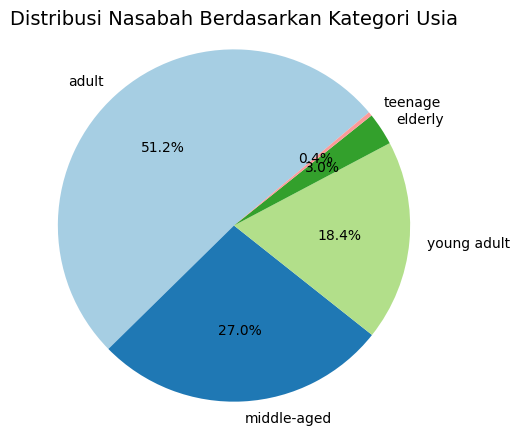

In [ ]:
age_class_counts = df_EDA['age_class'].value_counts()
plot_pie_chart(age_class_counts, title="Distribusi Nasabah Berdasarkan Kategori Usia")

Dari hasil grafik diatas diketahui:
- **Kategori adult (31-44 tahun)** merupakan kelompok usia terbesar, mencakup 51.2% dari total nasabah. Kelompok ini kemungkinan besar menjadi fokus utama kampanye karena memiliki porsi terbesar.
- **Kategori middle-aged (45-59 tahun)** adalah yang terbesar kedua, dengan 27.0% dari total nasabah. kelompok ini juga penting untuk dipertimbangkan sebagai target, mengingat kontribusi yang cukup signifikan.
- **Kategori young adult (21-30 tahun)** mencakup 18.4% dari total, memberikan peluang untuk meningkatkan penetrasi kampanye di kelompok ini.
- **Kategori teenage (13-20 tahun)** sangat kecil, hanya 0.48% dari total. Kelompok ini tidak menjadi prioritas karena pangsa pasar yang sangat kecil.
- **Kategori elderly (>60 tahun)** hanya mencakup 3.0% dari total. Potensi keberhasilan kampanye pada kelompok ini harus dipertimbangkan lebih lanjut, mengingat persentase yang kecil.

In [ ]:
print(f'total nasabah(n): {len(df_EDA)}')

total nasabah(n): 36658


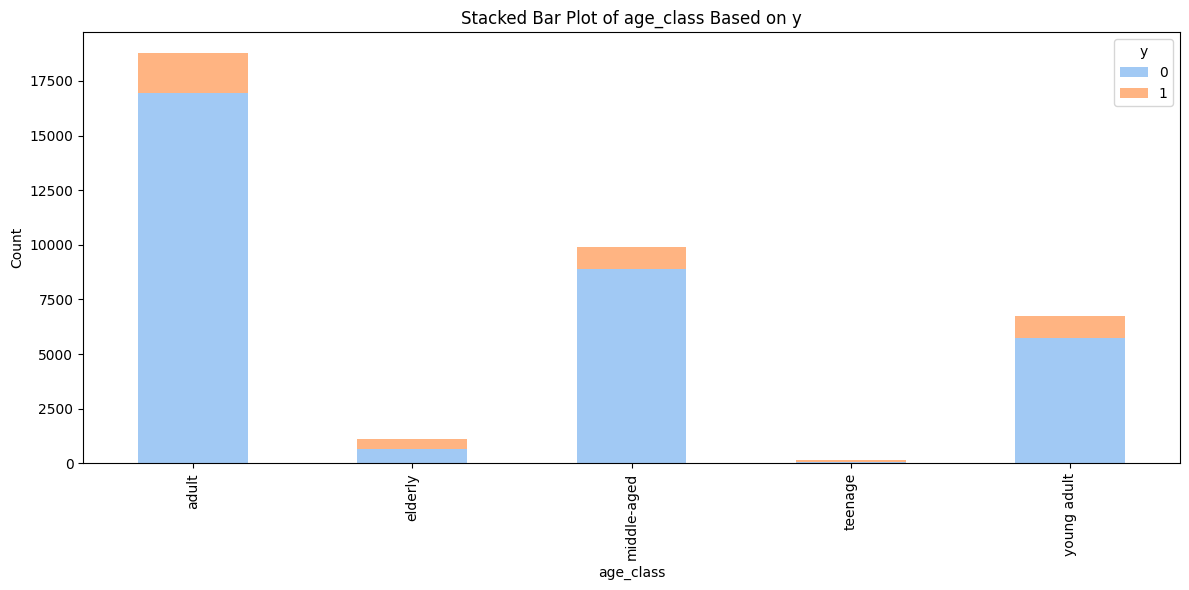

In [ ]:
plot_stacked_barplot(df_EDA, 'age_class', 'y')

In [ ]:
age_subs_rates = calculate_subscription_rates(df_EDA, 'age_class', 'y')
age_subs_rates

y    age_class      0     1  total  CR(%class)  PR(%n)  not subscribe(%n)
0        adult  16956  1831  18787        9.75    4.99              46.25
4  young adult   5728  1022   6750       15.14    2.79              15.63
2  middle-aged   8905   982   9887        9.93    2.68              24.29
1      elderly    651   448   1099       40.76    1.22               1.78
3      teenage     81    54    135       40.00    0.15               0.22

**Kesimpulan Berdasarkan Kategori Usia dan Pengaruhnya terhadap Keputusan Penerimaan Tawaran Deposito**

Dari hasil analisis terhadap data usia nasabah dan tingkat konversi terhadap tawaran deposito, dapat disimpulkan bahwa kelompok usia memiliki peran penting dalam keputusan finansial nasabah. Berikut adalah analisis masing-masing kategori usia:

**1. Adult (31-44 tahun)**  
  - Kelompok *Adult* merupakan kategori usia dengan jumlah nasabah terbesar (18.787 orang), namun tingkat konversi (CR) mereka relatif rendah (9.75%). Meskipun kontribusinya terhadap total penerimaan kampanye cukup besar, yaitu 4.99%, kelompok ini juga menyumbang 46.25% dari total nasabah yang menolak tawaran.  
  - Kelompok *Adult* umumnya berada pada fase kehidupan yang lebih stabil secara finansial dan lebih fokus pada perencanaan jangka panjang, seperti tabungan untuk pendidikan anak atau pensiun. Oleh karena itu, mereka cenderung lebih selektif dalam menerima tawaran yang tidak langsung berhubungan dengan kebutuhan mereka. Untuk lebih menarik perhatian kelompok ini, pendekatan yang menekankan keamanan finansial dan investasi jangka panjang dapat lebih efektif. Sebuah penelitian oleh *Cartensen*, [Age Differences in Consumer Decision Making under Option Framing: From the Motivation Perspective](https://chatgpt.com/c/673da29a-291c-800a-89ec-ebfc679ba749),
 menunjukkan bahwa usia ini lebih cenderung memilih produk finansial yang menawarkan kestabilan dan keberlanjutan dibandingkan keuntungan jangka pendek.

**2. Young Adult (21-30 tahun)**  
  - Kelompok *Young Adult* memiliki tingkat konversi yang lebih tinggi, yaitu 15.14%, dan berkontribusi 2.79% terhadap total penerimaan kampanye. Tingkat respons mereka yang lebih tinggi menunjukkan bahwa kelompok ini lebih terbuka terhadap tawaran yang bersifat dinamis dan inovatif.  
  - Kelompok ini cenderung lebih terpapar pada tren teknologi dan pemasaran digital, yang membuat mereka lebih responsif terhadap pendekatan yang menggunakan teknologi dan strategi komunikasi modern. Studi oleh *Fangling Ruan* [Age Differences in Consumer Decision Making under Option Framing: From the Motivation Perspective](https://chatgpt.com/c/673da29a-291c-800a-89ec-ebfc679ba749) mengungkapkan bahwa kelompok *Young Adult* lebih tertarik pada produk yang memberikan fleksibilitas dan kemudahan dalam pengelolaan keuangan, yang sejalan dengan karakteristik mereka yang lebih melek digital.

**3. Middle-aged (45-50 tahun)**  
- Kelompok *Middle-aged* memiliki tingkat konversi sebesar 9.93%, yang hampir setara dengan *Adult*, dan memberikan kontribusi 2.68% terhadap total penerimaan kampanye. Mereka juga menyumbang 24.29% dari nasabah yang menolak tawaran.  
- Pada usia ini, nasabah mulai lebih serius mempertimbangkan perencanaan pensiun dan stabilitas finansial jangka panjang. Oleh karena itu, mereka lebih tertarik pada tawaran yang menjanjikan pengelolaan keuangan yang lebih aman dan stabil. Penelitian oleh [*The Journal of Aging & Social Policy*](https://www.sciencedirect.com/science/article/abs/pii/S1057740808001253) menunjukkan bahwa kelompok usia ini cenderung lebih memilih investasi yang dapat memberikan pengembalian stabil dan mengurangi risiko finansial, terutama karena mereka sudah mulai mempersiapkan masa pensiun.

**4. Elderly (60 tahun ke atas)**  
- Kelompok *Elderly* memiliki tingkat konversi tertinggi (40.76%), meskipun jumlah nasabahnya relatif kecil (1,099 orang). Mereka juga memiliki kontribusi yang sangat kecil terhadap penolakan tawaran (1.78%).  
- Kelompok ini lebih terbuka terhadap produk finansial yang sesuai dengan kebutuhan mereka sebagai pensiunan, yang sering kali mencari produk yang memberikan keamanan dan pendapatan tetap. Penelitian oleh [*Journal of Financial Planning*](https://www.financialplanningassociation.org/article/journal/AUG21-how-estimate-end-retirement) mengungkapkan bahwa kelompok usia ini lebih memilih produk yang menawarkan pendapatan yang dapat diandalkan dan mengurangi ketidakpastian finansial di usia tua.

**5. Teenage (13-20 tahun)**  
- Kelompok *Teenage*memiliki tingkat konversi yang sangat tinggi (40.00%), meskipun jumlah nasabahnya sangat kecil (135 orang).  
- Meskipun mereka masih muda, kelompok ini mungkin tertarik pada produk yang memberi mereka kesempatan untuk mulai menabung atau berinvestasi sejak dini. Mereka lebih terbuka terhadap inovasi dan pemasaran yang kreatif. Sebuah studi oleh [*The University of Chicago Press Juurnals*](https://www.journals.uchicago.edu/doi/full/10.1086/729274) menunjukkan bahwa generasi muda cenderung lebih tertarik pada produk finansial yang menggabungkan elemen teknologi dan inovasi, seperti aplikasi pengelolaan keuangan yang memudahkan mereka untuk mengontrol dan melacak pengeluaran mereka.

**Insight**

Pada penyusunan strategi kampanye kali ini, Kelompok **Adult** sebagai **target utama** analisis karena memiliki **potensi pasar terbesar** dengan jumlah nasabah terbanyak (18,787 orang). Meskipun tingkat keberhasilan (conversion rate) mereka saat ini relatif rendah (9.75%), volume mereka yang besar memberikan **peluang signifikan untuk meningkatkan hasil kampanye** melalui pendekatan yang lebih relevan dan personal.

Fokus pada kelompok ini memungkinkan **kampanye berskala luas dengan dampak yang lebih signifikan pada pendapatan**. Dengan daya beli yang stabil, Adult berpotensi memberikan kontribusi besar pada margin profit perusahaan. Selain itu, strategi pemasaran dapat lebih mudah dioptimalkan melalui personalisasi pesan, promosi yang sesuai, dan komunikasi multi-kanal.

Fokus ini tidak berarti mengabaikan kelompok lain, tetapi memanfaatkan peluang terbesar untuk hasil yang maksimal.

#### **Berdasarkan Profesi Pekerjaan**

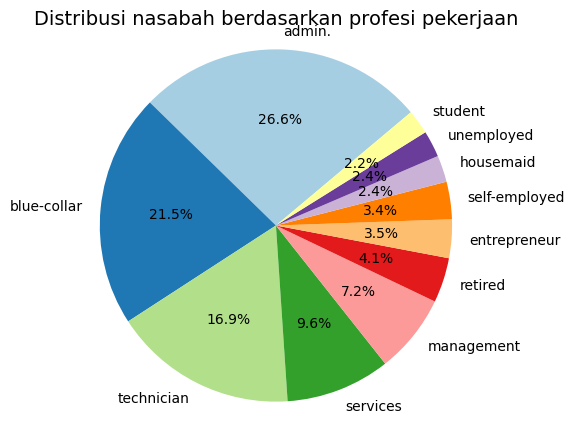

In [ ]:
job_counts = df_EDA['job'].value_counts()
plot_pie_chart(job_counts, title="Distribusi nasabah berdasarkan profesi pekerjaan")

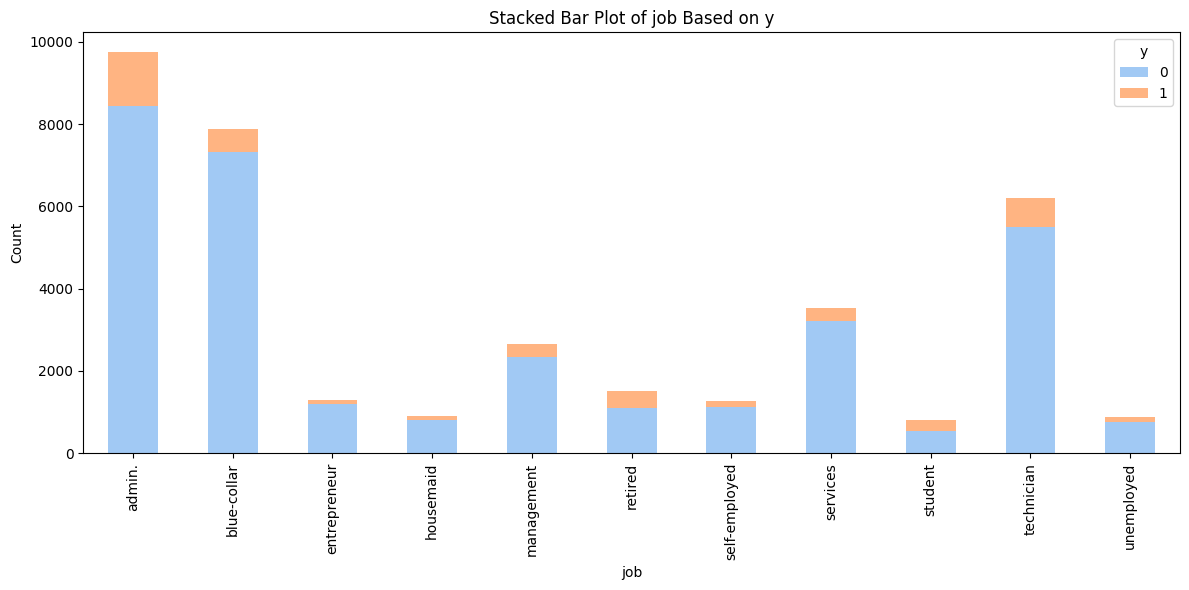

In [ ]:
plot_stacked_barplot(df_EDA, 'job', 'y')

In [ ]:
print(f'total nasabah: n = {len(df_EDA)}')
job_subs_rates = calculate_subscription_rates(df, 'job', 'y')
job_subs_rates

total nasabah: n = 36658


y             job     0     1  total  CR(%class)  PR(%n)  not subscribe(%n)
0          admin.  8444  1300   9744       13.34    3.55              23.03
9      technician  5503   690   6193       11.14    1.88              15.01
1     blue-collar  7312   559   7871        7.10    1.52              19.95
5         retired  1097   413   1510       27.35    1.13               2.99
4      management  2339   318   2657       11.97    0.87               6.38
7        services  3217   301   3518        8.56    0.82               8.78
8         student   552   266    818       32.52    0.73               1.51
6   self-employed  1118   142   1260       11.27    0.39               3.05
10     unemployed   754   136    890       15.28    0.37               2.06
2    entrepreneur  1185   114   1299        8.78    0.31               3.23
3       housemaid   800    98    898       10.91    0.27               2.18

Berdasarkan data nasabah secara keseluruhan,

**Kesimpulan dari grafik dan tabel diatas berdasarkan profesi pekerjaan dan Pengaruhnya terhadap Keputusan Penerimaan Tawaran Deposito antara lain:**

- **Admin:**
  - Dari 9744 Nasabah yang berprofesi sebagai admin, sebesar 13.34% nasabah pada kategori ini menerima tawaran deposito yang diberikan (CR%class). profesi ini merupakan proporsi terbesar dalam kontribusi penerimaan tawaran secara keseluruhan(PR(%n) 3.55%) dan menyumbang 23.03% dari total nasabah yang tidak berlangganan. Profesi ini menjadi salah satu target prioritas karena jumlahnya yang besar, meskipun CR-nya tidak terlalu tinggi.
  - Profesi admin sering kali memiliki gaji tetap yang membuat mereka lebih nyaman menyisihkan dana untuk produk keuangan yang minim risiko​.  Dengan tanggung jawab pekerjaan yang rutin dan waktu kerja yang padat, mereka cenderung mencari produk yang tidak membutuhkan banyak perhatian atau pengelolaan aktif. Deposito cocok untuk kebutuhan ini karena pengelolaannya sederhana dan memberikan bunga tetap. [Banking Industry](https://collegegrad.com/industries/banking)


- **Technician:**
  - Dari 6193 Nasabah yang berprofesi sebagai teknisi, sebesar 11.14% nasabah menerima tawaran deposito yang diberikan, dengan kontribusi secara keseluruhan ,PR(%n), sebesar 1.88%. Meski kontribusinya cukup besar dalam populasi, strategi tambahan diperlukan untuk meningkatkan tingkat keberhasilan kampanye.
  - dengan nilai CR(%class) yang moderat pada teknisi menunjukkan bahwa mereka memiliki stabilitas finansial yang cukup baik untuk mempertimbangkan deposito, namun mungkin lebih memilih opsi investasi lain seperti properti atau saham.
  - Hal ini dapat dikarenakan profesi teknis sering kali memiliki pengetahuan yang baik tentang alternatif investasi, sehingga mereka lebih selektif dalam memilih produk finansial. [Nature of the Banking Industry](https://collegegrad.com/industries/banking)

- **Blue-Collar:**
  - CR(%class) profesi ini adalah 7.10%, yang tergolong rendah, tetapi populasinya signifikan (PR(%n) 1.52%). Dengan CR yang rendah, dibutuhkan pendekatan kampanye yang lebih personal untuk meningkatkan efektivitas.
  -  Profesi ini memiliki CR(%class) rendah karena biasanya memiliki pendapatan yang lebih rendah dan prioritas keuangan untuk kebutuhan sehari-hari, dan memiliki kecenderungan memilih tabungan atau investasi yang lebih likuid. Selain itu, pengetahuan tentang deposito mungkin lebih terbatas dibandingkan kelompok lain. [Blue-collar 101](https://helpfulprofessor.com/blue-collar-jobs-examples/)

- **Retired:**
  - dengan CR(%class) mencapai 27.35%, yang merupakan salah satu yang tertinggi, meskipun kontribusinya dalam populasi (PR 1.13%) lebih kecil. Profesi ini menunjukkan potensi keberhasilan yang besar dengan pendekatan yang relevan, seperti menekankan manfaat jangka panjang dari produk.
  - Tingkat konversi tinggi di kalangan pensiunan kemungkinan disebabkan oleh kebutuhan mereka untuk mempertahankan modal dan menghasilkan pendapatan pasif. Deposito dianggap aman dan stabil, sehingga menarik bagi mereka yang tidak lagi bekerja dan menghindari risiko tinggi. [retired preferance](https://collegegrad.com/industries/banking)

- **Management**,**services**, dan **self-employed**
  - ketida Profesi diatas menunjukkan CR(%class) yang cukup baik (8.56%–11.97%) dengan kontribusi populasi PR(%n) yang moderat (0.87%, 0.82%, 0.39%).
  - Nasabah dengan profesi dibidang management memiliki CR% sedang karena pendapatan mereka memungkinkan mereka untuk berinvestasi, namun sering kali mereka lebih memilih diversifikasi portofolio ke instrumen investasi lain yang lebih fleksibel, seperti reksadana dan lainya [Banking Industry](https://collegegrad.com/industries/banking)
  - Nasabah dengan profesi Self-employed memiliki CR yang mirip dengan teknisi karena mereka membutuhkan likuiditas yang lebih tinggi untuk mendukung operasional usaha mereka. Kelompok ini juga cenderung lebih berhati-hati dalam mengunci uang mereka dalam investasi jangka panjang​. [Nature of the Banking Industry](https://collegegrad.com/industries/banking)

- **Enterpreneur**
  - Hanya 114 dari 1299 nasabah dari profesi yang menerima tawaran deposito. Sebagai profesi dengan jumlah nasabah terkecil ke-5, profesi ini memiliki CR (8.78%) dan PR (0.31%) yang cukup kecil dibandingkan profesi lainya. Hal ini disebabkan karena Pengusaha lebih sering mengalokasikan dana mereka untuk reinvestasi bisnis daripada instrumen deposito, yang membuat CR mereka lebih rendah. Kebutuhan modal kerja dan reinvestasi sering menjadi prioritas utama peofesi enterpreneur. [enterpreneur VS Term Deposit](https://www.kansascityfed.org/research/economic-bulletin/what-has-driven-the-recent-increase-in-retirements/)

- **Student** dan **unemployed**
  - Kelompok ini memiliki CR(%class) yang tinggi (32.52% dan 15.28%), meskipun kontribusi populasi mereka kecil (PR(%n) < 1%). Strategi sederhana, hemat biaya, serta pendekatan empati dapat meningkatkan keberhasilan di segmen ini. Profesi seperti entrepreneur dan housemaid juga memiliki peluang dengan kampanye yang relevan, seperti menekankan manfaat praktis atau bisnis.
  - Student memiliki CR tertinggi dapat disebabkan oleh kebutuhan menabung untuk biaya pendidikan atau pengeluaran masa depan. Mereka juga lebih terbuka terhadap edukasi finansial dan cenderung memahami keuntungan deposito. Berdasarkan (studi ilmiah Rangga Pratama)[https://jimfeb.ub.ac.id/index.php/jimfeb/article/view/3038/2721], student/ mahasiswa  lebih banyak memilih untuk menabungkan uangnya di deposito sebesar 53%.
  - Profesi Unemployed memiliki tingkat konversi yang cukup tinggi mungkin berasal dari pengangguran yang berfokus pada penggunaan dana darurat dengan lebih bijak, termasuk menyimpannya dalam deposito. Pengangguran cenderung mencari cara untuk memanfaatkan dana terbatas mereka dengan aman dan mendapatkan bunga tetap. [Banking Industry](https://collegegrad.com/industries/banking)

- **Housemaid:**
  - Total nasabah yang berprofesi sebagai housemaid berjumlah 898, dan hanya 	10.91% dari mereka yang memilih untuk menerima tawaran deposito. hal ini dapat disebabkan oleh rate pendapatan profesi ini yang cenderung lebih rendah, dan memiliki behaviour menyimpan dana untuk kebutuhan mendesak.
  - Kelompok ini sering menghadapi keterbatasan akses terhadap informasi finansial dan memiliki keterbatasan dana untuk investasi. [Blue-collar 101](https://helpfulprofessor.com/blue-collar-jobs-examples/)

- Profesi student dan retired memiliki keterkaitan yang erat dengan kategori usia, menunjukkan keselarasan tingkat CR(%class) antara pekerjaan dan usia nasabah. Dalam analisis Age_class, kategori teenage dan elderly juga menjadi dua kelompok usia dengan tingkat konversi tertinggi. Hal ini dapat dijelaskan oleh sifat kampanye sebelumnya yang menggunakan telemarketing, di mana nasabah retired dan student umumnya memiliki lebih banyak waktu luang dan dapat dihubungi dengan frekuensi lebih tinggi dibandingkan nasabah usia produktif lainnya.


  

Mengingat target observasi dalam penyusunan metode kampanye ini adalah Nasabah dengan usia Adult, akan dilihat bagaimana distribusi pekerjaan bagi nasabah pada kategori usia Adult, agar kampanye lebih relevan dengan target utama kali ini.

In [ ]:
job_subs_rates = calculate_subscription_rates(df_EDA[df_EDA['age_class']=='adult'], 'job', 'y')
job_subs_rates.sort_values(by='total', ascending=False)

y             job     0    1  total  CR(%class)  PR(%n)  not subscribe(%n)
0          admin.  4748  609   5357       11.37    3.24              25.27
1     blue-collar  3955  284   4239        6.70    1.51              21.05
9      technician  3274  387   3661       10.57    2.06              17.43
7        services  1641  161   1802        8.93    0.86               8.73
4      management  1220  154   1374       11.21    0.82               6.49
2    entrepreneur   645   56    701        7.99    0.30               3.43
6   self-employed   564   70    634       11.04    0.37               3.00
10     unemployed   414   57    471       12.10    0.30               2.20
3       housemaid   365   22    387        5.68    0.12               1.94
8         student    92   27    119       22.69    0.14               0.49
5         retired    38    4     42        9.52    0.02               0.20

**insight**:<br>
Saat dilakukan pengecekan profesi pada segment nasabah utama, kalangan usia adult. Terlihat pola yang cenderung mirip dengan keseluruhan nasabah, mengingat adult merupakan kalangan usia mayoritas sehingga hal ini sangat mungkin terjadi. Untuk itu, akan dibuat strategi kampanye yang sebisa mungkin paling relevan dengan 3 besar profesi pekerjaan di usia adult, yakni **admin., blue-collar, dan technician**. Rencana kampanye dibuat serelevan mungkin dengan target tersebut agar dapat memaksimalkan potensi dari segmen terbesar dalam kategori adult, sementara segmen lain tetap dipertimbangkan untuk optimalisasi tambahan.

#### **Berdaasrkan Status Pernikahan**

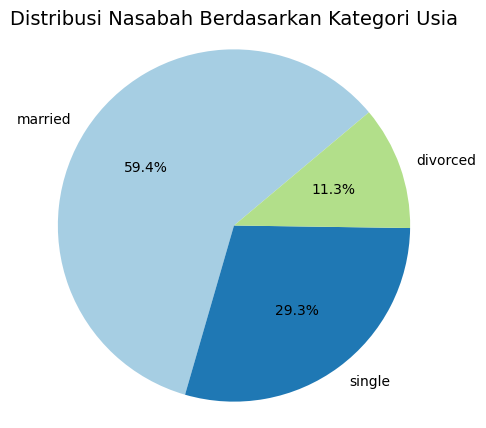

In [ ]:
marital_counts = df_EDA['marital'].value_counts()
plot_pie_chart(marital_counts, title="Distribusi Nasabah Berdasarkan Kategori Usia")

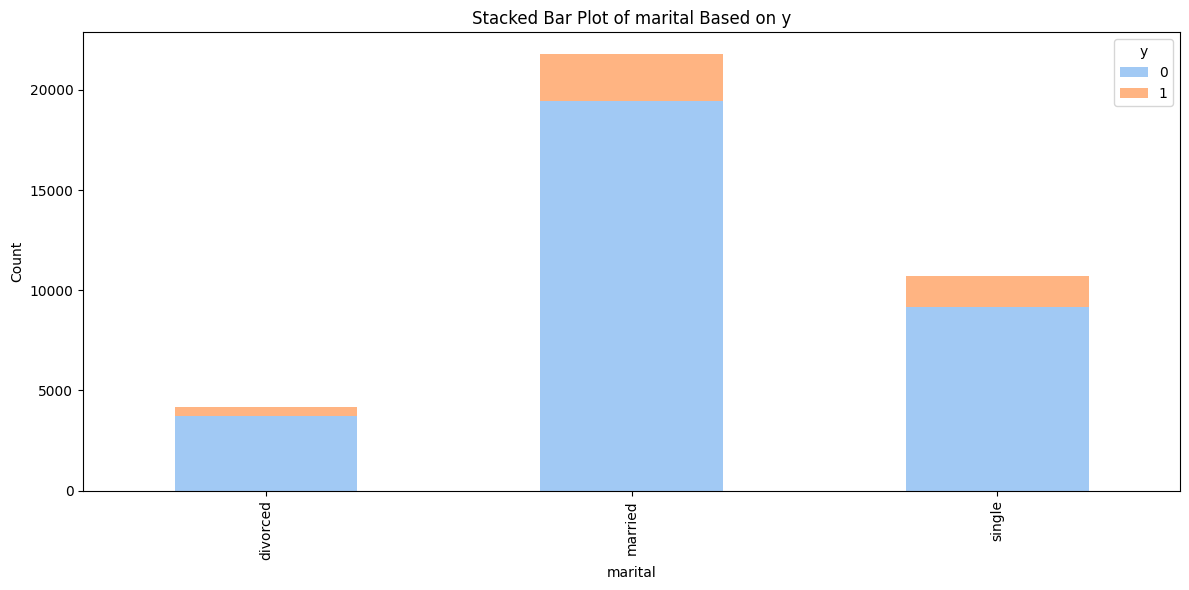

In [ ]:
plot_stacked_barplot(df_EDA, 'marital', 'y')

In [ ]:
marital_subs_rates = calculate_subscription_rates(df_EDA, 'marital', 'y')
marital_subs_rates

y   marital      0     1  total  CR(%class)  PR(%n)  not subscribe(%n)
1   married  19437  2340  21777       10.75    6.38              53.02
2    single   9177  1547  10724       14.43    4.22              25.03
0  divorced   3707   450   4157       10.83    1.23              10.11

**Kesimpulan Berdasarkan Status pernikahan dan Pengaruhnya terhadap Keputusan Penerimaan Tawaran Deposito antara lain:**

1. **Tingkat Keberhasilan Tertinggi**: Nasabah dengan status *Single* memiliki tingkat keberhasilan tertinggi (14.43%) dalam kelasnya. Hal ini menunjukkan bahwa mereka lebih responsif terhadap tawaran deposito dibandingkan dengan status pernikahan lainnya. Hal ini mungkin terjadi karena nasabah ini cenderung fokus pada stabilitas keuangan pribadi dan masa depan, dan lebih mudah diarahkan untuk mengambil keputusan keuangan karena tidak memiliki tanggung jawab keluarga yang kompleks.
2. **Dominasi Jumlah Keberhasilan Absolut**: Secara keseluruhan, nasabah dengan status *Married* mendominasi jumlah keberhasilan dengan kontribusi 6.38% dari total nasabah. Dominasi jumlah nasabah ini menunjukkan potensi besar untuk meningkatkan konversi. Namun, pendekatan harus disesuaikan dengan kebutuhan keluarga, seperti investasi jangka panjang atau pendidikan anak.

Kemudian akan dilakukan pengecekan status pernikahan nasabah dengan kategori usia adult sebagaimana dikatakan diawal, bahwa adult adalah target utama dalam kampanye kali ini.

In [ ]:
adult_marital = calculate_subscription_rates(df_EDA[(df_EDA['age_class'] == 'adult')],'marital','y')
adult_marital.sort_values(by='total', ascending=False)

y   marital      0     1  total  CR(%class)  PR(%n)  not subscribe(%n)
1   married  10391  1022  11413        8.95    5.44              55.31
2    single   4781   625   5406       11.56    3.33              25.45
0  divorced   1784   184   1968        9.35    0.98               9.50

**insight** <br>
Dapat dilihat pada tabel diatas bahwa 60.7% nasabah pada kategori usia adult berstatus *married* dan 28.77% berstatus *single*, dan sisanya berstatus *divorced*. Hal ini sama dengan persebaran marital nasabah secara keseluruhan. Maka tidak ada perbedaan spesifik terkait penyesuaian strategi kampanye berdasarkan marital secara keseluruhan.

#### **Berdasarkan Jenjang Pendidikan**

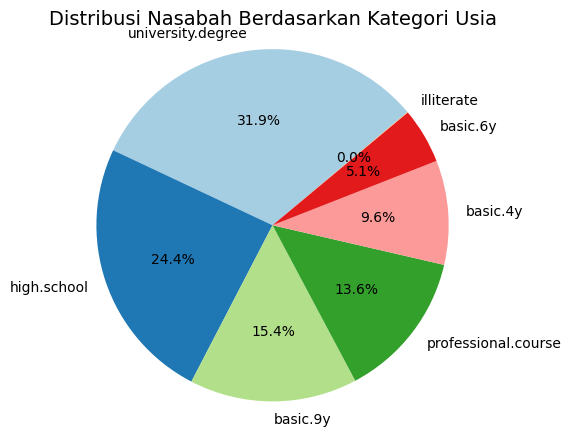

In [ ]:
edu_counts = df_EDA['education'].value_counts()
plot_pie_chart(edu_counts, title="Distribusi Nasabah Berdasarkan Kategori Usia")

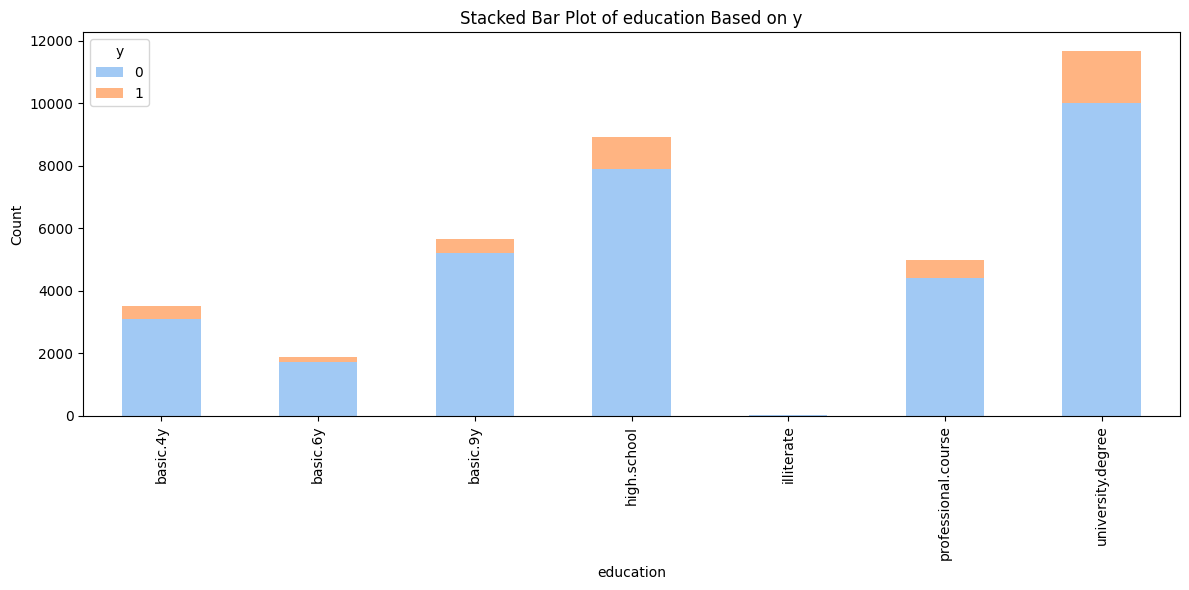

In [ ]:
plot_stacked_barplot(df_EDA, 'education', 'y')

In [ ]:
edu_subs_rates = calculate_subscription_rates(df_EDA, 'education', 'y')
edu_subs_rates

y            education      0     1  total  CR(%class)  PR(%n)  \
6    university.degree  10023  1667  11690       14.26    4.55   
3          high.school   7886  1052   8938       11.77    2.87   
5  professional.course   4399   587   4986       11.77    1.60   
2             basic.9y   5197   449   5646        7.95    1.22   
0             basic.4y   3086   420   3506       11.98    1.15   
1             basic.6y   1718   158   1876        8.42    0.43   
4           illiterate     12     4     16       25.00    0.01   

y  not subscribe(%n)  
6              27.34  
3              21.51  
5              12.00  
2              14.18  
0               8.42  
1               4.69  
4               0.03

**Kesimpulan**

- **University Degree (CR 14.26%)**
  - Dari 11,690 nasabah dengan jenjang pendidikan terakhir perguruan tinggi, sebanyak 1,667 (14.26%) menerima tawaran deposito. Kelompok ini memberikan kontribusi terbesar terhadap total pelanggan yang berlangganan deposito, yaitu 4.55%.
  - Pendidikan tinggi biasanya berkorelasi dengan pekerjaan bergaji lebih baik, sehingga kelompok ini memiliki daya beli yang lebih besar untuk berinvestasi dalam deposito .
  - Nasabah dengan pendidikan tinggi cenderung memiliki pengetahuan lebih baik tentang pengelolaan keuangan dan pentingnya diversifikasi investasi . Mereka lebih mungkin untuk memahami keuntungan deposito karena akses yang lebih baik ke sumber informasi dan literasi keuangan. [The collage](https://cew.georgetown.edu/cew-reports/the-college-payoff/)
- **High School (CR 11.77%)**
  - Dari 8,938 nasabah dengan pendidikan terakhir SMA, 1,052 (11.77%) menerima tawaran deposito. Kelompok ini menyumbang 2.87% dari total penerimaan deposito.
  - Kelompok ini umumnya memiliki pekerjaan dengan pendapatan menengah, sehingga ada potensi alokasi dana untuk tabungan seperti deposito.
  - Deposito dianggap sebagai instrumen yang aman, yang menarik bagi nasabah yang ingin menghindari risiko tinggi tetapi tetap menabung .

- **Professional Course (CR 11.77%)**
  - Dari 4,986 nasabah yang mengikuti kursus profesional, 587 (11.77%) menerima tawaran deposito. Kontribusi kelompok ini adalah 1.60% terhadap total penerimaan.
  - Banyak lulusan kursus profesional bekerja di sektor teknis atau administrasi dengan penghasilan stabil, memungkinkan mereka menyisihkan dana untuk deposito . Kelompok ini cenderung mencari investasi yang tidak membutuhkan manajemen aktif, seperti deposito berjangka.

- **Basic 9y (CR 7.95%)**
  - Dari 5,646 nasabah dengan pendidikan dasar 9 tahun, sebanyak 449 (7.95%) menerima tawaran deposito. Kontribusi kelompok ini adalah 1.22%.
  - Pendidikan dasar sering kali dikaitkan dengan pekerjaan dengan pendapatan lebih rendah, membatasi kemampuan mereka untuk berinvestasi dalam deposito.
Kurangnya pengetahuan tentang produk keuangan juga dapat menghambat mereka untuk memanfaatkan deposito .

- **Basic 4y (11.98%)**
  - Dari 3,506 nasabah dengan pendidikan dasar 4 tahun, sebanyak 420 (11.98%) menerima tawaran deposito. Kontribusi kelompok ini terhadap keseluruhan nasabah yang menerima tawaran deposito adalah 1.15%.
  - Meski tingkat keberhasilan cukup baik, kelompok ini lebih mungkin menggunakan dana untuk kebutuhan pokok daripada untuk investasi.
  - Karena deposito lebih sederhana dibandingkan investasi lain, kelompok ini mungkin memilihnya sebagai satu-satunya opsi tabungan formal.

- **Basic 6y (CR 8.42%)**
  - Dari 1,876 nasabah dengan pendidikan dasar 6 tahun, sebanyak 158 (8.42%) menerima tawaran deposito. Kontribusi mereka adalah 0.43% terhadap proporsi keseluruhan.
  - Pendidikan terbatas sering kali menghasilkan pekerjaan dengan gaji rendah, membatasi jumlah dana yang dapat diinvestasikan .
  - Rendahnya literasi keuangan mengakibatkan ketidakpahaman akan manfaat deposito dibandingkan menyimpan uang secara konvensional.

- **Illiterate (CR 25.00%)**
  - Dari 16 nasabah yang tidak memiliki pendidikan formal, sebanyak 4 (25.00%) menerima tawaran deposito. Pada dataset kali ini, nasabah tanpa pendidikan formal lebih mungkin memilih deposito karena kesederhanaan dan keamanannya. Nilai CR tinggi pada kelompok ini dapat disebabkan oleh ukuran sampel yang sangat kecil.
<br><br>

Pengaruh pendidikan terhadap perilaku penerimaan tawaran deposito dapat anda lihat lebih lanjut pada penelitian berikut: [analisis faktor-faktor yang mempengaruhi preferensi deposito Masyarakat](https://jimfeb.ub.ac.id/index.php/jimfeb/article/view/3038/2721)

Sebagai segmen utama yang ingin disasar, akan dilihat bagaimana kondisi tingkat pendidikan dari nasabah yang berada di kategori usia *adult*

In [ ]:
adult_edu = calculate_subscription_rates(df_EDA[df_EDA['age_class']=='adult'], 'education', 'y')
adult_edu.sort_values(by='total', ascending=False)

y            education     0    1  total  CR(%class)  PR(%n)  \
6    university.degree  5570  807   6377       12.65    4.30   
3          high.school  4129  420   4549        9.23    2.24   
2             basic.9y  2657  187   2844        6.58    1.00   
5  professional.course  2453  273   2726       10.01    1.45   
0             basic.4y  1112   59   1171        5.04    0.31   
1             basic.6y  1031   83   1114        7.45    0.44   
4           illiterate     4    2      6       33.33    0.01   

y  not subscribe(%n)  
6              29.65  
3              21.98  
2              14.14  
5              13.06  
0               5.92  
1               5.49  
4               0.02

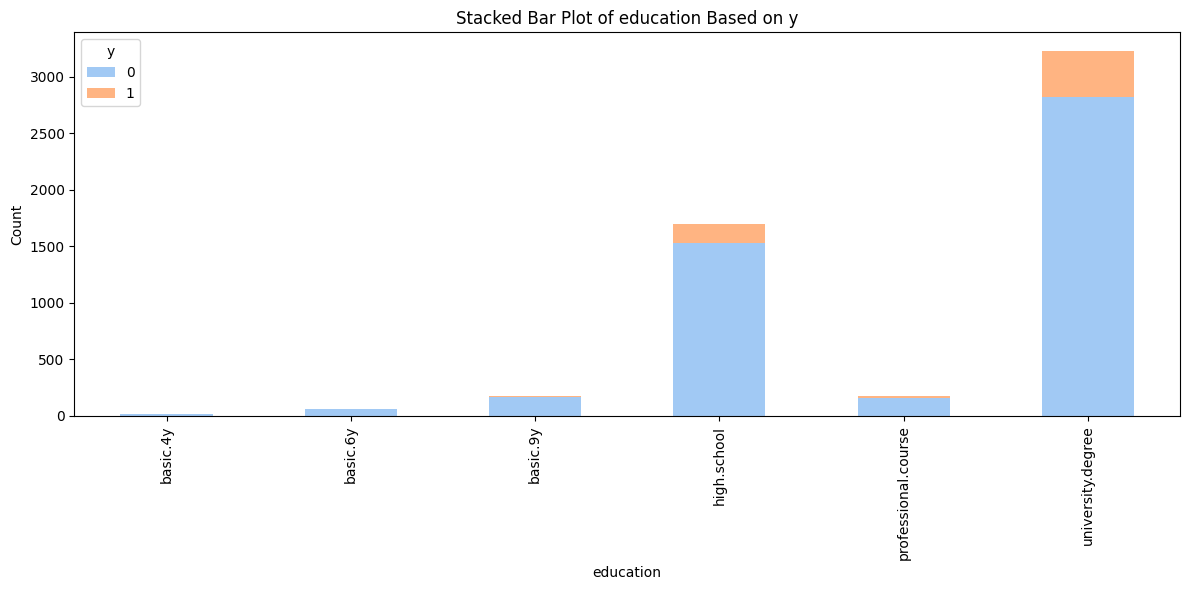

In [ ]:
plot_stacked_barplot(df_EDA[(df_EDA['age_class']=='adult')&(df_EDA['job']=='admin.')], 'education', 'y')

In [ ]:
adult_edu_job1= calculate_subscription_rates(df_EDA[(df_EDA['age_class']=='adult')&(df_EDA['job']=='admin.')], 'education', 'y')
adult_edu_job1.sort_values(by='total', ascending=False)

y            education       0      1   total  CR(%class)  PR(%n)  \
5    university.degree  2823.0  408.0  3231.0       12.63    7.62   
3          high.school  1531.0  165.0  1696.0        9.73    3.08   
4  professional.course   156.0   22.0   178.0       12.36    0.41   
2             basic.9y   163.0   12.0   175.0        6.86    0.22   
1             basic.6y    60.0    2.0    62.0        3.23    0.04   
0             basic.4y    15.0    NaN     NaN         NaN     NaN   

y  not subscribe(%n)  
5              52.70  
3              28.58  
4               2.91  
2               3.04  
1               1.12  
0               0.28

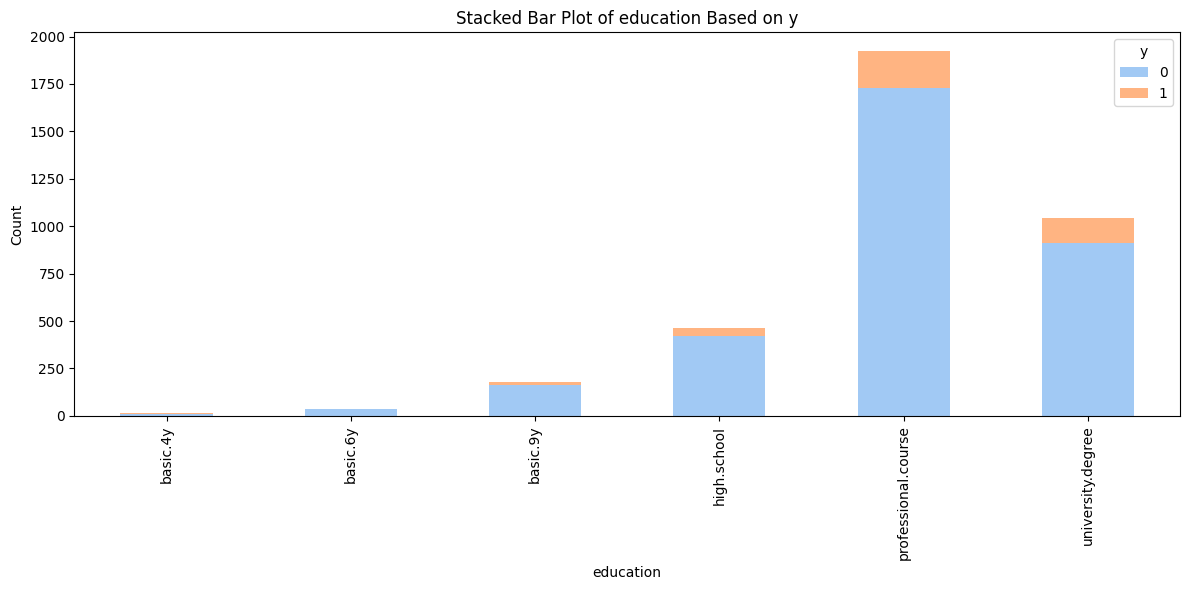

In [ ]:
plot_stacked_barplot(df_EDA[(df_EDA['age_class']=='adult')&(df_EDA['job']=='technician')], 'education', 'y')

In [ ]:
adult_edu_job2 = calculate_subscription_rates(df_EDA[(df_EDA['age_class']=='adult')&(df_EDA['job']=='technician')], 'education', 'y')
adult_edu_job2.sort_values(by='total', ascending=False)

y            education     0    1  total  CR(%class)  PR(%n)  \
4  professional.course  1730  196   1926       10.18    5.35   
5    university.degree   912  130   1042       12.48    3.55   
3          high.school   423   42    465        9.03    1.15   
2             basic.9y   164   14    178        7.87    0.38   
1             basic.6y    34    1     35        2.86    0.03   
0             basic.4y    11    4     15       26.67    0.11   

y  not subscribe(%n)  
4              47.25  
5              24.91  
3              11.55  
2               4.48  
1               0.93  
0               0.30

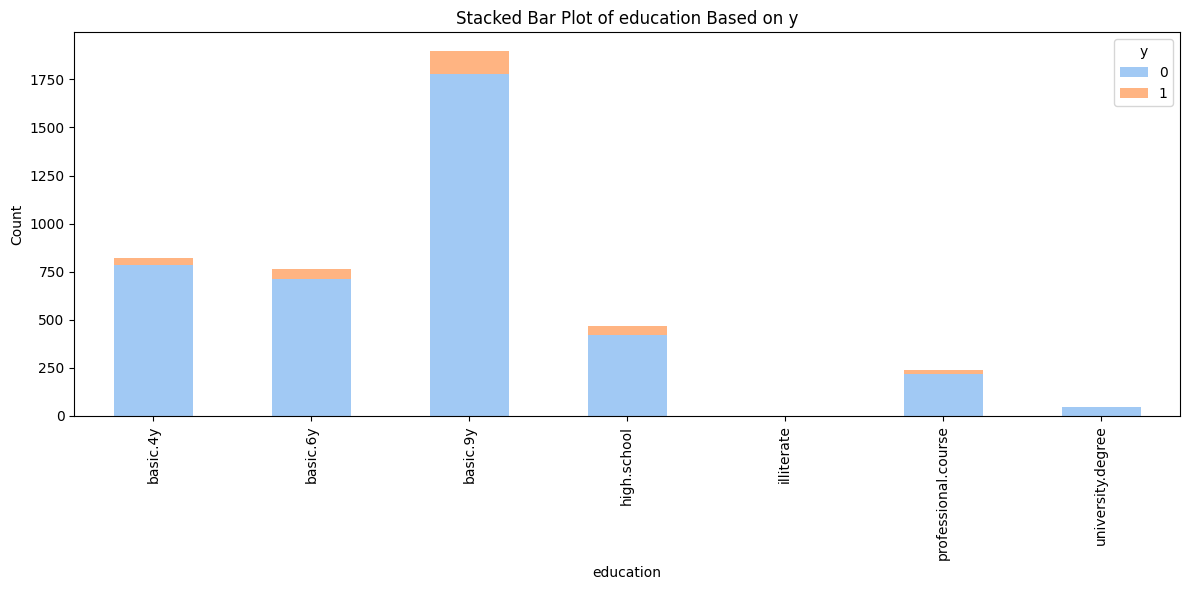

In [ ]:
plot_stacked_barplot(df_EDA[(df_EDA['age_class']=='adult')&(df_EDA['job']=='blue-collar')], 'education', 'y')

In [ ]:
adult_edu_job3= calculate_subscription_rates(df_EDA[(df_EDA['age_class']=='adult')&(df_EDA['job']=='blue-collar')], 'education', 'y')
adult_edu_job3.sort_values(by='total', ascending=False)

y            education       0      1   total  CR(%class)  PR(%n)  \
2             basic.9y  1777.0  123.0  1900.0        6.47    2.90   
0             basic.4y   783.0   40.0   823.0        4.86    0.94   
1             basic.6y   711.0   52.0   763.0        6.82    1.23   
3          high.school   419.0   47.0   466.0       10.09    1.11   
5  professional.course   219.0   19.0   238.0        7.98    0.45   
6    university.degree    45.0    3.0    48.0        6.25    0.07   
4           illiterate     1.0    NaN     NaN         NaN     NaN   

y  not subscribe(%n)  
2              41.92  
0              18.47  
1              16.77  
3               9.88  
5               5.17  
6               1.06  
4               0.02

**insight**<br>
Berdasarkan data pendidikan untuk kategori usia adult dengan profesi admin, technician, dan blue-collar, terdapat pola menarik yang dapat memberikan wawasan penting untuk strategi kampanye:

- **Admin**<br>
  - Dari 9744 nasabah dengan profesi sebagai **admin**, proporsi sebanyak 33.15% nasabah memiliki jenjang pendidikan **university degree** (dengan 408 dari 3231 nasabah (CR 12.63%) menerima tawaran yang diberikan), diikuti oleh **high school** sebanyak 17.4% dan memiliki CR 9.73%, dengan kontribusi 3.8% secara keseluruhan.
  - Hal ini mencerminkan bahwa profesi admin sering kali membutuhkan tingkat pendidikan formal yang tinggi, seperti gelar universitas, karena pekerjaan ini sering berhubungan dengan administrasi, pengelolaan data, dan tanggung jawab lainnya yang membutuhkan keahlian teknis dan kemampuan analitis. Sebuah studi oleh [Bureau of Labor Statistics](https://www.bls.gov/ooh/office-and-administrative-support/secretaries-and-administrative-assistants.htm) menyebutkan bahwa profesi administrasi lebih sering diisi oleh individu dengan gelar sarjana karena tuntutan pekerjaan yang membutuhkan keterampilan pemecahan masalah dan manajemen tugasechnician**

- **technician**<br>
  - Dari 6193 nasabah berprofesi sebagai teknisi, 31% nasabah berasal dari jenjang pendidikan **professional course** dengan CR 10.18% yang dan merupakan penyumpang proporsi tertinggi 5.35% terhadap data keseluruhan. Diikuti oleh **university degree** dengan CR 12.48%.
  - Tingginya persentase dari pendidikan professional course mencerminkan bahwa profesi teknisi sangat dipengaruhi oleh pelatihan kejuruan dan sertifikasi teknis yang relevan, yang lebih aplikatif dibandingkan pendidikan formal akademis. Menurut laporan oleh World Economic Forum, tenaga teknis sering kali lebih mengandalkan pelatihan praktis berbasis keterampilan daripada gelar akademik tradisional. [most demanded skills](https://www.weforum.org/stories/2023/05/future-of-jobs-2023-skills/)

- **Blue Collar**<br>
  - Dari total nasabah 7871 orang dengan profesi **blue-collar**, 24% nasabah berasal dari jenjang pendidikan **basic.9y**. Nasabah pada kelompok ini memiliki CR sebesat 6.47%, dan dengan menyumbangkan proporsi 2.90% terhadap keseluruhan data. Diikuti oleh jenjang pendidikan **basic.4y** dengan CR 4.86%.
  - Pendidikan yang lebih rendah dalam kelompok ini mencerminkan karakteristik pekerjaan blue-collar yang umumnya membutuhkan keterampilan teknis sederhana atau manual, di mana pengalaman kerja lebih dihargai daripada pendidikan formal. Menurut sebuah artikel oleh ILO (International Labour Organization), pekerjaan blue-collar di negara berkembang sering diisi oleh individu dengan tingkat pendidikan menengah atau lebih rendah karena kebutuhan pasar tenaga kerja yang spesifik.

#### **Kesimpulan Pengaruh Demografi Terhadap Hasil Kampanye**

Dari hasil analisis demografi, segmen nasabah yang menjadi target utama dalam penyesuaian kampanye adalah sebagai berikut:<br>

**1. Berdasarkan Kategori Usia**
  - Dari total nasabah 36,658 orang, terdapat sejumlah **18,878 nasabah (51.2%)yang merupakan rate tertinggi berada pada kategori usia *adult***, diikuti oleh *Middle-Age* sejumlah 6,750 nasabah (27%), serta 6,750 nasabah (18.4%) pada kategori usia *young adult*.
  - **Ketiga kategori usia tersebut memang memiliki proportion rate terbesar**, yakni 4.99% untuk *adult*, 2.68% untuk *middle age*, dan 2.79% untuk *young adult*. Hal ini adalah wajar mengingat jumlah nasabah dari masing-masing kategori usia tersebut dominan (merupakan 3 ketogori dengan jumlah nasabah terbanyak).
  - Namun, jika dilihat dari conversion rate, Kategori usia yang memiliki **CR tertinggi adalah *elderly* dan *teenage* yakni 40.76% dan 40%**. Hal ini mungkin terjadi mengingat campaign yang dilakukan sebelumnya adalah telemarketing, dan umumnya nasabah pada kategori usia tersebut memiliki lebih banyak waktu luang dibandingkan dengan kategori usia lainya.
  - Nasabah dengan kategori usia ***Adult* hanya memiliki CR 9.75%, yang merupakan nilai CR terendah dibanding kategori lainya**. Hal ini berartinya masih terdapat 90.25% peluang dalam akuisisi nasabah di kalangan ini. Dengan jumlah nasabah terbesar dan gap conversion rate yang masih sangat jauh, penyusunan strategi kampanye kali ini akan difokuskan  pada nasabah dengan kategori usia *adult* sebagai target utama dalam program peningkatan efektifitas kampanye.

**2. Berdasarkan Profesi Pekerjaan**
  - Dari total nasabah 36,658 orang, terdapat sejumlah 9,744 (26,6%) yang merupakan rate tertinggi memiliki profesi pekerjaan sebagai *admin*. Diikuti oleh 7,871 nasabah (21.5%) berprofesi sebagai *blue-collar*, dan 6,193 nasabah (16.9%) berprofesi sebagai *technician*.
  - Secara keseluruhan profesi diatas menyumbangkan proporsi (PR) terbesar dalam kampanye kali ini, yakni 3.55% untuk *admin*, 1.55% untuk *technician*, dan 1.52% untuk *blue-collar*. Hal ini sangat mungkin terjadi mengingat proporsi nasabah dengan profesi tersebut adalah 3 profesi dengan jumlah nasabah terbanyak.
  - CR tertinggi dipegang oleh *student* sebesar 32.52% dan *retired* sebesar 27.35%. Hal ini selaras dengan CR berdasarkan usia, dimana nasabah *elderly* dan *teenage* juga memiliki CR tertinggi dibanding kategori lainya.
  - Namun, profesi *admin*, *technician* dan *blue-collar* memiliki CR moderat yang mengindikasi bahwa sebetulnya ada ketertarikan dan cukup kesesuaian kampanye terhadap nasabah profesi tersebut daripada profesi lainya. Selain itu, masih terdapat banyak potensi pengembangan strategi kampanye guna mendapatkan hasil kampanye yang lebih optimal pada ketiga profesi tersebut.
  - Jika dilihat dari target utama berdasarkan kategori usia, *adult*, profesi dengan jumlah nasabah tertinggi juga dipegang oleh *admin*, *technician* dan *blue collar*.
  - Dengan demikian penyusunan strategi ini akan disesuaikan dengan kebutuhan dan karakteristik nasabah dengan profesi *admin*, *technician* dan *blue collar*.

**3. berdasarkan Status Pernikahan**
  - Dari total 36,658 nasabah, kelompok dengan status married memiliki jumlah nasabah terbesar, yaitu 21,777 orang (59.4%). Kelompok ini menyumbangkan proporsi terbesar terhadap total kampanye, yaitu 6.38%, meskipun tingkat konversi (CR) mereka berada di angka 10.75%. Selanjutnya, kelompok single mencakup 10,724 orang (29.3%), dengan CR sebesar 14.43%, yang merupakan nilai tertinggi dibandingkan kelompok lainnya. Sementara itu, kelompok divorced memiliki jumlah nasabah terkecil, yaitu 4,157 orang (11.3%), dengan CR sebesar 10.83% dan PR 1.23%
  - Dari total 18,787 nasabah *adult*, kelompok married tetap mendominasi dengan 11,413 orang (60.8%) tetapi memiliki CR yang lebih rendah dibandingkan rata-rata keseluruhan, yakni 8.95%. Kelompok single mencakup 5,406 orang (28.8%) dengan CR sebesar 11.56%, yang tetap menjadi angka tertinggi di antara kategori ini. Kelompok divorced berjumlah 1,968 orang (10.5%), dengan CR sebesar 9.35%.

**4. berdasarkan Jenjang pendidikan**
  - Sebanyak 11,690 nasabah (31.9%) dari total 36,658 memiliki pendidikan terakhir *university degree*. Ini yang merupakan populasi terbesar berdasarkan pendidikan terakhir. Dari 11,690 nasabah tersebut, 14.26% nenerima tawaran deposito. Segmen ini menyumbang kontribusi proporsi terbesar terhadap keseluruhan kampanye, yaitu 4.55%. Diikuti oleh nasabah dengan pendidikan terakhir *high school* CR 11,77%, dan PR 2,87% dari total kontribusi kampanye, dan untuk profesional course terdapat 587 orang dari Dari 4.986 nasabah (11,77%) menerima deposito. Kelompok ini menyumbang 1,60% terhadap total kampanye.
  - PR tertinggi dipegang oleh nasabah *illaterate*. Dari 16 nasabah yang tidak memiliki pendidikan formal, 4 orang menerima deposito (25,00%). Meskipun jumlah ini kecil, CR yang tinggi mungkin karena kebutuhan keamanan finansial yang sederhana dan rasa percaya pada rekomendasi bank. Namun karena jumlah nasabah yang sangat sedikit, nasabah pada kategori ini tidak memberikan kontribusi yang besar terhadap kampanye secara keseluruhan.
  - Untuk target utama, kategori usia *Adult*, nasabah yang paling berpotensi untuk diprospek adalah nasabah dengan pendidikan terakhir *university degree*, *profesional course*, *high school* dan *basic 9.years*. Hal ini dipertimbangkan berdasarkan pendidikan paling dominan bagi nasabah dengan kalangan usia *adult*

### **Bagaimana Hubungan Frekuensi Kontak, Durasi dan Hasil Kampanye**

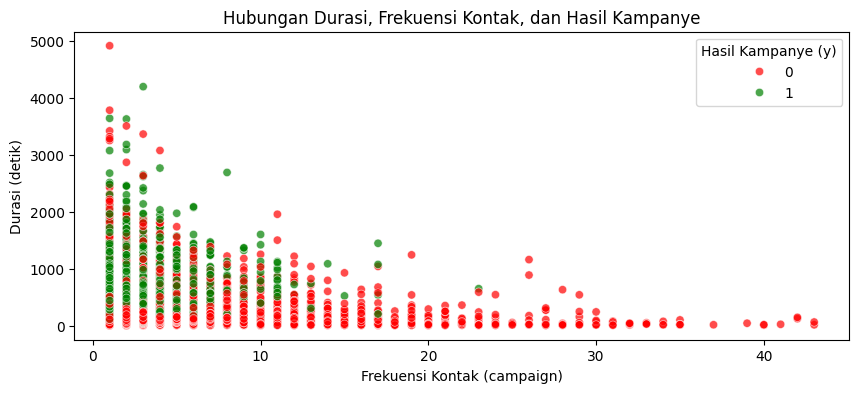

In [ ]:
plt.figure(figsize=(10, 4))
sns.scatterplot(
    data=df_EDA,
    x='campaign',
    y='duration',
    hue='y',
    alpha=0.7,
    palette={1: 'green', 0: 'red'}
)
plt.title('Hubungan Durasi, Frekuensi Kontak, dan Hasil Kampanye')
plt.xlabel('Frekuensi Kontak (campaign)')
plt.ylabel('Durasi (detik)')
plt.legend(title='Hasil Kampanye (y)')
plt.show()

Dari grafik diatas, didapatkan informasi bahwa:
- Semakin lama durasi kontak, peluang keberhasilan kampanye cenderung meningkat, seperti yang ditunjukkan oleh konsentrasi titik hijau (y = 1) di area durasi tinggi, dan sebagian besar keberhasilan kampanye terkonsentrasi pada frekuensi rendah hingga menengah (1-10 kontak), sedangkan frekuensi tinggi (di atas 10) justru didominasi oleh titik merah/ kegagalan kampanye.
- hal ini sejalan dengan analisis **korelasi point biserial** yang sebelumnya telah dilakukan, yakni:
  - Nilai point biserial antara durasi kontak (*duration*) dan hasil kampanye sebesar 0.4053, yang menunjukkan korelasi positif sedang. Hal ini mengindikasikan bahwa durasi kontak yang lebih panjang memiliki hubungan yang signifikan dengan keberhasilan kampanye.
  - Nilai point biserial antara frekuensi kampanye (*campaign*) dan hasil kampanye sebesar -0.066, yang menunjukkan korelasi negatif lemah. Artinya, peningkatan jumlah kontak tidak memiliki hubungan yang signifikan dengan keberhasilan, bahkan cenderung berpotensi menurunkan efektivitas kampanye.
- Berdasarkan 2 hal tersebut dapat dikatakan bahwa kontak yang terlalu sering berpotensi kegagalan dan membuat nasabah merasa terganggu atau kampanye terlihat terlalu memaksa.
- Dapat disimpulkan juga bahwa terdapat kecenderungan nasabah yang lebih tertarik dengan jumlah panggilan yang lebih sedikit namun dengan durasi yang cukup untuk menjelaskan kampanye secara padat dan jelas, dan pola banyak dari nasabah akhirnya memutuskan untuk menerima tawaran deposito.

#### **Campaign - Frekuensi Paling Efektif Dalam Kampanye**

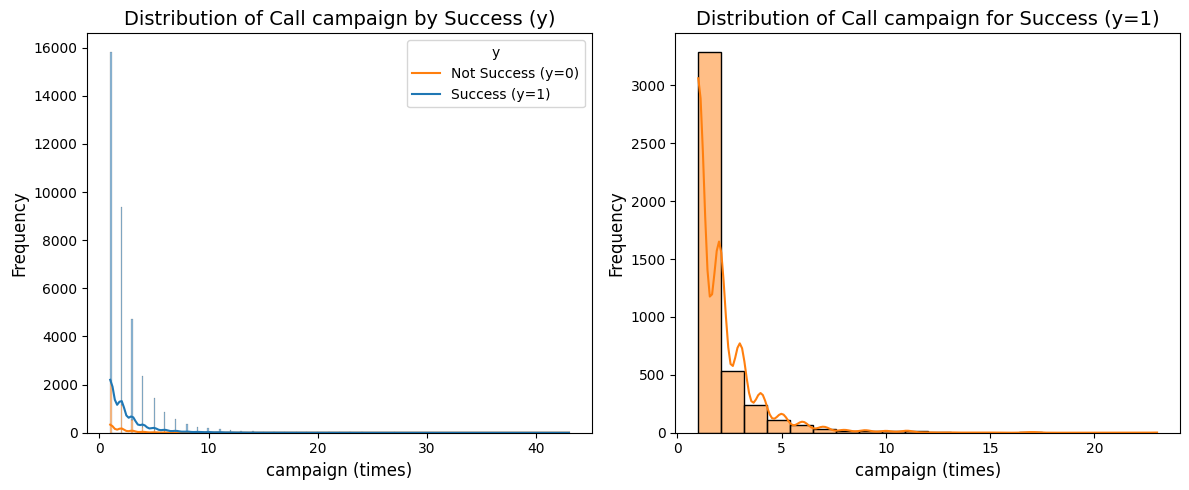

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df_EDA, x='campaign', hue='y', multiple='stack', kde=True, ax=ax[0])
ax[0].set_title('Distribution of Call campaign by Success (y)', fontsize=14)
ax[0].set_xlabel('campaign (times)', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].legend(title='y', labels=['Not Success (y=0)', 'Success (y=1)'])

palette = sns.color_palette()
success_color = palette[1]

yes_filtered = df_EDA[df_EDA['y'] == 1]

sns.histplot(yes_filtered['campaign'], bins=20, kde=True, color=success_color, ax=ax[1])
ax[1].set_title('Distribution of Call campaign for Success (y=1)', fontsize=14)
ax[1].set_xlabel('campaign (times)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

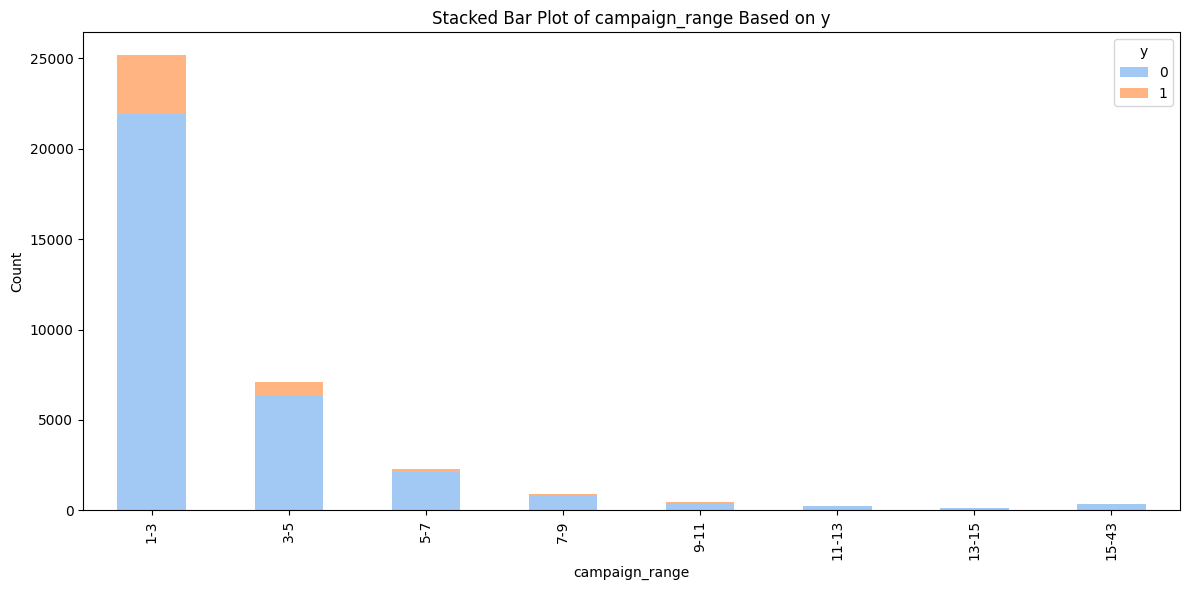

In [ ]:
plot_stacked_barplot(df_EDA, 'campaign_range', 'y')

In [ ]:
campaign_subs_rate = calculate_subscription_rates(df_EDA, 'campaign_range', 'y')
campaign_subs_rate.sort_values(by='total', ascending=False)

y campaign_range      0     1  total  CR(%class)  PR(%n)  not subscribe(%n)
0            1-3  21901  3285  25186       13.04    8.96              59.74
1            3-5   6343   771   7114       10.84    2.10              17.30
2            5-7   2097   179   2276        7.86    0.49               5.72
3            7-9    854    53    907        5.84    0.14               2.33
4           9-11    417    26    443        5.87    0.07               1.14
7          15-43    333     6    339        1.77    0.02               0.91
5          11-13    245    14    259        5.41    0.04               0.67
6          13-15    129     3    132        2.27    0.01               0.35

**Kesimpulan**<br>
Hasil analisis data diatas menunjukkan bahwa kampanye dengan frekuensi kontak yang rendah memiliki peluang sukses lebih besar dibandingkan dengan kampanye yang dilakukan secara berulang dalam jumlah tinggi. Penurunan efektivitas kampanye terlihat pada metrik *Conversion Rate* (CR) dan *Participation Rate* (PR) yang terus menurun seiring bertambahnya frekuensi kontak, sebagaimana dikonfirmasi oleh nilai *Point Biserial* negatif (-0.066). Berikut penjelasan lebih rinci:
1. **Rentang Kontak Optimal**  
   Kampanye dengan **1-3 kontak terbukti paling efektif**, menghasilkan CR sebesar 13,04%, yang merupakan nilai tertinggi di antara rentang lainnya. Selain itu, PR juga mencapai 8,96%, menunjukkan kontribusi signifikan terhadap keberhasilan kampanye.
2. **Penurunan Efektivitas pada Kontak Lebih Tinggi**  
   **Setelah 3 kontak, efektivitas kampanye terus menurun**. Pada rentang 3-5 kontak, CR hanya sebesar 10,84%, sedangkan PR turun ke 2,10%. Kampanye dengan lebih dari 9 kontak menunjukkan hasil yang semakin tidak efisien, dengan CR yang tidak cukup signifikan.
3. **Penolakan yang Proporsional**  
   Meskipun rentang 1-3 kontak mencatat kontribusi terbesar terhadap nasabah yang tidak berlangganan (59,74%), hal ini masih proporsional karena jumlah kampanye dalam rentang ini jauh lebih besar dibandingkan lainnya.
4. **Pentingnya Efisiensi**  
   Rentang kontak yang lebih tinggi (>9) tidak hanya memberikan CR yang rendah, tetapi juga meningkatkan risiko gangguan kepada nasabah. Oleh karena itu, fokus pada kontak yang efisien dapat memberikan hasil yang lebih optimal.

**Insight:**
- Untuk optimalisasi kampanye, akan di fokuskan frekuensi kontak kampanye pada range 1-3, karena memberikan hasil terbaik dalam hal tingkat konversi dan kontribusi terhadap total pelanggan. akan ditingkatkan kualitas interaksi pada kontak awal (1-3 kali), misalnya dengan materi promosi yang lebih menarik atau penawaran yang lebih relevan.
- Hal ini tentunya harus diselaraskan dengan durasi kontak yang sesuai guna mendapatkan hasil yang optimal.

#### **Duration - Durasi Kontak Paling Efektif Dalam Kampanye**

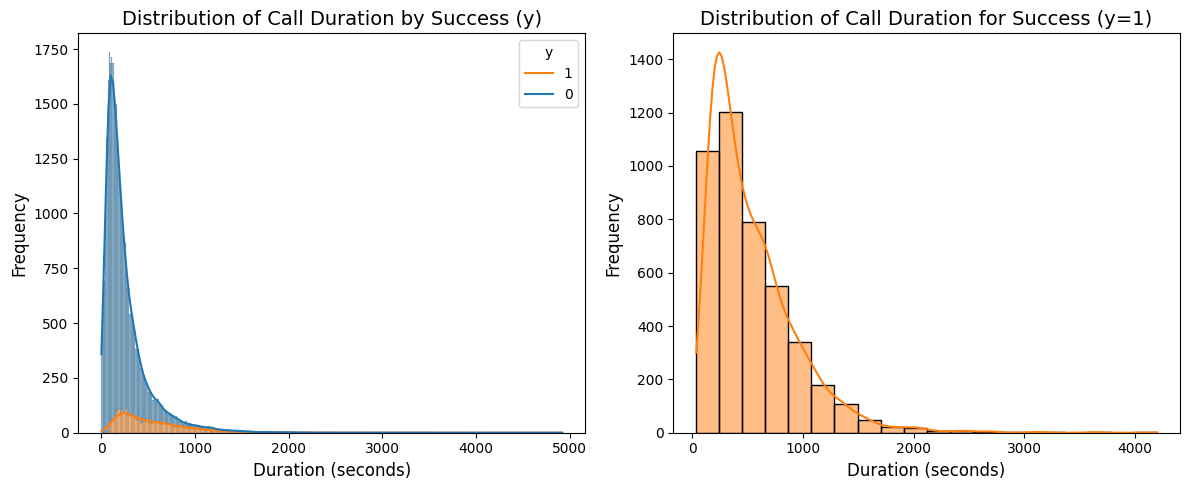

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df_EDA, x='duration', hue='y', multiple='stack', kde=True, ax=ax[0])
ax[0].set_title('Distribution of Call Duration by Success (y)', fontsize=14)
ax[0].set_xlabel('Duration (seconds)', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].legend(title='y', labels=['1', '0'])

palette = sns.color_palette()
success_color = palette[1]
yes_filtered = df_EDA[df_EDA['y'] == 1]

sns.histplot(yes_filtered['duration'], bins=20, kde=True, color=success_color, ax=ax[1])
ax[1].set_title('Distribution of Call Duration for Success (y=1)', fontsize=14)
ax[1].set_xlabel('Duration (seconds)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

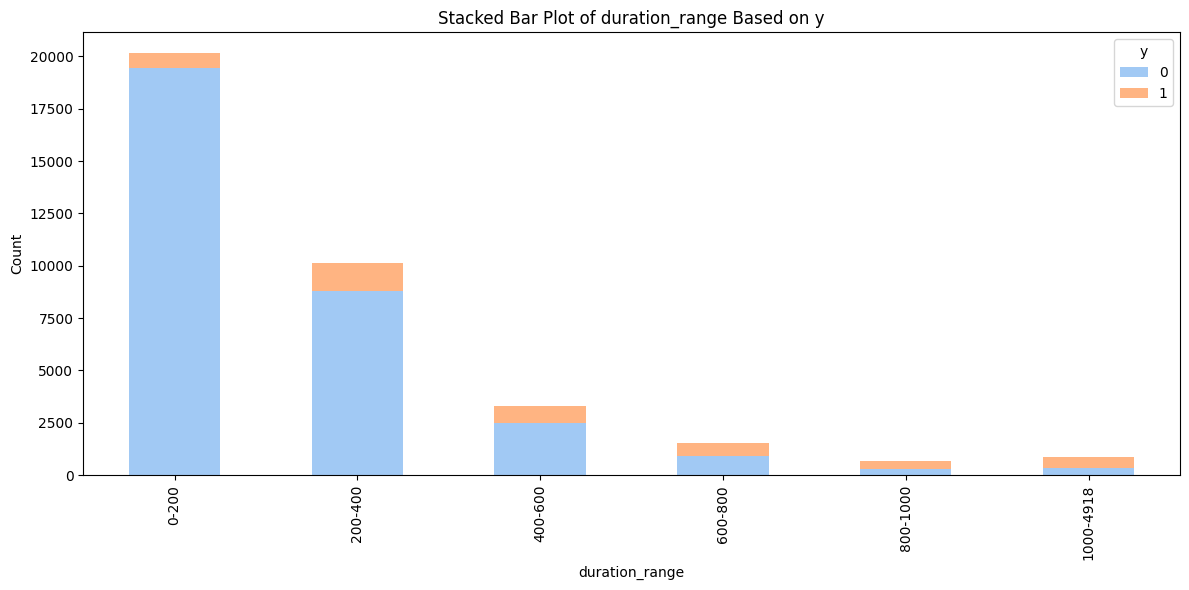

In [ ]:
plot_stacked_barplot(df_EDA, 'duration_range', 'y')

In [ ]:
dur_subs_rates = calculate_subscription_rates(df_EDA, 'duration_range', 'y')
dur_subs_rates.sort_values(by='duration_range')

y duration_range      0     1  total  CR(%class)  PR(%n)  not subscribe(%n)
0          0-200  19454   683  20137        3.39    1.86              53.07
1        200-400   8805  1337  10142       13.18    3.65              24.02
2        400-600   2499   805   3304       24.36    2.20               6.82
3        600-800    902   621   1523       40.77    1.69               2.46
4       800-1000    315   383    698       54.87    1.04               0.86
5      1000-4918    345   508    853       59.55    1.39               0.94

**Kesimpulan**<br>
Berdasarkan data *duration_range* yang dianalisis, terdapat hubungan yang sangat kuat antara durasi percakapan dalam kampanye dengan tingkat keberhasilan kampanye. **Peningkatan keberhasilan ini dapat dilihat dari nilai CR yang terus meningkat seiring bertambahnya durasi kontak**, sebagaimana dikonfirmasi oleh nilai point biserial positif 0.4053. Secara keseluruhan, semakin lama durasi percakapan, semakin tinggi peluang konversi kampanye. Berikut adalah rincian analisisnya:
1. **Efektivitas Berdasarkan Rentang Durasi**  
   - Kampanye dengan durasi singkat (**0-200 detik**) memiliki tingkat keberhasilan yang sangat rendah, dengan CR hanya sebesar **3,39%**. Rentang ini menyumbang **53,07%** dari total nasabah yang tidak berlangganan, menunjukkan bahwa percakapan singkat cenderung tidak efektif.
   - Pada durasi sedang (**200-400 detik**), tingkat keberhasilan meningkat signifikan dengan CR mencapai **13,18%**, menunjukkan hasil yang lebih positif dibandingkan rentang sebelumnya. Nilai CR terus meningkat hingga rentang durasi **1000-4918 detik** yang menunjukkan CR tertinggi secara keseluruhan, yaitu **59,55%**.
   - Hal ini menunjukkan bahwa durasi percakapan yang lebih panjang memungkinkan penyampaian informasi yang lebih mendalam dan efektif, sehingga meningkatkan kemungkinan nasabah untuk berlangganan.

2. **Distribusi Nasabah yang Tidak Berlangganan**  
   Sebagian besar penolakan terjadi pada durasi singkat (**0-200 detik**), yang menyumbang lebih dari separuh (53,07%) nasabah yang tidak berlangganan. Sebaliknya, rentang durasi yang lebih panjang menyumbang proporsi penolakan yang jauh lebih kecil, seperti hanya **0,94%** pada rentang **1000-4918 detik**.

Analisis Data diatas menunjukkan bahwa **durasi percakapan adalah faktor kunci dalam keberhasilan kampanye**. **Durasi yang lebih panjang memberikan peluang yang jauh lebih besar untuk menghasilkan konversi**. Oleh karena itu, kampanye yang efektif perlu mengupayakan percakapan yang lebih panjang untuk memastikan informasi dapat tersampaikan dengan baik kepada nasabah dengan tetap mempertimbangkan potensi kesuksesan dan efisiensi kampanye.

**Insight**<br>
Durasi kontak ini mencerminkan momen penting saat penjelasan mengenai program kampanye berlangsung. Pengoptimalan panggilan akan difokuskan pada rentang **800-1000 detik** pertama. Apabila nasabah menunjukkan minat yang signifikan dan berpotensi besar untuk berlangganan, durasi panggilan dapat diperpanjang hingga lebih dari **1000 detik**, mengingat data sebelumnya menunjukkan bahwa tingkat keberhasilan kampanye meningkat pada durasi tersebut. Sebaliknya, jika respons nasabah dalam rentang tersebut kurang positif, maka panggilan akan diakhiri pada durasi maksimal **1000 detik** guna mengelola sumber daya secara efisien.

#### **Kesimpulan Hubungan Frekuensi dan Durasi Kontak Terhadap Hasil Kampanye**

- Hasil analisis menunjukkan bahwa durasi percakapan dan frekuensi kontak memainkan peran penting dalam keberhasilan kampanye. **Durasi percakapan yang lebih panjang cenderung meningkatkan peluang keberhasilan**, sebagaimana ditunjukkan oleh Conversion Rate (CR) yang terus meningkat seiring bertambahnya durasi, dengan puncaknya pada rentang 1000-4918 detik (CR: 59,55%). Hal ini mengindikasikan bahwa percakapan yang lebih mendalam memungkinkan penyampaian informasi yang lebih efektif kepada nasabah.
- Sebaliknya, **frekuensi kontak yang terlalu tinggi justru menunjukkan penurunan efektivitas**. Kampanye dengan frekuensi 1-3 kontak memiliki CR tertinggi sebesar 13,04%, namun efektivitasnya menurun drastis pada kontak lebih dari 9 kali, yang memberikan hasil tidak signifikan sekaligus meningkatkan risiko gangguan kepada nasabah.

Secara keseluruhan, strategi kampanye yang optimal adalah fokus pada percakapan berkualitas dengan durasi yang cukup panjang (maksimal 1000 detik, dapat tambah - conditionally) dengan frekuensi paling efektif berada pada rentang 1-3 agar tetap efisien. Pendekatan ini tidak hanya meningkatkan konversi tetapi juga meminimalkan potensi penolakan nasabah.

### **Bagaimana Efek dari Pengalaman Kampanye Sebelumnya?**

#### **Pdays - Pengaruh Jarak Hari Berlalu Sejak Kontak Terakhir Dari Kampanye Sebelumnya**

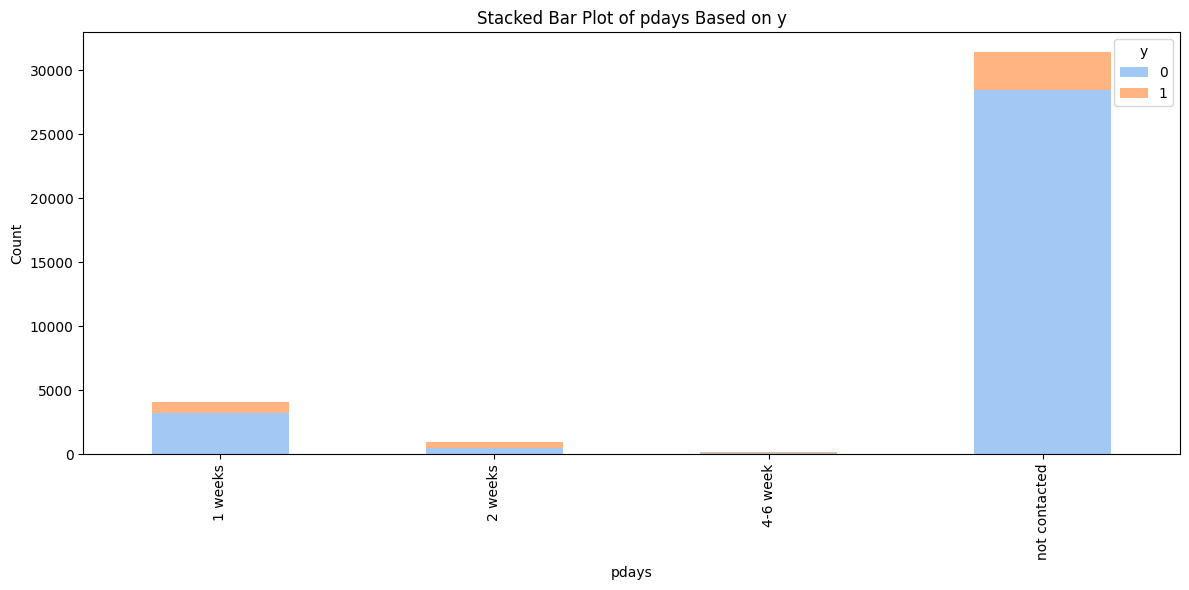

In [ ]:
plot_stacked_barplot(df_EDA, 'pdays', 'y')

In [ ]:
pdays_subs_rates = calculate_subscription_rates(df_EDA, 'pdays', 'y')
pdays_subs_rates

y          pdays      0     1  total  CR(%class)  PR(%n)  not subscribe(%n)
3  not contacted  28500  2912  31412        9.27    7.94              77.75
0        1 weeks   3250   853   4103       20.79    2.33               8.87
1        2 weeks    488   459    947       48.47    1.25               1.33
2       4-6 week     83   113    196       57.65    0.31               0.23

**Kesimpulan**  

Berdasarkan analisis data *pdays*, terdapat hubungan yang sangat kuat antara jarak waktu sejak nasabah terakhir dihubungi (atau tidak dihubungi sama sekali) dengan tingkat keberhasilan kampanye (CR). Berikut adalah temuan utamanya:  
1. **Efektivitas Berdasarkan Jarak Waktu**  
   - Nasabah yang tidak dihubungi sebelumnya memiliki tingkat keberhasilan kampanye rendah, dengan CR hanya sebesar **9.27%**, namun mencakup sebagian besar total kampanye (**77.75% nasabah tidak berlangganan**).  
   - Peluang konversi meningkat secara signifikan untuk nasabah yang dihubungi dalam waktu lebih singkat sejak kampanye sebelumnya:  
     - **1 minggu**: CR mencapai **20.79%**, menunjukkan hasil lebih baik dibandingkan nasabah yang tidak dihubungi.  
     - **2 minggu**: CR melonjak tajam hingga **48.47%**, menunjukkan efektivitas yang tinggi.  
     - **4 minggu - 6 minggu**: CR masing-masing mencapai **57.65%**, dengan tingkat keberhasilan yang sangat tinggi meskipun jumlah total kontak pada rentang ini kecil.
2. **Distribusi Nasabah Tidak Berlangganan**  
   Sebagian besar penolakan berasal dari kelompok nasabah yang tidak dihubungi sebelumnya (**77.75%**). Sebaliknya, rentang waktu yang lebih dekat dengan kampanye sebelumnya (khususnya **2 minggu ke atas**) menunjukkan tingkat penolakan yang sangat kecil. Meskipun kondisi ini dapat disebabkan oleh populasi nyang kecil, namun, dilihat dari CR yang terus meningkat seiring bertambahnya waktu tunggu, maka dapat dikatakan adanya penurunan tingkat penolakan oleh nasabah.

**Insight**  
Menghubungi nasabah dalam waktu yang lebih singkat sejak kontak terakhir terbukti meningkatkan peluang keberhasilan kampanye. Oleh karena itu, strategi kampanye yang optimal adalah memprioritaskan kontak ulang terhadap nasabah yang baru dihubungi dalam waktu kurang dari **2 hingga 6 minggu**, karena pada periode ini tingkat konversi mencapai puncaknya.

#### **Poutcome -Pengaruh Keputusan Pada Kampanye Sebelumnya Dengan Kampanye Saat Ini**

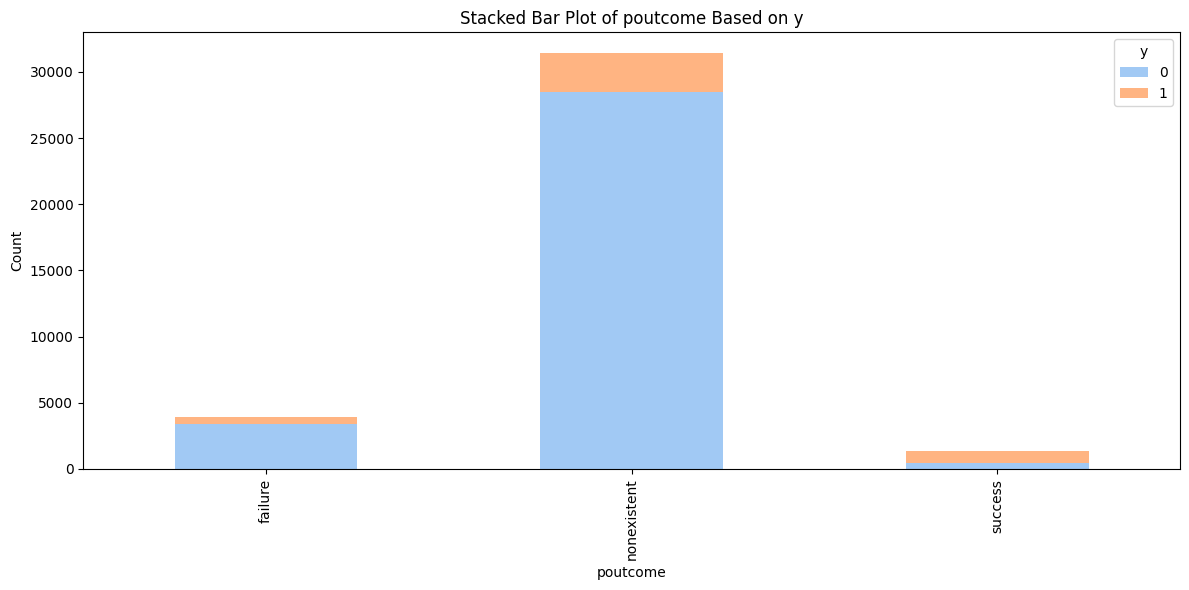

In [ ]:
plot_stacked_barplot(df_EDA, 'poutcome', 'y')

In [ ]:
poutcome_subs_rates = calculate_subscription_rates(df, 'poutcome', 'y')
poutcome_subs_rates

y     poutcome      0     1  total  CR(%class)  PR(%n)  not subscribe(%n)
1  nonexistent  28500  2912  31412        9.27    7.94              77.75
2      success    459   861   1320       65.23    2.35               1.25
0      failure   3362   564   3926       14.37    1.54               9.17

**Kesimpulan**<br>
- Sebagian besar nasabah (85.71%) adalah nasabah yang belum pernah dihubungi sebelumnya (nonexistent), dengan tingkat konversi (Conversion Rate, CR) sebesar 9.27%. Meskipun kontribusi terhadap keberhasilan (Participation Rate, PR) adalah yang tertinggi (7.94%), kelompok ini juga mendominasi jumlah nasabah yang tidak berlangganan (77.75%).
- Nasabah yang memiliki riwayat kampanye sebelumnya dengan hasil success menunjukkan CR yang jauh lebih tinggi (65.23%) dibandingkan kategori lainnya. Hal ini menandakan bahwa keberhasilan kampanye sebelumnya sangat memengaruhi potensi keberhasilan saat ini.
- Sebaliknya, untuk kelompok failure, CR lebih rendah yaitu 14,37%, menunjukkan bahwa kampanye sebelumnya yang gagal tetap memiliki peluang untuk dikonversi, meskipun tidak seefektif kelompok success.
- Kampanye yang relevan dan berhasil sebelumnya memberikan kontribusi signifikan terhadap tingkat keberhasilan kampanye selanjutnya. Hal ini menunjukkan pentingnya menyusun strategi kampanye yang efektif sejak awal.
- Hasil ini juga menggarisbawahi **urgensi pemanfaatan teknologi, seperti machine learning, untuk memprediksi target kampanye yang sesuai**. Dengan mengoptimalkan analisis data, potensi keberhasilan kampanye di masa depan dapat ditingkatkan melalui seleksi target yang lebih terarah.

**Insight**<br>
Hasil analisis ini menunjukkan bahwa riwayat kampanye sebelumnya memainkan peran penting dalam menentukan hasil kampanye saat ini. Sebagian besar nasabah adalah target baru, sehingga kampanye awal yang relevan menjadi sangat penting untuk menciptakan keberhasilan di masa depan. Dengan pemanfaatan data secara optimal dan bantuan machine learning, probabilitas keberhasilan kampanye berikutnya dapat ditingkatkan secara signifikan.

#### **Previous - Pengaruh Frekuensi Kontak Pada Kampanye Sebelumnya Terhadap Keputusan Kampanye**

In [ ]:
def calculate_subscription_rates_prev(df, feature, target):
    result = df.groupby([feature, target]).size().unstack().reset_index()


    if 'success' in result.columns and 'failure' in result.columns:

        result['total'] = result['success'] + result['failure']
        result['CR(%class)'] = (result['success'] / result['total'] * 100).round(2)
        result['PR(%n)'] = (result['success'] / len(df) * 100).round(2)
        result['not subscribe(%n)'] = (result['failure'] / len(df) * 100).round(2)

        result = result.sort_values(by='PR(%n)', ascending=False)

        return result
    else:
        print("Error: Expected columns '0' and '1' not found. Please check the target variable values.")
        return None

Dibawah ini adalah grafik antara frekuensi kontak pada kampanye sebelumnya VS hasil kampanye sebelumnya

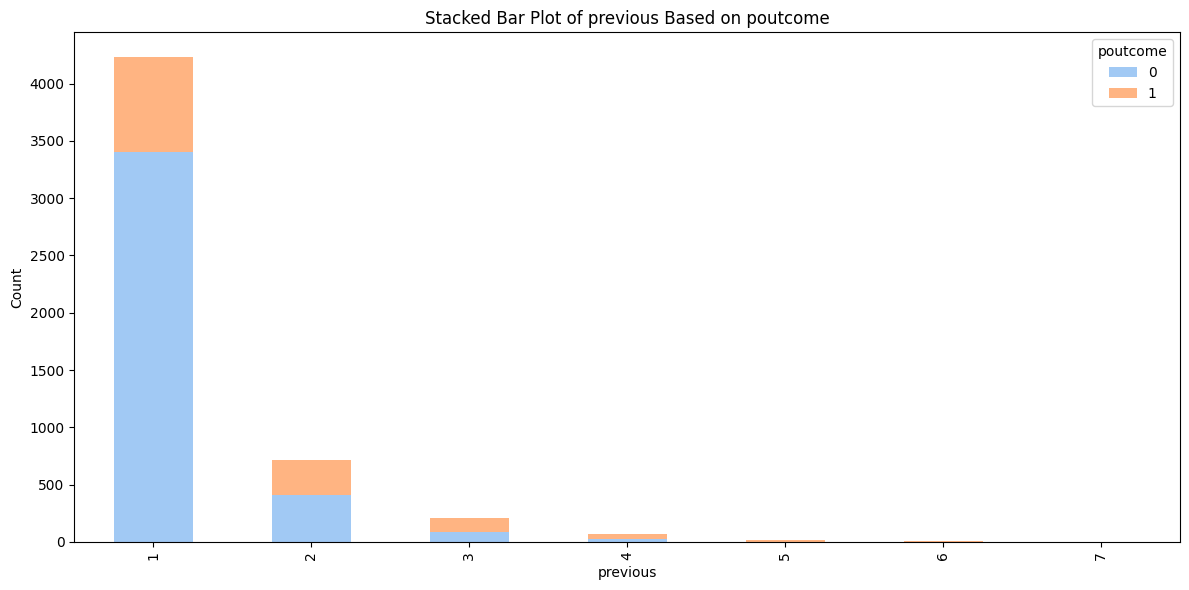

In [ ]:
plot_stacked_barplot(df_prev, 'previous', 'poutcome')

In [ ]:
df_prev=df_EDA[(df_EDA['poutcome']!='nonexistent')]
len(df_prev)

previous_subs_rates_prev = calculate_subscription_rates_prev(df_prev, 'previous', 'poutcome')
previous_subs_rates_prev

poutcome  previous  failure  success   total  CR(%class)  PR(%n)  \
0                1   3404.0    832.0  4236.0       19.64   15.86   
1                2    405.0    309.0   714.0       43.28    5.89   
2                3     85.0    122.0   207.0       58.94    2.33   
3                4     28.0     37.0    65.0       56.92    0.71   
4                5      3.0     15.0    18.0       83.33    0.29   
5                6      1.0      4.0     5.0       80.00    0.08   
6                7      NaN      1.0     NaN         NaN    0.02   

poutcome  not subscribe(%n)  
0                     64.89  
1                      7.72  
2                      1.62  
3                      0.53  
4                      0.06  
5                      0.02  
6                       NaN

Dari grafik dan tabel diatas, pada kampanye sebelumnya adanya banyak penolakan yang terjadi pada panggilan awal. dan terlihat juga bahwa semakin banyak kontak yang dilakukan, semakin tinggi peluang sukses di kampanye sebelumnya. <br>

In [ ]:
job_default_data = info_by_base(df_EDA, 'previous', 'y')
job_default_data

previous info_list  total_counts value_counts_per_data  mode
0         0      0, 1         31412           28500, 2912     0
1         1      0, 1          4236             3318, 918     0
2         2      0, 1           714              383, 331     0
3         3      0, 1           207               83, 124     1
4         4      0, 1            65                29, 36     1
5         5      0, 1            18                 5, 13     1
6         6      0, 1             5                  2, 3     1
7         7         0             1                     1     0

Tabel diatas menunjukkan analisis terkait nasabah yang telah dihubungi pada kampanye sebelumnya, mengamati frekuensi kontak mereka di kampanye saat ini, serta dampaknya terhadap hasil kampanye. Berdasarkan tabel, terlihat bahwa **seluruh nasabah yang pernah menerima panggilan atau edukasi tentang deposito pada kampanye sebelumnya dihubungi sebanyak 0-1 kali di kampanye saat ini**. Namun, terlihat adanya prospek positif yang lebih tinggi pada nasabah yang berada dalam rentang 3-6 kali panggilan pada kampanye sebelumnya, menunjukkan bahwa tingkat edukasi sebelumnya memiliki pengaruh signifikan terhadap keberhasilan kampanye saat ini. Namun untuk lebih jelasnya perlu dilakukan pengecekan CR dan PR lebih lanjut.

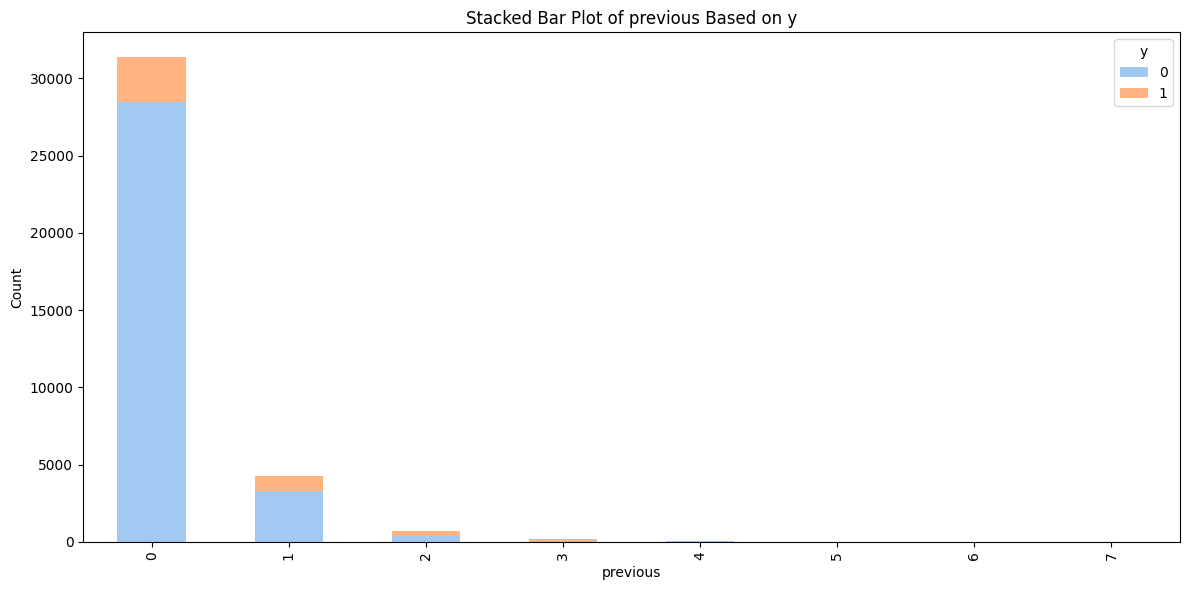

In [ ]:
plot_stacked_barplot(df_EDA, 'previous', 'y')

In [ ]:
previous_subs_rates_curr = calculate_subscription_rates(df_EDA, 'previous', 'y')
previous_subs_rates_curr

y  previous        0       1    total  CR(%class)  PR(%n)  not subscribe(%n)
0         0  28500.0  2912.0  31412.0        9.27    7.94              77.75
1         1   3318.0   918.0   4236.0       21.67    2.50               9.05
2         2    383.0   331.0    714.0       46.36    0.90               1.04
3         3     83.0   124.0    207.0       59.90    0.34               0.23
4         4     29.0    36.0     65.0       55.38    0.10               0.08
5         5      5.0    13.0     18.0       72.22    0.04               0.01
6         6      2.0     3.0      5.0       60.00    0.01               0.01
7         7      1.0     NaN      NaN         NaN     NaN               0.00

Data pada kolom diatas memvalidasi bahwa nasabah yang pernah dihubungi sebelumnya lebih cenderung untuk menerima tawaran seperti yang telah disebutkan tadi. Terlihat dari terus meningkatnya nilai CR seiring peningkatan frekuensi kontak pada kampanye sebelumnya.

**Kesimpulan**<br>
Berdasarkan data yang dianalisis, terdapat hubungan yang kuat antara jumlah panggilan yang dilakukan pada kampanye sebelumnya (*previous*) dengan tingkat keberhasilan kampanye saat ini. Hal ini juga terlihat dari Nilai Point Biserial Previous Positif (0.230) yang berarti nasabah yang pernah dihubungi sebelumnya lebih cenderung untuk menyetujui deposit. Berikut adalah kesimpulan dari data tersebut:

1. **Efektivitas Kontak Sebelumnya**  
   - Nasabah yang belum pernah dihubungi sebelumnya (previous = 0) memiliki tingkat konversi (*Conversion Rate*, CR) sebesar **9,27%**, yang merupakan nilai terendah dalam data ini. Namun, kelompok ini mendominasi jumlah total panggilan (85.71%) dengan proporsi **77,75%** dari nasabah yang tidak berlangganan. Hal ini dapat disebabkan oleh kurangnya wawasan nasabah terhadap produk yang ditawarkan.
   - Sebaliknya, nasabah yang telah dihubungi 1 kali pada kampanye sebelumnya menunjukkan peningkatan CR yang signifikan menjadi **21,67%**, dengan kontribusi terhadap keberhasilan PR sebesar **2,50%**.

2. **Keberhasilan pada Frekuensi Kontak Lebih Tinggi**  
   - Frekuensi kontak yang lebih tinggi pada kampanye sebelumnya secara konsisten menunjukkan peningkatan CR. Misalnya:
     - *Previous* = 2, CR mencapai **46,36%**.
     - *Previous* = 5, CR bahkan melonjak hingga **72,22%**, meskipun jumlah nasabah dalam kelompok ini relatif kecil.
   - Hal ini menunjukkan bahwa edukasi atau kontak berulang pada kampanye sebelumnya secara signifikan meningkatkan peluang keberhasilan di kampanye saat ini.


**Insight** <br>
Hasil ini menunjukkan bahwa kontak berulang pada kampanye sebelumnya dapat memperbesar peluang keberhasilan di kampanye berikutnya. Kampanye yang efektif perlu mempertimbangkan pola komunikasi berkelanjutan, dengan fokus pada memberikan edukasi yang mendalam kepada nasabah yang telah dihubungi sebelumnya. Namun, penting untuk tetap memperhatikan efisiensi, menghindari frekuensi kontak yang terlalu tinggi untuk mencegah gangguan pada nasabah.

#### **Kesimpulan Efek Dari Kampanye Sebelumnya Terhadap Hasil Kampanye Saat Ini**

Berdasarkan hasil analisis, terdapat hubungan yang kuat antara faktor-faktor seperti jumlah panggilan sebelumnya (*previous*), jarak waktu sejak kontak terakhir (*pdays*), dan hasil kampanye sebelumnya (*poutcome*) dengan tingkat keberhasilan kampanye saat ini.
1. **Jumlah Kontak Sebelumnya**  
   Kampanye sebelumnya yang melibatkan kontak lebih sering secara signifikan meningkatkan kemungkinan keberhasilan di kampanye saat ini. Nasabah yang dihubungi lebih dari sekali memiliki *Conversion Rate* (CR) jauh lebih tinggi, dengan nilai puncak CR mencapai 72,22% pada kontak sebanyak lima kali.  

2. **Jarak Waktu dari Kontak Terakhir**  
   Peluang keberhasilan meningkat seiring panjangnya jarak waktu sejak kontak terakhir, dengan catatan waktu terlama adalah 6 minggu sejak kontak terakhir. Nasabah yang dihubungi dalam rentang waktu dua hingga enam minggu menunjukkan CR yang sangat tinggi (48,47% hingga 87,50%).  

3. **Hasil Kampanye Sebelumnya**  
   Nasabah yang telah berhasil pada kampanye sebelumnya (*success*) memiliki peluang tertinggi untuk konversi pada kampanye saat ini, dengan CR sebesar 65,23%. Sebaliknya, meskipun hasil sebelumnya berupa kegagalan (*failure*) tetap menunjukkan peluang konversi sebesar 14,37%.  

**Insight**  
- Panggilan optimal sejak kampanye sebelumnya berada pada rentang 2-6 minggu, dan perlu diupayakan agar panggilann pertama tiap nasabah berhasil dilakukan sebagai pintu awal untuk edukasi kampanye demi hasil kampanye yang maksimal.
- Sebagian besar nasabah adalah target baru (85,71%) dengan CR rendah, menyoroti pentingnya edukasi awal dari kontak kampanye yang efektif dan efisien. Namun, kampanye sebelumnya yang sukses atau melibatkan interaksi lebih intens memberikan dampak positif signifikan pada keberhasilan kampanye berikutnya. **Strategi berbasis *machine learning* sangat diperlukan untuk memprediksi target yang relevan dan meningkatkan efisiensi kampanye mendatang.**

## **Bagaimana Pengaruh Status Kredit (Default, Housing, Loan) Terhadap Keputusan Nasabah Untuk Mengambil Produk Deposito?**

### **Berdasarkan Status Tunggakan Kredit Sebelumnya (Default)**

In [ ]:
df_EDA[df_EDA['default']=='yes']

age    age_class         job  marital            education default  \
21580   48  middle-aged  technician  married  professional.course     yes   
21581   48  middle-aged  technician  married  professional.course     yes   
24866   31        adult  unemployed  married          high.school     yes   

      housing loan   contact month day_of_week  duration  campaign  \
21580      no   no  cellular   aug         tue        66         1   
21581     yes   no  cellular   aug         tue       133         1   
24866      no   no  cellular   nov         tue       111         2   

               pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
21580  not contacted         0  nonexistent           1.4          93.444   
21581  not contacted         0  nonexistent           1.4          93.444   
24866        1 weeks         1      failure          -0.1          93.200   

       cons.conf.idx  euribor3m  nr.employed  y duration_range campaign_range  
21580          -36.1      4.963       5228.1  0          0-200            1-3  
21581          -36.1      4.963       5228.1  0          0-200            1-3  
24866          -42.0      4.153       5195.8  0          0-200            1-3

dari data diatas, terlihat bahwa pada campaign saat ini nasabah yang memiliki history credit macet hanya 3 orang dan seluruhnya memilih untuk menolak tawaran yang diberikan. Maka proses promosi/ kampanye sebaiknya difokuskan kepada nasabah tanpa history kredit macet.

In [ ]:
default_subs_rates = calculate_subscription_rates(df_EDA, 'default', 'y')
default_subs_rates

y default        0       1    total  CR(%class)  PR(%n)  not subscribe(%n)
0      no  32318.0  4337.0  36655.0       11.83   11.83              88.16
1     yes      3.0     NaN      NaN         NaN     NaN               0.01

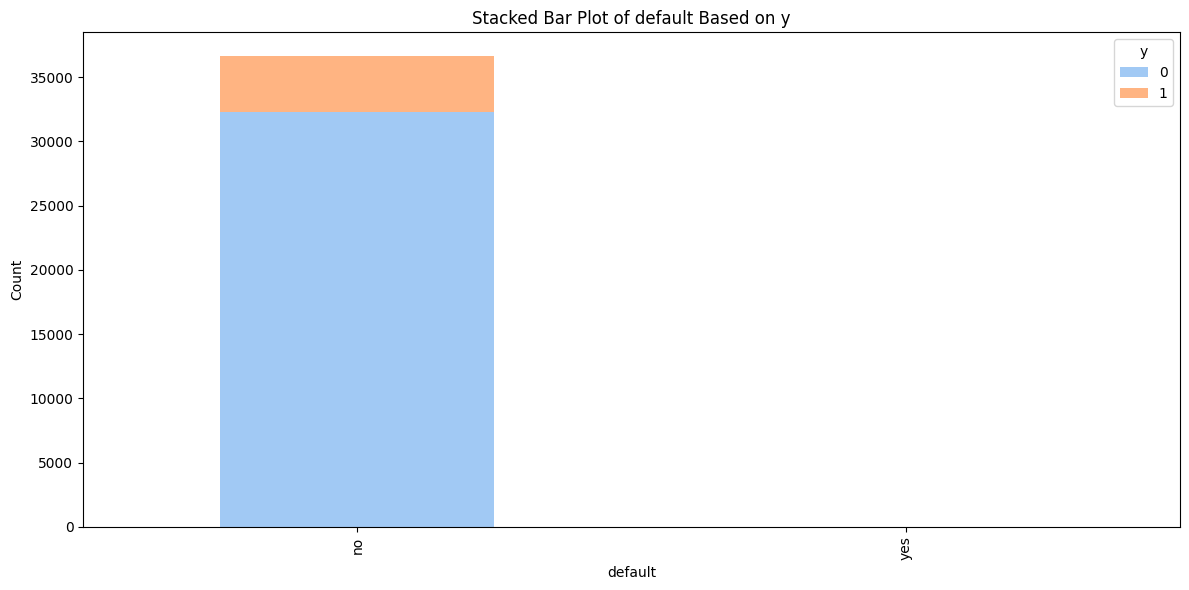

In [ ]:
plot_stacked_barplot(df_EDA, 'default', 'y')

**Kesimpulan**<br>Terlihat bahwa hal ini tidak berpengaruh terhadap hasil kampanye. Ini diperkuat dengan nilai P-value (1.000000e+00) yang bernilai > 0.05, yang berarti tidak adanya pengaruh dari variabel ini terhadap keputusan nasabah dalam menerima tawaran kampanye

### **Berdasarkan Kredit Perumahan Saat Ini (Housing)**

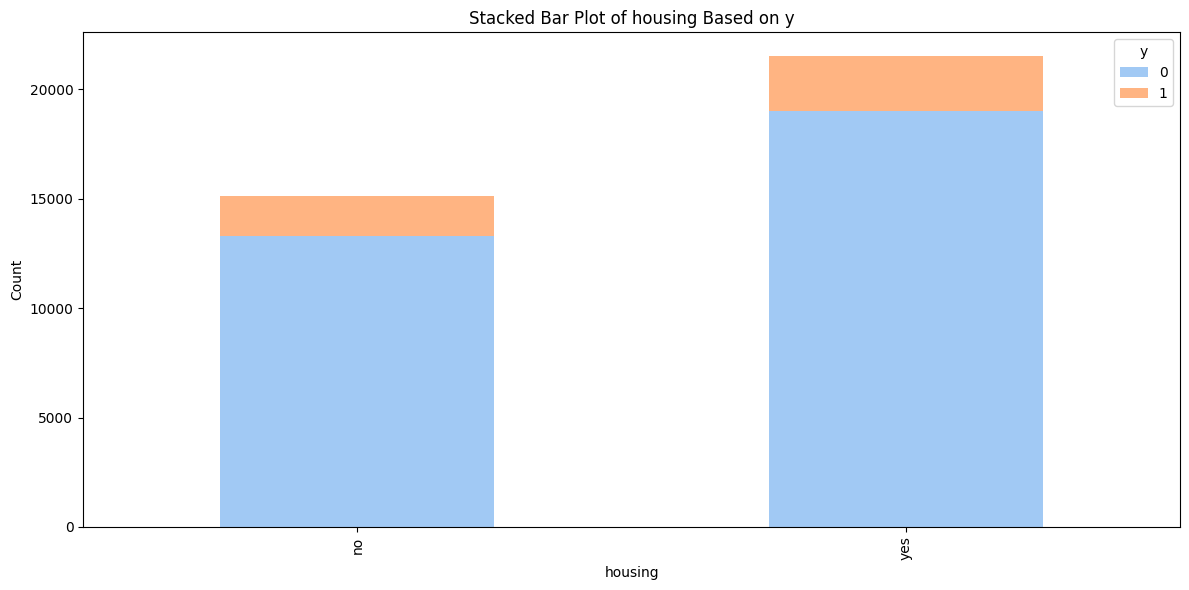

In [ ]:
plot_stacked_barplot(df_EDA, 'housing', 'y')

In [ ]:
housing_subs_rates = calculate_subscription_rates(df_EDA, 'housing', 'y')
housing_subs_rates

y housing      0     1  total  CR(%class)  PR(%n)  not subscribe(%n)
1     yes  19034  2502  21536       11.62    6.83              51.92
0      no  13287  1835  15122       12.13    5.01              36.25

**Kesimpulan**<br>
- Dari data di atas, dapat disimpulkan bahwa nasabah dengan status memiliki kredit rumah (housing: yes) memiliki conversion rate (CR) sebesar 11.62%, sedangkan nasabah tanpa kredit rumah (housing: no) memiliki CR sebesar 12.13%. Perbedaan antara kedua kelompok ini sangat kecil, yaitu hanya 0.51%, yang menunjukkan bahwa status kepemilikan kredit rumah tidak memberikan pola yang jelas terhadap kemungkinan nasabah melakukan tindakan yang diharapkan (menerima tawaran deposito).
- Proportion Rate (PR): Proporsi nasabah yang memiliki kredit rumah lebih tinggi (6.83%) dibandingkan dengan yang tidak memiliki kredit rumah (5.01%). Namun, ini mungkin disebabkan oleh jumlah nasabah yang memiliki kredit rumah lebih banyak dalam dataset.
- Non-subscribe: Persentase nasabah yang tidak melakukan subscribe lebih tinggi pada kelompok tanpa kredit rumah (36.25%) dibandingkan dengan kelompok yang memiliki kredit rumah (51.92%) hal ini dikarenakan jumlah nasabah yang lebih besar pada nasabah yang memiliki kredit pinjaman rumah.

### **Berdasarkan Pinjaman Pribadi Saat Ini (Loan)**

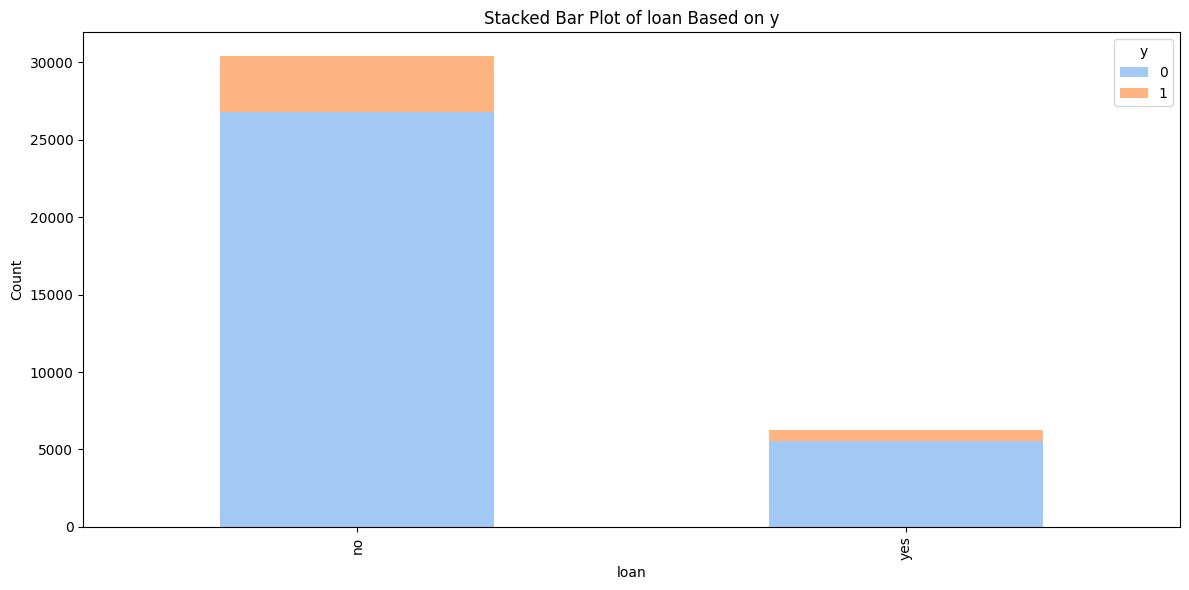

In [ ]:
plot_stacked_barplot(df_EDA, 'loan', 'y')

In [ ]:
loan_subs_rates = calculate_subscription_rates(df_EDA, 'loan', 'y')
loan_subs_rates

y loan      0     1  total  CR(%class)  PR(%n)  not subscribe(%n)
0   no  26767  3655  30422       12.01    9.97              73.02
1  yes   5554   682   6236       10.94    1.86              15.15

**Kesimpulan**
- Dari data di atas, dapat disimpulkan bahwa terdapat perbedaan tingkat **conversion rate (CR)** antara nasabah yang memiliki pinjaman pribadi (*loan: yes*) dan yang tidak memiliki pinjaman pribadi (*loan: no*)
- Nasabah tanpa pinjaman pribadi memiliki CR sebesar **12.01%**, sedikit lebih tinggi dibandingkan dengan nasabah yang memiliki pinjaman pribadi , yang memiliki CR sebesar **10.94%**.
- Selisih sebesar **1.07%** menunjukkan bahwa nasabah tanpa pinjaman pribadi cenderung sedikit lebih mungkin untuk berlangganan (*subscribe*) dibandingkan dengan mereka yang memiliki pinjaman pribadi.
- Proporsi nasabah tanpa pinjaman pribadi jauh lebih besar (**9.97%**) dibandingkan dengan nasabah yang memiliki pinjaman pribadi (**1.86%**). Hal ini menunjukkan bahwa mayoritas nasabah dalam dataset tidak memiliki pinjaman pribadi.

Data ini menunjukkan bahwa nasabah tanpa pinjaman pribadi memiliki tingkat *conversion rate* yang sedikit lebih tinggi dibandingkan nasabah dengan pinjaman pribadi, ini didukung dengan p-value 0.017 yang tergolong lebih tinggi dibandingkan fitur berpengaruh lainya.

## **Saluran Komunikasi (Contact) Apa Yang Paling Efektif Untuk Meningkatkan Tingkat Penerimaan Tawaran Deposito?**

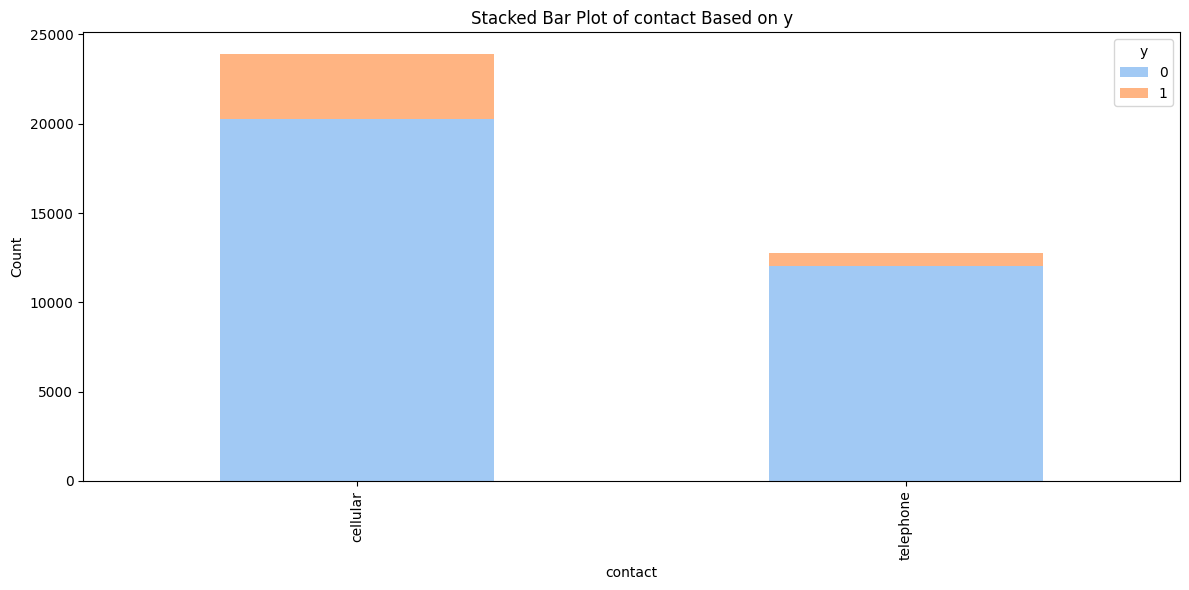

In [ ]:
plot_stacked_barplot(df_EDA, 'contact', 'y')

In [ ]:
contact_subs_rates = calculate_subscription_rates(df_EDA, 'contact', 'y')
contact_subs_rates

y    contact      0     1  total  CR(%class)  PR(%n)  not subscribe(%n)
0   cellular  20291  3631  23922       15.18    9.91              55.35
1  telephone  12030   706  12736        5.54    1.93              32.82

**Kesimpulan Saluran komunikasi paling efektif untuk kampanye**<br>
- Kontak melalui cellular memiliki tingkat keberhasilan (Conversion Rate, CR) yang lebih tinggi, yaitu 15,18%, dibandingkan dengan kontak melalui telephone yang hanya mencapai 5,54%.
- Cellular juga memberikan kontribusi terbesar terhadap keberhasilan kampanye (Participation Rate, PR), yaitu 9,91%, dibandingkan telephone yang hanya 1,93%.
- Sebagian besar nasabah yang tidak berlangganan dihubungi melalui cellular (55,35%), yang sejalan dengan volume kontak yang lebih besar dibandingkan dengan telephone. Sedangkan telephone menyumbang 32,82% dari total nasabah yang tidak berlangganan, menunjukkan efektivitas yang lebih rendah.

<br>

**Insight**<br>
Kontak melalui cellular terbukti lebih efektif dalam meningkatkan peluang keberhasilan kampanye dibandingkan dengan telephone. Kampanye di masa depan sebaiknya lebih memprioritaskan penggunaan kontak cellular untuk mencapai hasil yang lebih optimal.

## **Bagaimana Kondisi Ekonomi Makro Memengaruhi Keputusan Nasabah Untuk Menerima Tawaran Deposito?**

Kondisi ekonomi makro sangat berkaitan erat dengan rate bulanan, maka pada tahap ini setiap kondisi ekonomi dan sosial akan dikaitkan dengan jumlah dan proporsi nasabah yang menerima tawaran deposito

In [ ]:
month_order = {'mar': 1, 'apr': 2, 'may': 3, 'jun': 4, 'jul': 5,
               'aug': 6, 'sep': 7, 'oct': 8, 'nov': 9, 'dec': 10}

month_subs_rates = calculate_subscription_rates(df_EDA, 'month', 'y')
month_subs_rates['month_order'] = month_subs_rates['month'].map(month_order)

sorted_month_subs_rates = month_subs_rates.sort_values('month_order').drop(columns='month_order')

sorted_month_subs_rates = sorted_month_subs_rates.reset_index(drop=True)

In [ ]:
def dual_axis_plot(df, feature, target, y_col, title):
    month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

    df[feature] = pd.Categorical(df[feature], categories=month_order, ordered=True)

    stacked_data = pd.crosstab(df[feature], df[target])
    median_data = df.groupby(feature, observed=True)[y_col].median()
    pastel_colors = sns.color_palette("pastel")

    fig, ax1 = plt.subplots(figsize=(12, 6))
    stacked_data.plot(kind='bar', stacked=True, ax=ax1, color=pastel_colors, width=0.8, alpha=0.8)

    ax1.set_title(title, fontsize=14)
    ax1.set_xlabel(feature.capitalize(), fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.legend(title=target.capitalize(), loc='upper left')

    ax2 = ax1.twinx()
    ax2.plot(median_data.index, median_data.values, color='blue', marker='o', linewidth=2, label='Median Rate')
    ax2.set_ylabel(y_col.replace('.', ' ').capitalize(), fontsize=12)
    ax2.legend(loc='upper right')

    ax1.set_xticklabels(month_order, rotation=45)
    ax2.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

### **emp.var.rate**

In [ ]:
df_emp_rate = df_EDA[['emp.var.rate', 'month']].groupby('month', as_index=False, observed=False).median()
merged_df_emprate = sorted_month_subs_rates.merge(df_emp_rate, on='month', how='inner')
merged_df_emprate

month      0    1  total  CR(%class)  PR(%n)  not subscribe(%n)  \
0   mar    260  266    526       50.57    0.73               0.71   
1   apr   1938  520   2458       21.16    1.42               5.29   
2   may  11156  803  11959        6.71    2.19              30.43   
3   jun   3978  517   4495       11.50    1.41              10.85   
4   jul   5752  591   6343        9.32    1.61              15.69   
5   aug   4988  610   5598       10.90    1.66              13.61   
6   sep    305  243    548       44.34    0.66               0.83   
7   oct    388  301    689       43.69    0.82               1.06   
8   nov   3466  400   3866       10.35    1.09               9.45   
9   dec     90   86    176       48.86    0.23               0.25   

   emp.var.rate  
0          -1.8  
1          -1.8  
2           1.1  
3           1.4  
4           1.4  
5           1.4  
6          -1.1  
7          -3.4  
8          -0.1  
9          -3.0

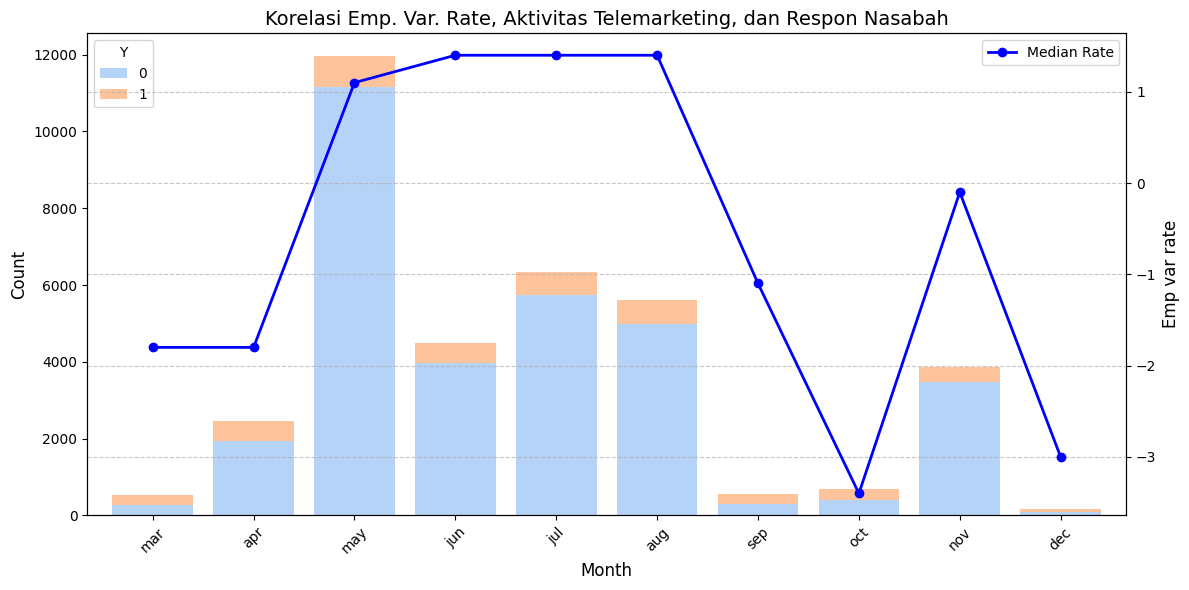

In [ ]:
emp_var = dual_axis_plot(df_EDA, 'month', 'y', 'emp.var.rate',
               'Korelasi Emp. Var. Rate, Aktivitas Telemarketing, dan Respon Nasabah')
emp_var

Jika dilihat pada grafik diatas pada rentang bulan Mei - Agustus, tingkat orang yang bekerja sedang tinggi, jadi perusahaan memanfaatkan momen ini untuk menawarkan deposito kepada nasabah (dapat dilihat pada barchart month of calls, terdapat banyak konsumen yang dihubungi pada bulan Mei- Agustus). Tetapi kenyataannya perusahaan berhasil menarik nasabah untuk melakukan deposit saat tingkat variasi pekerjaan menurun.

**Kesimpulan**<br>
Tingkat variasi pekerjaan (emp.var.rate) mencerminkan perubahan dalam tingkat pekerjaan yang mempengaruhi daya beli dan keputusan investasi nasabah. Dari analisis yang dilakukan, terdapat korelasi negatif antara tingkat variasi pekerjaan dengan tingkat konversi tawaran deposito (CR). Ketika tingkat variasi pekerjaan menurun (seperti di bulan Maret, dengan emp.var.rate -1.8), tingkat konversi lebih tinggi (50.57%). Ini menunjukkan bahwa ketidakpastian pasar tenaga kerja mendorong nasabah untuk mencari alternatif investasi yang lebih aman, seperti deposito. Sebaliknya, ketika tingkat variasi pekerjaan meningkat, seperti pada bulan Mei (dengan emp.var.rate 1.1), CR turun menjadi 6.71%, karena nasabah cenderung lebih optimis terhadap prospek ekonomi dan lebih tertarik pada pilihan investasi lain.

### **cons.price.idx**

In [ ]:
df_price_idx = df_EDA[['cons.price.idx', 'month']].groupby('month', as_index=False, observed=False).median()

merged_df_pidx = sorted_month_subs_rates.merge(df_price_idx, on='month', how='inner')
merged_df_pidx

month      0    1  total  CR(%class)  PR(%n)  not subscribe(%n)  \
0   mar    260  266    526       50.57    0.73               0.71   
1   apr   1938  520   2458       21.16    1.42               5.29   
2   may  11156  803  11959        6.71    2.19              30.43   
3   jun   3978  517   4495       11.50    1.41              10.85   
4   jul   5752  591   6343        9.32    1.61              15.69   
5   aug   4988  610   5598       10.90    1.66              13.61   
6   sep    305  243    548       44.34    0.66               0.83   
7   oct    388  301    689       43.69    0.82               1.06   
8   nov   3466  400   3866       10.35    1.09               9.45   
9   dec     90   86    176       48.86    0.23               0.25   

   cons.price.idx  
0          92.843  
1          93.075  
2          93.994  
3          94.465  
4          93.918  
5          93.444  
6          94.199  
7          92.431  
8          93.200  
9          92.713

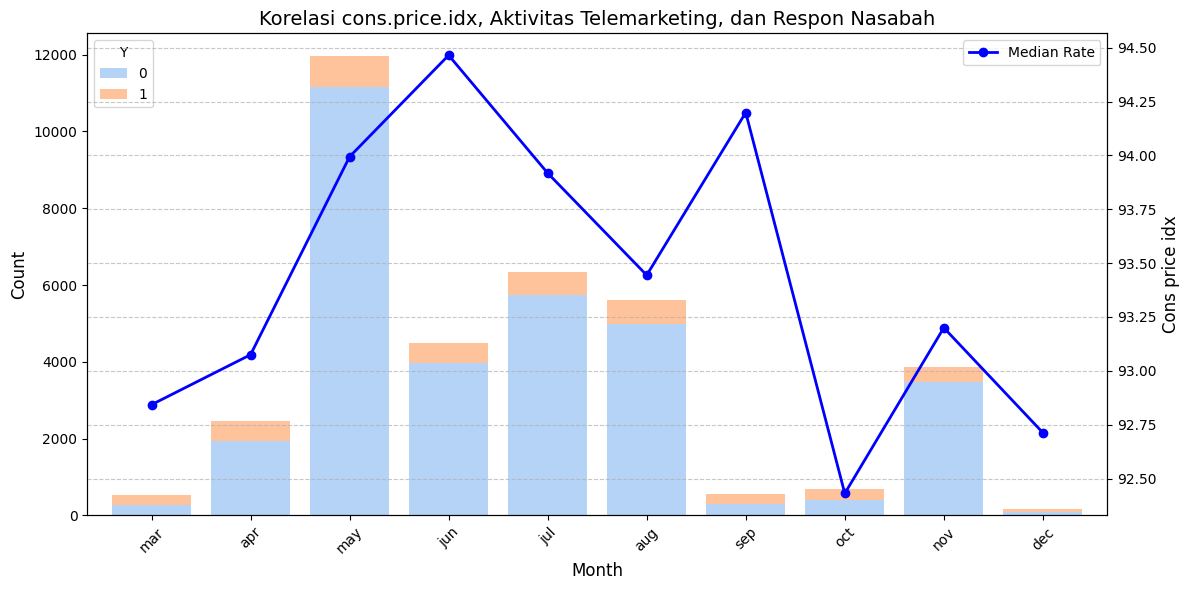

In [ ]:
price_idx = dual_axis_plot(df_EDA, 'month', 'y', 'cons.price.idx',
               'Korelasi cons.price.idx, Aktivitas Telemarketing, dan Respon Nasabah')
price_idx

Ketika inflasi meningkat, bank cenderung mempromosikan deposito berjangka dengan suku bunga lebih tinggi untuk menarik nasabah menyimpan uangnya, mengingat nilai uang tunai cenderung tergerus lebih cepat dalam situasi inflasi tinggi. Sebaliknya, masyarakat biasanya mencari investasi dengan pengembalian yang mampu melampaui laju inflasi. Dalam kondisi ini, deposito berjangka dengan suku bunga menarik menjadi pilihan karena menawarkan perlindungan terhadap penurunan daya beli.

Hal ini sejalan dengan tren pada line chart, yang menunjukkan bahwa saat inflasi tinggi, perusahaan lebih gencar melakukan kampanye untuk memasarkan deposito berjangka. Namun, yang menarik adalah tingkat konversi tertinggi justru terjadi ketika inflasi rendah. Kami akan mengevaluasi kembali pengaruh faktor ekonomi lainnya terhadap hasil ini.

**Kesimpulan**<br>
Indeks harga konsumen (cons.price.idx) mencerminkan perubahan harga barang dan jasa yang dikonsumsi oleh rumah tangga. Korelasi antara indeks ini dan penerimaan tawaran deposito menunjukkan bahwa ketika harga konsumen meningkat, minat terhadap deposito cenderung menurun. Sebagai contoh, pada bulan Mei, meskipun cons.price.idx mencapai 93.994, yang menunjukkan kenaikan harga, CR turun drastis menjadi 6.71%. Hal ini mungkin disebabkan oleh inflasi yang mendorong nasabah untuk mencari investasi yang dapat mengalahkan inflasi, daripada menahan uang mereka dalam deposito yang berbunga tetap.

### **cons.conf.idx**

In [ ]:
df_conf_idx = df_EDA[['cons.conf.idx', 'month']].groupby('month', as_index=False, observed=False).median()

merged_df_cidx = sorted_month_subs_rates.merge(df_conf_idx, on='month', how='inner')
merged_df_cidx

month      0    1  total  CR(%class)  PR(%n)  not subscribe(%n)  \
0   mar    260  266    526       50.57    0.73               0.71   
1   apr   1938  520   2458       21.16    1.42               5.29   
2   may  11156  803  11959        6.71    2.19              30.43   
3   jun   3978  517   4495       11.50    1.41              10.85   
4   jul   5752  591   6343        9.32    1.61              15.69   
5   aug   4988  610   5598       10.90    1.66              13.61   
6   sep    305  243    548       44.34    0.66               0.83   
7   oct    388  301    689       43.69    0.82               1.06   
8   nov   3466  400   3866       10.35    1.09               9.45   
9   dec     90   86    176       48.86    0.23               0.25   

   cons.conf.idx  
0          -50.0  
1          -47.1  
2          -36.4  
3          -41.8  
4          -42.7  
5          -36.1  
6          -37.5  
7          -26.9  
8          -42.0  
9          -33.0

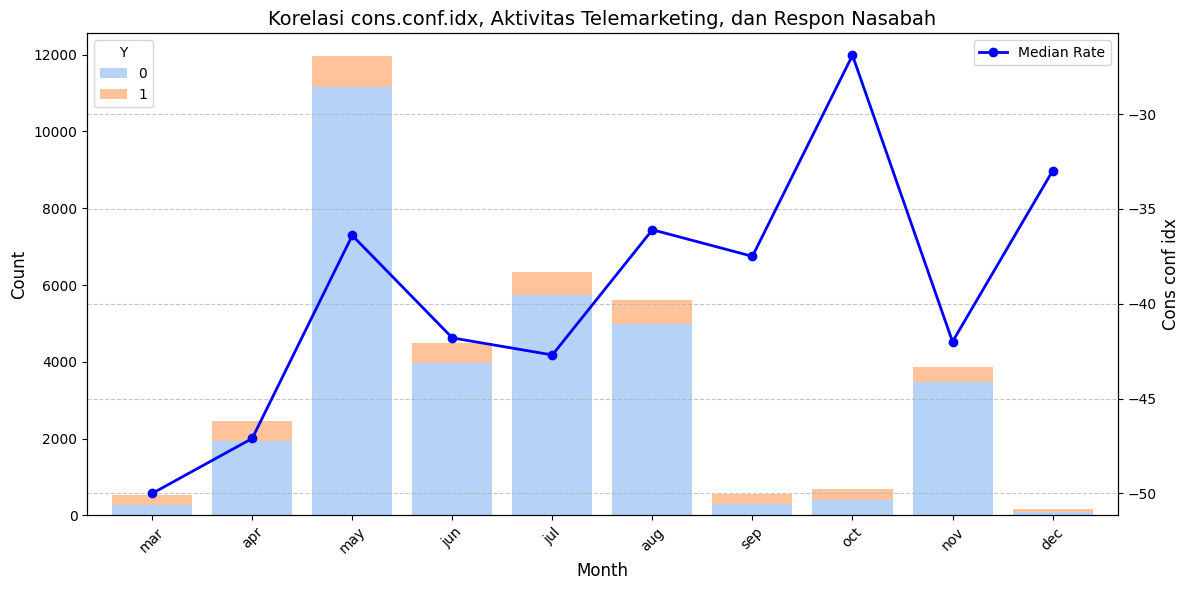

In [ ]:
conf_idx = dual_axis_plot(df_EDA, 'month', 'y', 'cons.conf.idx',
               'Korelasi cons.conf.idx, Aktivitas Telemarketing, dan Respon Nasabah')
conf_idx

Berdasarkan line chart di atas, terlihat bahwa tingkat konversi (CR) yang tinggi pada kampanye perusahaan terjadi pada bulan September, Oktober, dan Desember. Hal ini selaras dengan pola yang ditunjukkan pada barplot *month of calls*. Jika dikaitkan dengan faktor inflasi, perlu dicatat bahwa inflasi dalam batas tertentu bukanlah indikator yang sepenuhnya negatif. Sebaliknya, inflasi yang moderat mencerminkan peningkatan produktivitas di pasar, yang dapat mendorong kepercayaan investor. Kondisi ini menjelaskan mengapa banyak individu tertarik pada instrumen investasi berisiko rendah seperti deposito berjangka selama periode tersebut. Untuk mendapatkan wawasan yang lebih komprehensif, kami akan menganalisis faktor-faktor ekonomi lainnya.

**Kesimpulan**<br>
Indeks kepercayaan konsumen (cons.conf.idx) adalah indikator penting untuk mengukur sentimen ekonomi konsumen dan dampaknya terhadap keputusan finansial. Secara umum, CR menunjukkan penurunan yang signifikan ketika cons.conf.idx berada pada nilai negatif yang sangat rendah, seperti yang terjadi di bulan Maret (-50.0). Pada bulan ini, tingkat konversi tinggi (50.57%), yang mungkin menunjukkan bahwa ketidakpastian ekonomi membuat nasabah mencari keamanan dalam investasi deposito. Sebaliknya, saat indeks ini sedikit meningkat, seperti pada bulan Mei (-36.4), CR justru menurun, mungkin karena optimisme ekonomi mendorong nasabah untuk memilih instrumen investasi yang lebih berisiko.

### **euribor3m**

In [ ]:
df_euribor = df_EDA[['euribor3m', 'month']].groupby('month', as_index=False, observed=False).median()

merged_df_euri = sorted_month_subs_rates.merge(df_euribor, on='month', how='inner')
merged_df_euri

month      0    1  total  CR(%class)  PR(%n)  not subscribe(%n)  euribor3m
0   mar    260  266    526       50.57    0.73               0.71      1.515
1   apr   1938  520   2458       21.16    1.42               5.29      1.405
2   may  11156  803  11959        6.71    2.19              30.43      4.855
3   jun   3978  517   4495       11.50    1.41              10.85      4.958
4   jul   5752  591   6343        9.32    1.61              15.69      4.962
5   aug   4988  610   5598       10.90    1.66              13.61      4.964
6   sep    305  243    548       44.34    0.66               0.83      0.876
7   oct    388  301    689       43.69    0.82               1.06      0.742
8   nov   3466  400   3866       10.35    1.09               9.45      4.120
9   dec     90   86    176       48.86    0.23               0.25      0.714

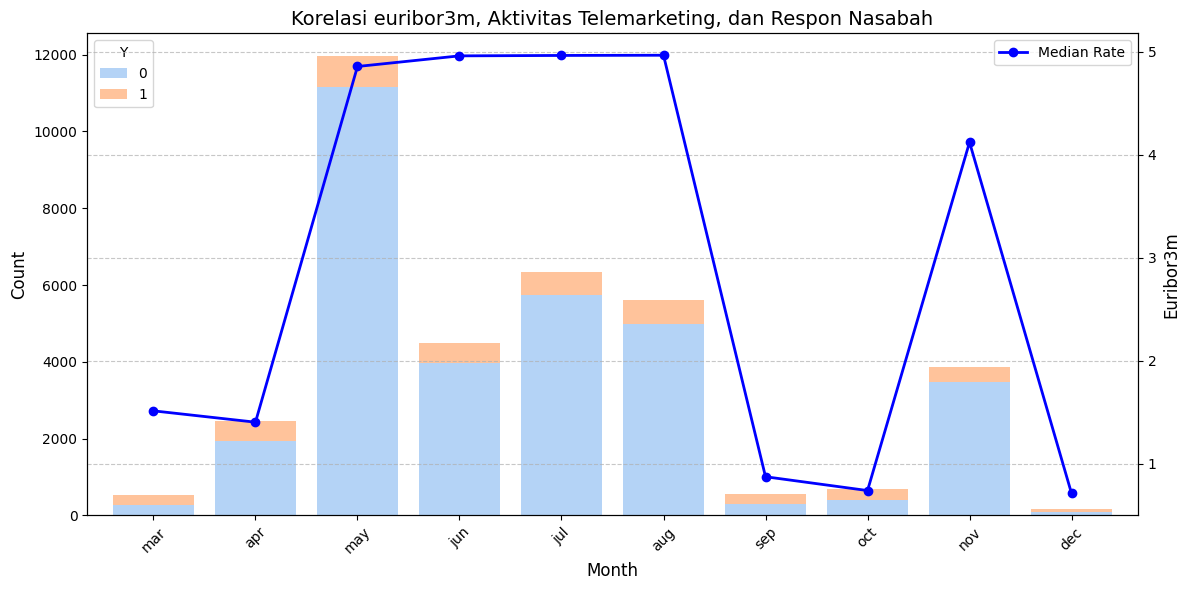

In [ ]:
euribor_3m = dual_axis_plot(df_EDA, 'month', 'y', 'euribor3m',
               'Korelasi euribor3m, Aktivitas Telemarketing, dan Respon Nasabah')
euribor_3m

Sebagaimana ditunjukkan pada line chart, tingkat Euribor berada pada posisi tinggi selama periode kampanye perusahaan yang intens, yaitu antara Mei hingga Agustus. Namun, tingkat konversi tertinggi justru terjadi saat Euribor berada pada level rendah, seperti pada bulan Maret, September, Oktober, dan Desember. Menariknya, tren suku [bunga deposito di Portugal](https://www.google.com/url?q=https%3A%2F%2Ftradingeconomics.com%2Fportugal%2Finterest-rate) selama periode 2008 hingga 2010 menunjukkan penurunan tajam, dari 4% menjadi hanya 1%.

**Kesimpulan**<br>
Suku bunga Euribor 3 bulan (euribor3m) adalah suku bunga acuan untuk pinjaman jangka pendek di zona Euro, yang mempengaruhi keputusan investasi nasabah. Pada bulan Mei, suku bunga Euribor tinggi (4.855), tetapi CR menurun menjadi 6.71%. Sebaliknya, ketika Euribor lebih rendah, seperti pada bulan Oktober (0.742), CR justru meningkat (43.69%), menunjukkan bahwa nasabah cenderung memilih deposito ketika suku bunga lebih rendah, karena memberikan return yang lebih menarik. Hal ini mencerminkan sensitivitas nasabah terhadap suku bunga, yang mempengaruhi daya tarik deposito sebagai instrumen investasi.

### **nr.employed**

In [ ]:
df_nme = df_EDA[['nr.employed', 'month']].groupby('month', as_index=False, observed=False).median()

merged_df_nme = sorted_month_subs_rates.merge(df_nme, on='month', how='inner')
merged_df_nme

month      0    1  total  CR(%class)  PR(%n)  not subscribe(%n)  nr.employed
0   mar    260  266    526       50.57    0.73               0.71       5099.1
1   apr   1938  520   2458       21.16    1.42               5.29       5099.1
2   may  11156  803  11959        6.71    2.19              30.43       5191.0
3   jun   3978  517   4495       11.50    1.41              10.85       5228.1
4   jul   5752  591   6343        9.32    1.61              15.69       5228.1
5   aug   4988  610   5598       10.90    1.66              13.61       5228.1
6   sep    305  243    548       44.34    0.66               0.83       4963.6
7   oct    388  301    689       43.69    0.82               1.06       5017.5
8   nov   3466  400   3866       10.35    1.09               9.45       5195.8
9   dec     90   86    176       48.86    0.23               0.25       5023.5

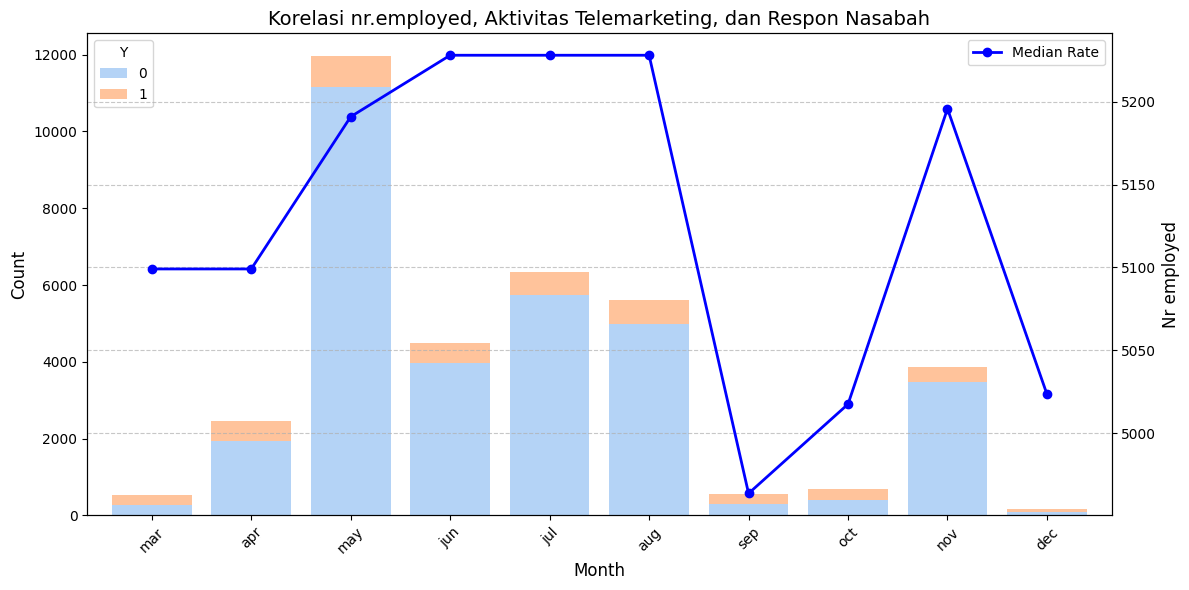

In [ ]:
nb_em = dual_axis_plot(df_EDA, 'month', 'y', 'nr.employed',
               'Korelasi nr.employed, Aktivitas Telemarketing, dan Respon Nasabah')
nb_em

Indikator ini berkaitan erat dengan emp.var.rate, dimana perusahaan melakukan banyak kampanye saat angka ini sedang tinggi, tetapi CR tertinggi justru saat angka ini sedang rendah.

**Kesimpulan**<br>
Jumlah pekerja (nr.employed) adalah indikator penting yang mencerminkan keadaan pasar tenaga kerja. Pada bulan Maret, dengan jumlah pekerja 5099, tingkat konversi tinggi (50.57%), yang bisa menunjukkan bahwa meskipun jumlah pekerja tetap stabil, ketidakpastian ekonomi yang disebabkan oleh faktor lain (seperti tingkat pengangguran yang tinggi) mendorong nasabah untuk berinvestasi dalam deposito sebagai bentuk perlindungan keuangan. Ketika jumlah pekerja sedikit meningkat, seperti di bulan Mei (5191), CR menurun menjadi 6.71%, yang bisa menunjukkan bahwa nasabah merasa lebih aman dan cenderung berinvestasi dalam instrumen yang lebih berisiko atau berpotensi lebih menguntungkan.

## **Kapan Waktu Terbaik Untuk Menjalankan Kampanye Promosi (Berdasarkan Month, day_of_week)?**

#### **Month**

In [ ]:
def plot_stacked_barplot_ordered(df, feature, target):
    month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    df[feature] = pd.Categorical(df[feature], categories=month_order, ordered=True)
    stacked_data = pd.crosstab(df[feature], df[target])
    pastel_colors = sns.color_palette("pastel")
    ax = stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=pastel_colors)
    plt.title(f'Jumlah Nasabah yang dihubungi dan tingkat akuisisi berdasarkan bulan')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend(title=target.capitalize())
    plt.tight_layout()
    plt.show()

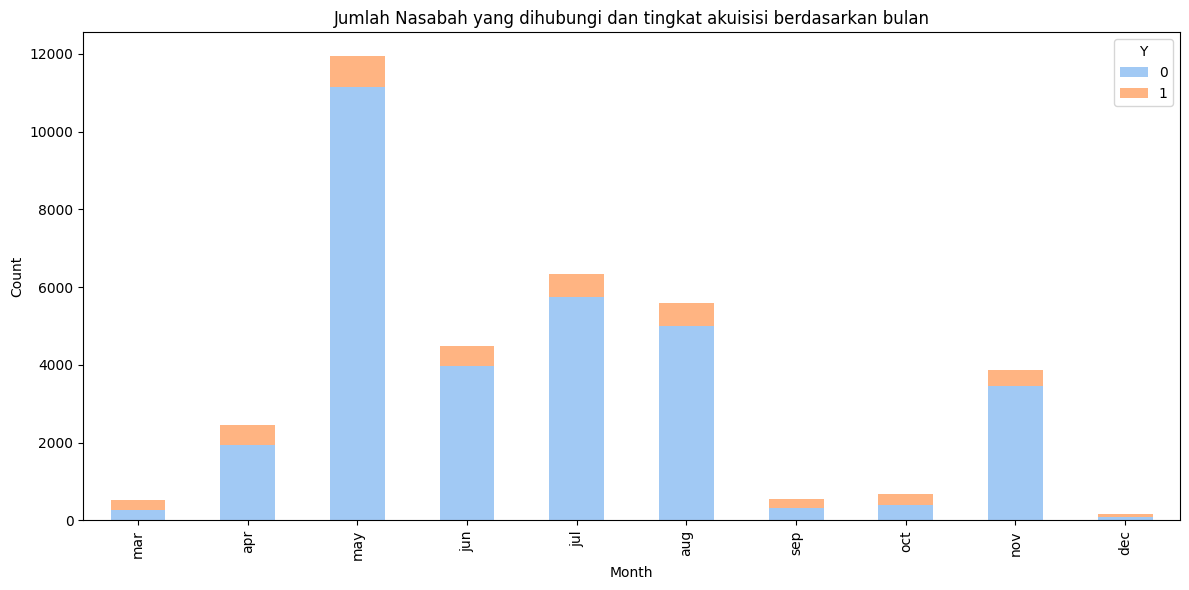

In [ ]:
plot_stacked_barplot_ordered(df_EDA, 'month', 'y')

In [ ]:
sorted_month_subs_rates

y month      0    1  total  CR(%class)  PR(%n)  not subscribe(%n)
0   mar    260  266    526       50.57    0.73               0.71
1   apr   1938  520   2458       21.16    1.42               5.29
2   may  11156  803  11959        6.71    2.19              30.43
3   jun   3978  517   4495       11.50    1.41              10.85
4   jul   5752  591   6343        9.32    1.61              15.69
5   aug   4988  610   5598       10.90    1.66              13.61
6   sep    305  243    548       44.34    0.66               0.83
7   oct    388  301    689       43.69    0.82               1.06
8   nov   3466  400   3866       10.35    1.09               9.45
9   dec     90   86    176       48.86    0.23               0.25

Berdasarkan analisis terhadap lima indikator ekonomi sebelumnya, terdapat pola yang dapat dimanfaatkan bank untuk mengoptimalkan tingkat konversi (*Conversion Rate, CR*) dalam penawaran deposito kepada nasabah, yakni:

**1. Tingkat Variasi Pekerjaan (Employment Variation Rate)**<br>
Saat tingkat variasi pekerjaan berada pada nilai negatif (misalnya **-1.8** atau lebih rendah), nasabah cenderung lebih khawatir dengan stabilitas ekonomi. Hal ini membuat mereka lebih memilih instrumen keuangan yang aman seperti deposito. Dalam situasi ketidakpastian ekonomi, deposito menawarkan kestabilan finansial yang menarik. Oleh karena itu, **bank disarankan untuk memprioritaskan kampanye deposito pada bulan-bulan di mana pasar tenaga kerja sedang mengalami tekanan**.

**2. Indeks Harga Konsumen (Consumer Price Index)**<br>
**Kondisi optimal terjadi ketika indeks harga konsumen stabil atau sedikit menurun** (misalnya antara **93.444 dan 92.431**). Pada kondisi ini, daya beli masyarakat tetap terjaga, sehingga mereka lebih terbuka untuk mempertimbangkan investasi jangka panjang seperti deposito. Sebaliknya, pada periode inflasi tinggi (misalnya bulan Mei), perhatian nasabah cenderung beralih ke kebutuhan konsumsi, sehingga kampanye deposito kurang efektif.

**3. Indeks Kepercayaan Konsumen (Consumer Confidence Index)**<br>
Saat indeks kepercayaan konsumen sangat rendah (seperti **-50.0 sampai -42.0**), nasabah lebih cenderung mencari investasi yang aman untuk melindungi aset mereka. Deposito menjadi pilihan menarik dalam situasi ini karena menawarkan risiko rendah dan pengembalian stabil. **Bank disarankan untuk meluncurkan kampanye deposito dengan menonjolkan aspek keamanan dan kestabilan di masa sentimen konsumen yang negatif**.

**4. Suku Bunga Euribor 3 Bulan (Euribor 3m)**<br>
Ketika suku bunga Euribor rendah (di bawah **1.0**), deposito menjadi lebih kompetitif dibandingkan instrumen keuangan lainnya **bold text** seperti tabungan atau obligasi. Hal ini disebabkan oleh tingkat pengembalian deposito yang stabil, meskipun suku bunga pasar menurun. Bank dapat menggunakan periode ini untuk memasarkan deposito sebagai alternatif investasi yang lebih menarik.

**5. Jumlah Pekerja (Number of Employed)**<br>
Ketika jumlah pekerja berada pada titik terendah (seperti **5099.1**), kekhawatiran akan ketidakpastian ekonomi meningkat. Dalam situasi ini, nasabah lebih cenderung memilih deposito sebagai langkah perlindungan finansial jangka panjang. **Bank disarankan untuk meningkatkan kampanye pada saat pasar tenaga kerja menunjukkan pelemahan**, dengan narasi yang menekankan keamanan deposito.

#### **Day_of_week**

In [ ]:
dayofweek_subs_rates = calculate_subscription_rates(df_EDA, 'day_of_week', 'y')
dayofweek_subs_rates

y day_of_week     0    1  total  CR(%class)  PR(%n)  not subscribe(%n)
2         thu  6746  977   7723       12.65    2.67              18.40
4         wed  6348  893   7241       12.33    2.44              17.32
3         tue  6282  887   7169       12.37    2.42              17.14
1         mon  6812  797   7609       10.47    2.17              18.58
0         fri  6133  783   6916       11.32    2.14              16.73

1. **Hari dengan Tingkat Keberhasilan Tertinggi (Subscribed %class)**:
  - Thursday (Kamis) memiliki tingkat keberhasilan tertinggi sebesar 12.65% di antara total panggilan pada hari tersebut.
  - Wednesday (Rabu) dan Tuesday (Selasa) mengikuti dengan tingkat keberhasilan yang sangat dekat, masing-masing sebesar 12.33% dan 12.37%.
2. **PR(%n)**:
Hari Thursday (Kamis) juga memiliki kontribusi tertinggi terhadap jumlah keseluruhan pelanggan yang berlangganan, yaitu 2.67%.
3. **Hari dengan Jumlah Panggilan Terbesar**: Monday (Senin) memiliki total panggilan terbesar (7609), namun tingkat keberhasilannya relatif lebih rendah (10.47%) dibandingkan hari lainnya.
Ini menunjukkan bahwa meskipun jumlah panggilan tinggi, strategi pada hari Senin mungkin perlu ditinjau ulang untuk meningkatkan tingkat keberhasilan.
4. **Hari dengan Peluang Peningkatan**: Friday (Jumat) memiliki tingkat keberhasilan yang lebih rendah dibandingkan hari lainnya (11.32%), namun kontribusinya terhadap total pelanggan yang tidak berlangganan juga relatif rendah (16.73%), sehingga ada potensi untuk meningkatkan hasil dengan strategi khusus.

Kemudian dilakukan analisis waktu ideal untuk menghubungi tiap target nasabah yang dituju yaitu Adult dengan profesi admin, technician dan blue collar.

In [ ]:
df_EDA_dow_adult_admin= df_EDA[(df_EDA['age_class']=='adult')&(df_EDA['job']=='admin.')]
df_EDA_dow_adult_admin = calculate_subscription_rates(df_EDA_dow_adult_admin, 'day_of_week', 'y')
df_EDA_dow_adult_admin

y day_of_week     0    1  total  CR(%class)  PR(%n)  not subscribe(%n)
2         thu   950  145   1095       13.24    2.71              17.73
4         wed   921  130   1051       12.37    2.43              17.19
3         tue   925  121   1046       11.57    2.26              17.27
1         mon  1018  108   1126        9.59    2.02              19.00
0         fri   934  105   1039       10.11    1.96              17.44

In [ ]:
df_EDA_dow_adult_tech= df_EDA[(df_EDA['age_class']=='adult')&(df_EDA['job']=='technician')]
df_EDA_dow_adult_tech = calculate_subscription_rates(df_EDA_dow_adult_tech, 'day_of_week', 'y')
df_EDA_dow_adult_tech

y day_of_week    0   1  total  CR(%class)  PR(%n)  not subscribe(%n)
3         tue  650  86    736       11.68    2.35              17.75
0         fri  578  78    656       11.89    2.13              15.79
2         thu  699  77    776        9.92    2.10              19.09
4         wed  643  76    719       10.57    2.08              17.56
1         mon  704  70    774        9.04    1.91              19.23

In [ ]:
df_EDA_dow_adult_bc= df_EDA[(df_EDA['age_class']=='adult')&(df_EDA['job']=='blue-collar')]
df_EDA_dow_adult_bc = calculate_subscription_rates(df_EDA_dow_adult_bc, 'day_of_week', 'y')
df_EDA_dow_adult_bc

y day_of_week    0   1  total  CR(%class)  PR(%n)  not subscribe(%n)
4         wed  866  73    939        7.77    1.72              20.43
2         thu  764  59    823        7.17    1.39              18.02
3         tue  776  57    833        6.84    1.34              18.31
0         fri  750  53    803        6.60    1.25              17.69
1         mon  799  42    841        4.99    0.99              18.85

**Rekomendasi hari**
1. **Admin:** Prioritaskan menghubungi pada Kamis untuk tingkat konversi tertinggi. Jika tidak memungkinkan, pilih hari Rabu atau Selasa sebagai alternatif yang cukup efektif.
2. **Teknisi (Technician):** Hari Selasa adalah waktu terbaik untuk menghubungi profesi ini. Alternatif lainnya adalah Jumat atau Rabu, yang menunjukkan performa cukup baik.
3. **Blue Collar:** Sama seperti teknisi, Selasa menjadi hari prioritas untuk menghubungi profesi ini. Alternatif lainnya adalah Jumat atau Rabu.
4. **Keseluruhan Profesi:** Kamis adalah hari terbaik untuk menghubungi berbagai profesi secara umum, terutama karena performanya konsisten tinggi di seluruh kelompok. Untuk profesi teknisi dan blue collar, hari Selasa juga patut dipertimbangkan karena performanya yang baik.

In [ ]:
dfaghdrsh

# Data Splitting

In [143]:
X = df.drop(columns = 'y')
y = df['y']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y # JANGAN SAMPAI LUPA UNTUK KLASIFIKASI di stratify
)

In [145]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29326, 20), (7332, 20), (29326,), (7332,))

# data preparation

1.  Marital, Default, Housing, Loan, Contact, Poutcome menggunakan encoding OneHotEncoder karena memiliki unique values dibawah 5
2. Job menggunakan encoding BinaryEncoder karena memiliki unique values di atas 5
3. Education, Month, Day of Week, Pdays mengunakan encoding OrdinalEncoder karena unique values memiliki tingkatan/urutan
4. Semua fitur numerik akan di scaller menggunakan Robust Scaller karena berdistribusi tidak normal

In [146]:
# menetukan urutan dari ['Education', 'Month', 'day_of_week', 'pdays']
ordinal_encoder = ce.OrdinalEncoder(
    cols=['education', 'month', 'day_of_week', 'pdays'],
    mapping = [
            {
            'col':'education',
            'mapping':  {
                        'illiterate':1,
                        'basic.4y':2,
                        'basic.6y':3,
                        'basic.9y':4,
                        'high.school':5,
                        'professional.course':6,
                        'university.degree':7
                        }},
            {
            'col':'month',
            'mapping':  {
                        'mar':1,
                        'apr':2,
                        'may':3,
                        'jun':4,
                        'jul':5,
                        'aug':6,
                        'sep':7,
                        'oct':8,
                        'nov':9,
                        'dec':10
                        }},
            {
            'col':'day_of_week',
            'mapping':  {
                        'mon':1,
                        'tue':2,
                        'wed':3,
                        'thu':4,
                        'fri':5,
                        }},
            {
            'col':'pdays',
            'mapping':  {
                        'not contacted':1,
                        '1 weeks':2,
                        '4 weeks':3,
                        '6 weeks':4
                        }
            }
        ]
)

# Fit dan transform data
X_train_encoded = ordinal_encoder.fit_transform(X_train)
X_test_encoded = ordinal_encoder.transform(X_test)

In [147]:
ordinal_map=[
            {
            'col':'education',
            'mapping':  {
                        'illiterate':1,
                        'basic.4y':2,
                        'basic.6y':3,
                        'basic.9y':4,
                        'high.school':5,
                        'professional.course':6,
                        'university.degree':7
                        }},
            {
            'col':'month',
            'mapping':  {
                        'mar':1,
                        'apr':2,
                        'may':3,
                        'jun':4,
                        'jul':5,
                        'aug':6,
                        'sep':7,
                        'oct':8,
                        'nov':9,
                        'dec':10
                        }},
            {
            'col':'day_of_week',
            'mapping':  {
                        'mon':1,
                        'tue':2,
                        'wed':3,
                        'thu':4,
                        'fri':5,
                        }},
            {
            'col':'pdays',
            'mapping':  {
                        'not contacted':1,
                        '1 weeks':2,
                        '4 weeks':3,
                        '6 weeks':4
                        }
            }
        ]


In [148]:
transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(drop = 'first',handle_unknown='ignore'), ['marital', 'default', 'housing', 'loan', 'contact', 'poutcome']),
    ('binary', ce.BinaryEncoder(), ['job']),
    ('ordinal', ce.OrdinalEncoder(mapping=ordinal_map,cols=['education', 'month', 'day_of_week', 'pdays']), ['education', 'month', 'day_of_week', 'pdays']),
    ('scaler', RobustScaler(), X_train.select_dtypes(include = 'number').columns)
], remainder = 'passthrough')
transformer


ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['marital', 'default', 'housing', 'loan',
                                  'contact', 'poutcome']),
                                ('binary', BinaryEncoder(), ['job']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['education', 'month',
                                                      'day_of_week', 'pdays'],
                                                mapping=[{'col': 'education',
                                                          'data_type': dtype('O'),
                                                          'mapping':...
                                                          'data_type': dtype('O'),
                                                          'mapping': mon    1
tue    2
wed    3
thu    4
fri    5
dtype: int64},
                                                         {'col': 'pdays',
                                                          'data_type': dtype('O'),
                                                          'mapping': not contacted    1
1 weeks          2
4 weeks          3
6 weeks          4
dtype: int64}]),
                                 ['education', 'month', 'day_of_week',
                                  'pdays']),
                                ('scaler', RobustScaler(),
                                 Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])

# **Modeling**

## Rule Based

Sebelumnya perusahaan telah mempunyai rule based dalam menentukan nasabah yang mempunyai kemungkinan untuk membuat deposito. Rule based ini ditentukan berdasarkan pekerjaan dan tidak ada credit ataupun hutang yang menunggak serta nasabah yang di campaign sebelumnya membuat deposito diyakini akan membuat deposito lagi pada campaign berikutnya

In [197]:
def rule_based_model(row):
    if row['poutcome'] == ['success']:
        return 1
    elif (row['job'] in ['technician','admin.','blue-collar']) and (row['default'] =='no') and (row['housing']=='no') and (row['loan']=='no') :
        return 1
    else:
        return 0

y_pred_train_rule_based_model = X_train.apply(rule_based_model, axis=1)
train_score_recall = recall_score(y_train, y_pred_train_rule_based_model)
train_score_precision = precision_score(y_train, y_pred_train_rule_based_model)

y_pred_test_rule_based_model = X_test.apply(rule_based_model, axis=1)
test_score_recall = recall_score(y_test, y_pred_test_rule_based_model)
test_score_precision = precision_score(y_test, y_pred_test_rule_based_model)

df0 = pd.DataFrame({
    'model': ['Rule Based'],
    'train_score_mean_recall': [train_score_recall],
    'train_score_mean_precision': [train_score_precision],
    'train_score_std_recall': [None],
    'test_score_recall': [test_score_recall],
    'test_score_precision': [test_score_precision],

})

df0

model  train_score_mean_recall  train_score_mean_precision  \
0  Rule Based                 0.211239                    0.112544   

  train_score_std_recall  test_score_recall  test_score_precision  
0                   None           0.205306              0.112161

Berdasakan tabel diatas dengan menggunakan rule base target kelas 1 (membuat deposito) yang berhasil diprediksi dengan benar hanya 21,12% dari dari 3470 kelas 1 pada data train dan 20,53% dari 867 kelas 1pada data tes. Tentunya hal ini dapat menyebabkan kerugian yang besar untuk perusahaan. Untuk itu pada tahap selanjutanya akan dilakukan modelling dengan menggunakan machine learning.

## Base Model

In [ ]:
lr = LogisticRegression(max_iter = 6000)
dt = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()

# voting
vc_hard = VotingClassifier([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
    ], voting = 'hard')
vc_soft = VotingClassifier([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
    ], voting = 'soft')

# stacking
base_model = ([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
])
meta_model = LogisticRegression()
stacking = StackingClassifier(base_model,meta_model)

# bagging
rf = RandomForestClassifier(random_state=0)

# boosting
gb = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)


In [151]:
train_score_list_recall = []
train_score_list_precision = []
train_score_std_list_recall = []
test_score_list_recall = []
test_score_list_precision = []


for i in [lr, dt, knn, vc_hard, vc_soft, stacking, rf, gb, xgb]:
    model = Pipeline([
        ('transformer', transformer),
        ('model', i)
    ])

    # Train model
    score_recall = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = 'recall')
    score_precision = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = 'precision')
       
    # menghitung mean recall dan precision score setiap split
    train_score_list_recall.append(score_recall.mean())
    train_score_list_precision.append(score_precision.mean())

    # menghitung standar deviasi recall
    train_score_std_list_recall.append(score_recall.std())

    # Prediksi
    model.fit(X_train, y_train)
    ypred_test = model.predict(X_test)

    # Evaluasi
    test_score_recall = recall_score(y_test, ypred_test)
    test_score_list_recall.append(test_score_recall)
    test_score_precision= precision_score(y_test, ypred_test)
    test_score_list_precision.append(test_score_precision)
    



In [152]:
df1 = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'KNN', 'VC Hard', 'VC Soft', 'Stacking', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'train_score_mean_recall': train_score_list_recall,
    'train_score_mean_precision': train_score_list_precision,
    'train_score_std_recall': train_score_std_list_recall,
    'test_score_recall': test_score_list_recall,
    'test_score_precision': test_score_list_precision}).sort_values(by = 'test_score_recall', ascending = False)
df1

model  train_score_mean_recall  train_score_mean_precision  \
8              XGBoost                 0.551585                    0.636099   
1        Decision Tree                 0.531700                    0.512748   
7    Gradient Boosting                 0.535735                    0.667747   
6        Random Forest                 0.508069                    0.644040   
4              VC Soft                 0.481268                    0.613132   
3              VC Hard                 0.433718                    0.647179   
5             Stacking                 0.432277                    0.666171   
2                  KNN                 0.398271                    0.570082   
0  Logistic Regression                 0.409798                    0.675657   

   train_score_std_recall  test_score_recall  test_score_precision  
8                0.022423           0.554787              0.613520  
1                0.025007           0.550173              0.500525  
7                0.019146           0.537486              0.638356  
6                0.022903           0.529412              0.633978  
4                0.017812           0.501730              0.587045  
3                0.014351           0.459054              0.618012  
5                0.020316           0.449827              0.633117  
2                0.018712           0.424452              0.586922  
0                0.010729           0.402537              0.615520

Insight:
Dari beberapa based model Machine Learning yang telah diaplikasikan pada experiment ini diperoleh bahwa XGBoost memiliki nilai recall dan precision yang lebih bagus.

## Experiment 1: Remove Outlier based on IQR

Pada experiment ini, semua outliers yang ada pada data train akan di takeout. Kemudian machine akan mempelajari data train yang sudah tidak ada outliers dan model yang diperoleh akan tetap di testing pada data tes yang sama dengan experiment sebelumnya

In [153]:
def hapus_outliers(numerik, target):
    variabel_target = target
    for setiap_kolom in numerik.drop(columns = variabel_target).select_dtypes(include='number').columns:
        q3 = numerik[setiap_kolom].quantile(0.75)
        q1 = numerik[setiap_kolom].quantile(0.25)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr

        # pembersihan data dari outliers
        numerik = numerik[(numerik[setiap_kolom] <= upper_bound) & (numerik[setiap_kolom] >= lower_bound)]

    return numerik

In [154]:
df_train=pd.concat([X_train,y_train],axis=1)
df_train

age            job   marital            education default housing loan  \
4492    33     management   married  professional.course      no      no   no   
3644    29   entrepreneur   married             basic.6y      no      no   no   
15382   36    blue-collar   married             basic.9y      no     yes   no   
10161   36  self-employed  divorced    university.degree      no     yes   no   
39745   36         admin.   married    university.degree      no     yes  yes   
...    ...            ...       ...                  ...     ...     ...  ...   
10770   42     unemployed   married  professional.course      no     yes   no   
8231    35    blue-collar   married             basic.9y      no     yes   no   
16920   30         admin.    single    university.degree      no     yes   no   
19707   48    blue-collar   married             basic.4y      no      no  yes   
21796   32      housemaid   married    university.degree      no     yes  yes   

         contact month day_of_week  duration  campaign          pdays  \
4492   telephone   may         tue       282         2  not contacted   
3644   telephone   may         fri       217         2  not contacted   
15382   cellular   jul         fri       225         1  not contacted   
10161  telephone   jun         thu       130         2  not contacted   
39745   cellular   may         thu      1178         1        2 weeks   
...          ...   ...         ...       ...       ...            ...   
10770  telephone   jun         tue        88         2  not contacted   
8231   telephone   jun         tue       126         4  not contacted   
16920   cellular   jul         thu       873         8  not contacted   
19707   cellular   aug         thu        96         3  not contacted   
21796   cellular   aug         wed        73         1  not contacted   

       previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  \
4492          0  nonexistent           1.1          93.994          -36.4   
3644          0  nonexistent           1.1          93.994          -36.4   
15382         0  nonexistent           1.4          93.918          -42.7   
10161         0  nonexistent           1.4          94.465          -41.8   
39745         2      success          -1.8          93.876          -40.0   
...         ...          ...           ...             ...            ...   
10770         0  nonexistent           1.4          94.465          -41.8   
8231          0  nonexistent           1.4          94.465          -41.8   
16920         0  nonexistent           1.4          93.918          -42.7   
19707         0  nonexistent           1.4          93.444          -36.1   
21796         0  nonexistent           1.4          93.444          -36.1   

       euribor3m  nr.employed  y  
4492       4.856       5191.0  0  
3644       4.859       5191.0  0  
15382      4.957       5228.1  0  
10161      4.958       5228.1  0  
39745      0.699       5008.7  1  
...          ...          ... ..  
10770      4.961       5228.1  0  
8231       4.864       5228.1  0  
16920      4.962       5228.1  1  
19707      4.968       5228.1  0  
21796      4.964       5228.1  0  

[29326 rows x 21 columns]

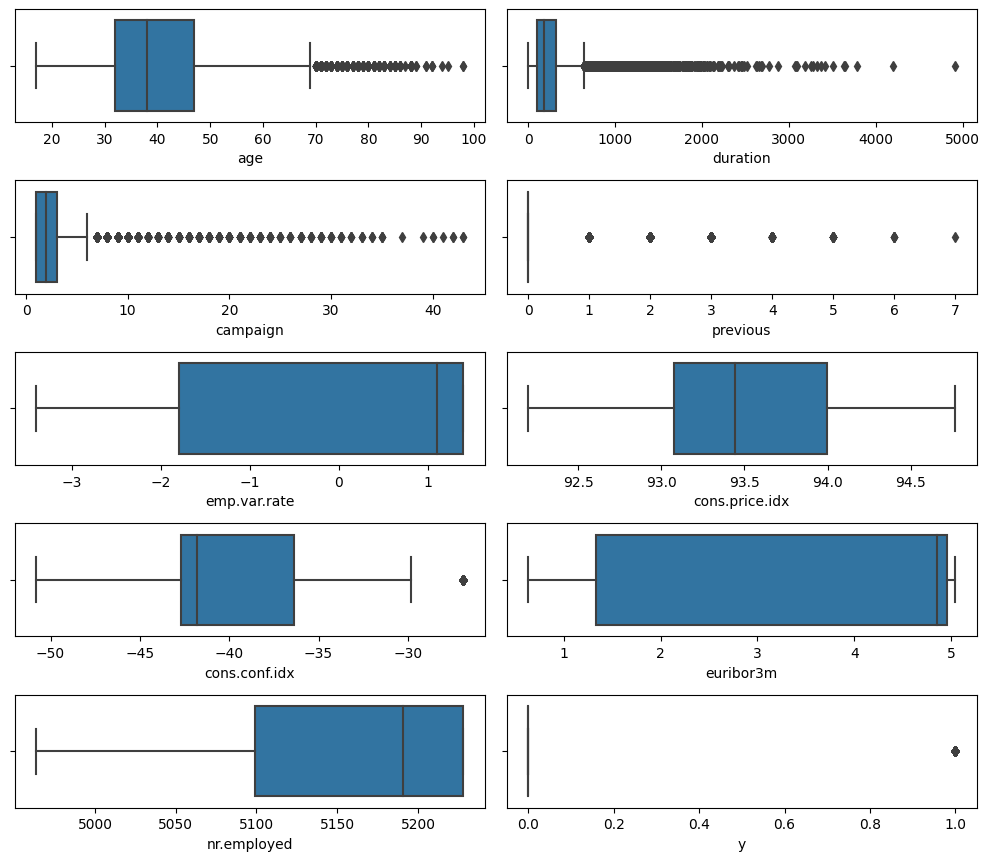

In [155]:
numerik = df.select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(6,2,posisi)
    sns.boxplot(x = df[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

In [156]:
df_without_outliers = hapus_outliers(df_train, 'y')
df_without_outliers['y'].value_counts()

y
0    20249
1     1255
Name: count, dtype: int64

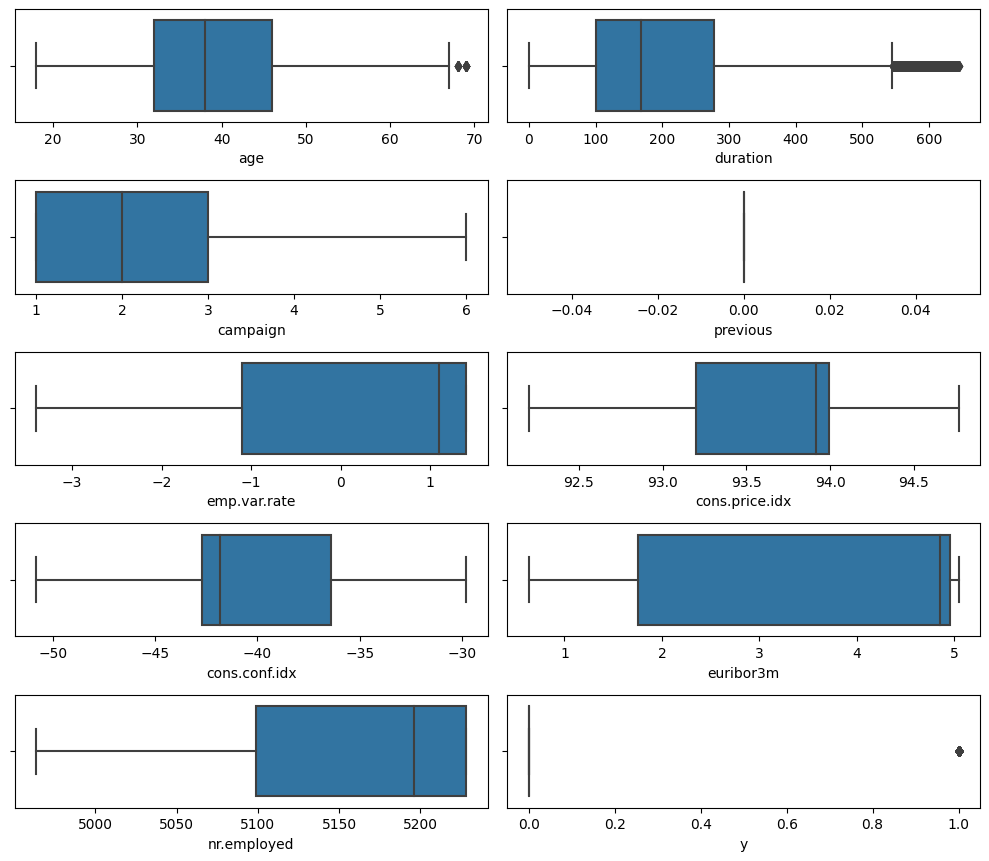

In [157]:
numerik = df_without_outliers.select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(6,2,posisi)
    sns.boxplot(x = df_without_outliers[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

In [158]:
X_train_no_outliers = df_without_outliers.drop(columns = 'y')
y_train_no_outliers = df_without_outliers['y']

In [159]:
X_train_no_outliers.shape, X_test.shape, y_train_no_outliers.shape, y_test.shape

((21504, 20), (7332, 20), (21504,), (7332,))

In [160]:
train_score_list_recall = []
train_score_list_precision = []
train_score_std_list_recall = []
test_score_list_recall = []
test_score_list_precision = []

for i in [lr, dt, knn, vc_hard, vc_soft, stacking, rf, gb, xgb]:
    model = Pipeline([
        ('transformer', transformer),
        ('model', i)
    ])

    # Train model
    score_recall = cross_val_score(model, X_train_no_outliers, y_train_no_outliers, cv = StratifiedKFold(n_splits = 5), scoring = 'recall')
    score_precision = cross_val_score(model, X_train_no_outliers, y_train_no_outliers, cv = StratifiedKFold(n_splits = 5), scoring = 'precision')

    # menghitung mean recall dan precission score setiap split
    train_score_list_recall.append(score_recall.mean())
    train_score_list_precision.append(score_precision.mean())

    # menghitung standar deviasi
    train_score_std_list_recall.append(score_recall.std())

    # Prediksi
    model.fit(X_train_no_outliers, y_train_no_outliers)
    ypred_test_no_outliers = model.predict(X_test)

    # Evaluasi
    test_score_recall = recall_score(y_test, ypred_test_no_outliers)
    test_score_list_recall.append(test_score_recall)
    test_score_precision= precision_score(y_test, ypred_test_no_outliers)
    test_score_list_precision.append(test_score_precision)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unk

In [161]:
df2 = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'KNN', 'VC Hard', 'VC Soft', 'Stacking', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'train_score_mean_recall': train_score_list_recall,
    'train_score_mean_precision': train_score_list_precision,
    'train_score_std_recall': train_score_std_list_recall,
    'test_score_recall': test_score_list_recall,
    'test_score_precision': test_score_list_precision}).sort_values(by = 'test_score_recall', ascending = False)
df2

model  train_score_mean_recall  train_score_mean_precision  \
0  Logistic Regression                 0.223108                    0.561158   
5             Stacking                 0.249402                    0.567012   
1        Decision Tree                 0.407171                    0.362615   
8              XGBoost                 0.369721                    0.535257   
4              VC Soft                 0.277291                    0.488138   
7    Gradient Boosting                 0.336255                    0.580174   
3              VC Hard                 0.220717                    0.564836   
6        Random Forest                 0.299602                    0.585995   
2                  KNN                 0.214343                    0.498519   

   train_score_std_recall  test_score_recall  test_score_precision  
0                0.021676           0.455594              0.550907  
5                0.033485           0.427912              0.569018  
1                0.028663           0.415225              0.484522  
8                0.008126           0.384083              0.595707  
4                0.031330           0.365629              0.585952  
7                0.025398           0.354095              0.612774  
3                0.029233           0.335640              0.607516  
6                0.022873           0.319493              0.636782  
2                0.020991           0.288351              0.564334

Insight:
Dari experiment menghapus outliers ternyata akurasi yang diperoleh menurun lumayan signifikan dibandingkan dengan mempertahankan outliers. Hal ini bisa saja terjadi karena dengan menghapus outlier berdasarkan IQR menyebabkan banyak informasi yang terbuang sehingga model & akurasi score yang diperoleh kurang baik. Oleh karena itu pada experiment berikutnya data outliers akan tetap dipertahankan

## Experiment 2: Without Multikolinieritas Feature

Dalam experiment ini, fitur-fitur yang memiliki nilai VIF yang tinggi (fitur-fitur yang memiliki multikolinieritas yang tinggi dengan beberapa fitur lain) dihapus untuk melihat apakah ada perbedaan dengan mempertahankannya

In [162]:
X_train_VIF= X_train.drop(columns=['nr.employed','cons.price.idx','euribor3m','cons.conf.idx'])
X_test_VIF=X_test.drop(columns=['nr.employed','cons.price.idx','euribor3m','cons.conf.idx'])


X_train_VIF.shape, X_test_VIF.shape, y_train.shape, y_test.shape

((29326, 16), (7332, 16), (29326,), (7332,))

In [163]:
transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(drop = 'first'), ['marital', 'default', 'housing', 'loan', 'contact', 'poutcome']),
    ('binary', ce.BinaryEncoder(), ['job']),
    ('ordinal', ce.OrdinalEncoder(mapping=ordinal_map,cols=['education', 'month', 'day_of_week', 'pdays']), ['education', 'month', 'day_of_week', 'pdays']),
    ('scaler', RobustScaler(), X_train_VIF.select_dtypes(include = 'number').columns)
], remainder = 'passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot', OneHotEncoder(drop='first'),
                                 ['marital', 'default', 'housing', 'loan',
                                  'contact', 'poutcome']),
                                ('binary', BinaryEncoder(), ['job']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['education', 'month',
                                                      'day_of_week', 'pdays'],
                                                mapping=[{'col': 'education',
                                                          'data_type': dtype('O'),
                                                          'mapping': illiterate             1
basic.4y               2
basi...
dec    10
dtype: int64},
                                                         {'col': 'day_of_week',
                                                          'data_type': dtype('O'),
                                                          'mapping': mon    1
tue    2
wed    3
thu    4
fri    5
dtype: int64},
                                                         {'col': 'pdays',
                                                          'data_type': dtype('O'),
                                                          'mapping': not contacted    1
1 weeks          2
4 weeks          3
6 weeks          4
dtype: int64}]),
                                 ['education', 'month', 'day_of_week',
                                  'pdays']),
                                ('scaler', RobustScaler(),
                                 Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate'], dtype='object'))])

In [164]:
train_score_list_recall = []
train_score_list_precision = []
train_score_std_list_recall = []
test_score_list_recall = []
test_score_list_precision = []


for i in [lr, dt, knn, vc_hard, vc_soft, stacking, rf, gb, xgb]:
    model = Pipeline([
        ('transformer', transformer),
        ('model', i)
    ])

    # Train model
    score_recall = cross_val_score(model, X_train_VIF, y_train, cv = StratifiedKFold(n_splits = 5), scoring = 'recall')
    score_precision = cross_val_score(model, X_train_VIF, y_train, cv = StratifiedKFold(n_splits = 5), scoring = 'precision')
    
    # menghitung mean recall dan precission score setiap split
    train_score_list_recall.append(score_recall.mean())
    train_score_list_precision.append(score_precision.mean())

    # menghitung standar deviasi
    train_score_std_list_recall.append(score_recall.std())

    # Prediksi
    model.fit(X_train_VIF, y_train)
    ypred_test_VIF = model.predict(X_test_VIF)

    # Evaluasi
    test_score_recall = recall_score(y_test, ypred_test_VIF)
    test_score_list_recall.append(test_score_recall)
    test_score_precision= precision_score(y_test, ypred_test_VIF)
    test_score_list_precision.append(test_score_precision)

In [165]:
df3 = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'KNN', 'VC Hard', 'VC Soft', 'Stacking', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'train_score_mean_recall': train_score_list_recall,
    'train_score_mean_precision': train_score_list_precision,
    'train_score_std_recall': train_score_std_list_recall,
    'test_score_recall': test_score_list_recall,
    'test_score_precision': test_score_list_precision}).sort_values(by = 'test_score_recall', ascending = False)
df3

model  train_score_mean_recall  train_score_mean_precision  \
8              XGBoost                 0.527089                    0.631882   
1        Decision Tree                 0.495389                    0.478316   
7    Gradient Boosting                 0.479827                    0.654309   
6        Random Forest                 0.455331                    0.643560   
4              VC Soft                 0.431124                    0.588461   
5             Stacking                 0.397406                    0.652353   
3              VC Hard                 0.384726                    0.635558   
0  Logistic Regression                 0.382421                    0.662292   
2                  KNN                 0.346398                    0.574913   

   train_score_std_recall  test_score_recall  test_score_precision  
8                0.017229           0.530565              0.602883  
1                0.024153           0.515571              0.481681  
7                0.013911           0.497116              0.622832  
6                0.012562           0.453287              0.614062  
4                0.019081           0.444060              0.573770  
5                0.025943           0.389850              0.603571  
3                0.019181           0.386390              0.605787  
0                0.013535           0.369089              0.615385  
2                0.017591           0.346021              0.568182

Insight:
Akurasi yang diperoleh dari experiment ini lumayan bagus, namun akurasi dari experiment base model masih lebih baik

## Experiment 3: Resampling for Balancing

Karena kondisi variable target mengalami imbalanced dimana proporsi dari variable target yang memiliki selisih yang sangat jauh maka pada experiment ini akan diterapkan metode resampling for imbalanced untuk menyeimbangkan jumlah kelas 0 dan kelas 1. Metode yang digunakan ada 2 yaitu under sampling dan over samping

In [166]:
# Definisikan Resampler Undersampling
ncr = NeighbourhoodCleaningRule()
nm3 = NearMiss(version= 3)

# Definisikan Resampler Oversampling
smote = SMOTE()
adasyn = ADASYN()

### Under Sampling

Undersampling merupakan teknik untuk menurunkan jumlah majority class sebanyak jumlah minority class. Ada 2 metode yang digunakan dalam modelling ini yaitu
a.	Neighbour cleaning rule (NCR)
    Melibatkan algoritma k-Nearest Neighbors (k-NN) untuk menghapus sample-sample yang terlalu dekat dengan kelas minoritas
b.	Nearmiss 3 (NM3)
    Menjaga keseimbangan antara Nearmiss 1 dan Nearmiss 2 dengan memilih sample yang memiliki jarak minimum dan maksimum ke sampel kelas minoritas


In [167]:
train_score_list_recall = []
train_score_list_precision = []
train_score_std_list_recall = []
test_score_list_recall = []
test_score_list_precision = []

for resampler in [ncr,nm3]:
    for i in [lr, dt, knn, vc_hard, vc_soft, stacking, rf, gb, xgb]:
        model = Pipeline([
            ('transformer', transformer),
            ('balencing', resampler),
            ('model', i)
        ])
        # Train model
        score_recall = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = 'recall')
        score_precision = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = 'precision')
 

        # menghitung mean recall dan precision score setiap split
        train_score_list_recall.append(score_recall.mean())
        train_score_list_precision.append(score_precision.mean())

        # menghitung standar deviasi
        train_score_std_list_recall.append(score_recall.std())

        # Prediksi
        model.fit(X_train, y_train)
        ypred_test = model.predict(X_test)

        # Evaluasi
        test_score_recall = recall_score(y_test, ypred_test)
        test_score_list_recall.append(test_score_recall)
        test_score_precision= precision_score(y_test, ypred_test)
        test_score_list_precision.append(test_score_precision)

In [168]:
resampler=['NCR','NM3']
model=['Logistic Regression', 'Decision Tree', 'KNN', 'VC Hard', 'VC Soft', 'Stacking', 'Random Forest', 'Gradient Boosting', 'XGBoost']

df4 = pd.DataFrame({
    'model': [i+" - "+j for i in resampler for j in model],
    'train_score_mean_recall': train_score_list_recall,
    'train_score_mean_precision': train_score_list_precision,
    'train_score_std_recall': train_score_std_list_recall,
    'test_score_recall': test_score_list_recall,
    'test_score_precision': test_score_list_precision}).sort_values(by = 'test_score_recall', ascending = False)
df4

model  train_score_mean_recall  \
6         NCR - Random Forest                 0.772334   
8               NCR - XGBoost                 0.770605   
7     NCR - Gradient Boosting                 0.760807   
16    NM3 - Gradient Boosting                 0.757349   
4               NCR - VC Soft                 0.719020   
17              NM3 - XGBoost                 0.707205   
15        NM3 - Random Forest                 0.703458   
3               NCR - VC Hard                 0.710086   
5              NCR - Stacking                 0.714121   
2                   NCR - KNN                 0.684726   
1         NCR - Decision Tree                 0.720749   
0   NCR - Logistic Regression                 0.657349   
12              NM3 - VC Hard                 0.636311   
11                  NM3 - KNN                 0.613833   
13              NM3 - VC Soft                 0.634294   
9   NM3 - Logistic Regression                 0.609798   
10        NM3 - Decision Tree                 0.614409   
14             NM3 - Stacking                 0.602882   

    train_score_mean_precision  train_score_std_recall  test_score_recall  \
6                     0.559939                0.022637           0.782007   
8                     0.552307                0.018075           0.770473   
7                     0.572116                0.019181           0.764706   
16                    0.542260                0.013899           0.755479   
4                     0.547443                0.019460           0.728950   
17                    0.501715                0.007426           0.726644   
15                    0.518963                0.018884           0.726644   
3                     0.559011                0.017633           0.725490   
5                     0.546686                0.013162           0.719723   
2                     0.507676                0.025572           0.708189   
1                     0.503273                0.017610           0.704729   
0                     0.569226                0.009790           0.672434   
12                    0.497563                0.018399           0.651672   
11                    0.368614                0.016829           0.640138   
13                    0.409675                0.021496           0.636678   
9                     0.555520                0.019426           0.606690   
10                    0.297918                0.024139           0.604383   
14                    0.522387                0.022593           0.581315   

    test_score_precision  
6               0.529687  
8               0.531847  
7               0.542110  
16              0.528652  
4               0.521452  
17              0.504808  
15              0.526316  
3               0.539451  
5               0.515702  
2               0.500816  
1               0.470000  
0               0.554183  
12              0.504464  
11              0.386760  
13              0.405286  
9               0.532928  
10              0.253630  
14              0.487427

Insight:
Dari experiment ini diperoleh model yang memiliki nilai recall dan precision yang tinggi dihasilkan dari kombinasi resampling Neighbour cleaning rule (NCR) dengan model Random Forest

### Over Sampling

Oversampling merupakan teknik untuk meningkatkan jumlah minority class sebanyak jumlah majority class. Ada 2 metode yang akan digunakan dam modelling ini yaitu:
a.	SMOTE bekerja dengan cara mengambil secara acak tetangga terdekat sebanyak k dari setiap instance dalam kelas   minoritas kemudian membuat instance baru (sintetis) antara instance tersebut dengan tetangga terdekat k yang dipilih secara acak. 
b.	ADASYN bekerja dengan cara menggunakan bobot distribusi untuk instance pada kelas minoritas berdasarkan pada tingkat kesulitan pembelajaran data oleh model, di mana instance baru (sintetis) dihasilkan dari kelas minoritas yang susah untuk belajar dibandingkan dengan data minoritas yang lebih mudah untuk belajar


In [275]:
train_score_list_recall = []
train_score_list_precision = []
train_score_std_list_recall = []
test_score_list_recall = []
test_score_list_precision = []

for resampler in [smote,adasyn]:
    for i in [lr, dt, knn, vc_hard, vc_soft, stacking, rf, gb, xgb]:
        model = Pipeline([
            ('transformer', transformer),
            ('balencing', resampler),
            ('model', i)
        ])
        # Train model
        score_recall = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = 'recall')
        score_precision = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = 'precision')

        # menghitung mean recall dan precision score setiap split
        train_score_list_recall.append(score_recall.mean())
        train_score_list_precision.append(score_precision.mean())

        # menghitung standar deviasi
        train_score_std_list_recall.append(score_recall.std())

        # Prediksi
        model.fit(X_train, y_train)
        ypred_test = model.predict(X_test)

        # Evaluasi
        test_score_recall = recall_score(y_test, ypred_test)
        test_score_list_recall.append(test_score_recall)
        test_score_precision= precision_score(y_test, ypred_test)
        test_score_list_precision.append(test_score_precision)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [276]:
resampler=['Smote', 'Adasyn']
model=['Logistic Regression', 'Decision Tree', 'KNN', 'VC Hard', 'VC Soft', 'Stacking', 'Random Forest', 'Gradient Boosting', 'XGBoost']

df5 = pd.DataFrame({
    'model': [i+" - "+j for i in resampler for j in model],
    'train_score_mean_recall': train_score_list_recall,
    'train_score_mean_precision': train_score_list_precision,
    'train_score_std_recall': train_score_std_list_recall,
    'test_score_recall': test_score_list_recall,
    'test_score_precision': test_score_list_precision}).sort_values(by = 'test_score_recall', ascending = False)
df5

model  train_score_mean_recall  \
9   Adasyn - Logistic Regression                 0.872911   
12              Adasyn - VC Hard                 0.826225   
0    Smote - Logistic Regression                 0.846398   
11                  Adasyn - KNN                 0.810086   
3                Smote - VC Hard                 0.807205   
2                    Smote - KNN                 0.804035   
13              Adasyn - VC Soft                 0.781556   
4                Smote - VC Soft                 0.772046   
16    Adasyn - Gradient Boosting                 0.759366   
7      Smote - Gradient Boosting                 0.749568   
14             Adasyn - Stacking                 0.659366   
6          Smote - Random Forest                 0.639193   
15        Adasyn - Random Forest                 0.618732   
8                Smote - XGBoost                 0.584438   
17              Adasyn - XGBoost                 0.583573   
5               Smote - Stacking                 0.586744   
1          Smote - Decision Tree                 0.566859   
10        Adasyn - Decision Tree                 0.574928   

    train_score_mean_precision  train_score_std_recall  test_score_recall  \
9                     0.421355                0.004682           0.898501   
12                    0.465974                0.006795           0.856978   
0                     0.442151                0.007325           0.851211   
11                    0.404949                0.013952           0.823529   
3                     0.481126                0.006783           0.822376   
2                     0.414690                0.013578           0.807382   
13                    0.488831                0.005361           0.800461   
4                     0.500726                0.010798           0.786621   
16                    0.535413                0.027034           0.777393   
7                     0.549023                0.021974           0.773933   
14                    0.477097                0.014712           0.665513   
6                     0.589677                0.025624           0.656286   
15                    0.582466                0.027741           0.652826   
8                     0.616726                0.020512           0.614764   
17                    0.620184                0.032117           0.610150   
5                     0.500955                0.015636           0.600923   
1                     0.496157                0.022703           0.566321   
10                    0.480822                0.012429           0.535179   

    test_score_precision  
9               0.417247  
12              0.466709  
0               0.437204  
11              0.404533  
3               0.475968  
2               0.419162  
13              0.484299  
4               0.500000  
16              0.510993  
7               0.526275  
14              0.484467  
6               0.578252  
15              0.575788  
8               0.617613  
17              0.610150  
5               0.500000  
1               0.474396  
10              0.459406

Pada experimet ini, kombinasi resampling Adasyn dengan model Logistic Regression memang mempunyai nilai recall yang tinggi hingga 87,2911% pada data train dan 89,8501% pada data test. Namun  nilai precission yang diperoleh tidak lebih baik dari pada experiment dengan under sampling. Karena tujuan dari modelling ini juga ingin menekan cost yang dikeluarkan oleh perusahaan maka diputuskan untuk menggunakan model kombinassi resampling dengan NCR dengan model random forest

## Experiment 4: Resampling with Feature Selection

Feature selection digunakan untuk memilih sebagian atau subset dari fitur atau variabel yang digunakan dalam suatu dataset. Proses ini dilakukan untuk mengurangi noise atau data dari variabel atau fitur yang kurang relevan untuk mendapatkan hasil atau performa yang lebih baik dan juga efisiensi komputasi

### Backward (RFE)

Dalam metode backward, awalnya digunakan seluruh fitur yang ada lalu akan dikeluarkan satu per satu fitur yang kurang penting hingga tersisa jumlah fitur yang telah ditentukan. Dalam scikit learn, kita dapat terapkan metode ini menggunakan function RFE (Recursive Feature Selection).

In [171]:
train_score_list_recall = []
train_score_list_precision = []
train_score_std_list_recall = []
test_score_list_recall = []
test_score_list_precision = []

for i in range (1,20):
    pipeline_model = Pipeline([
        ('transformer', transformer),
        ('selector', RFE(estimator=rf, n_features_to_select = i)),
        ('model', rf)
    ])

    pipeline_model.fit(X_train, y_train)

    # Train model using the pipeline
    score_recall = cross_val_score(pipeline_model, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='recall')
    score_precision = cross_val_score(pipeline_model, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='precision')

    # Calculate mean recall/precision for each split
    train_score_list_recall.append(score_recall.mean())
    train_score_list_precision.append(score_precision.mean())

    # Calculate standard deviation
    train_score_std_list_recall.append(score_recall.std())

    # Prediction using the pipeline (complete this part)
    y_pred = pipeline_model.predict(X_test)

    # Evaluate on test data (add metrics as needed)
    test_score_recall = recall_score(y_test, y_pred)
    test_score_precision = precision_score(y_test, y_pred)
    test_score_list_recall.append(test_score_recall)
    test_score_list_precision.append(test_score_precision)



In [172]:
df6 = pd.DataFrame({
    'k':np.arange(1,20),
    'model': ['RF_'+str(i)+'Feature' for i in range(1,20)],
    'train_score_mean_recall': train_score_list_recall,
    'train_score_mean_precision': train_score_list_precision,
    'train_score_std_recall': train_score_std_list_recall,
    'test_score_recall': test_score_list_recall,
    'test_score_precision': test_score_list_precision})
df6

k         model  train_score_mean_recall  train_score_mean_precision  \
0    1   RF_1Feature                 0.195965                    0.511555   
1    2   RF_2Feature                 0.504323                    0.551554   
2    3   RF_3Feature                 0.505187                    0.591719   
3    4   RF_4Feature                 0.535735                    0.592898   
4    5   RF_5Feature                 0.534582                    0.606580   
5    6   RF_6Feature                 0.538329                    0.609535   
6    7   RF_7Feature                 0.534006                    0.620384   
7    8   RF_8Feature                 0.517579                    0.615811   
8    9   RF_9Feature                 0.547262                    0.638030   
9   10  RF_10Feature                 0.548703                    0.636700   
10  11  RF_11Feature                 0.542651                    0.640030   
11  12  RF_12Feature                 0.534870                    0.634300   
12  13  RF_13Feature                 0.531412                    0.640532   
13  14  RF_14Feature                 0.534294                    0.645301   
14  15  RF_15Feature                 0.516715                    0.645462   
15  16  RF_16Feature                 0.527954                    0.642779   
16  17  RF_17Feature                 0.523055                    0.643773   
17  18  RF_18Feature                 0.520173                    0.645672   
18  19  RF_19Feature                 0.512104                    0.646280   

    train_score_std_recall  test_score_recall  test_score_precision  
0                 0.019353           0.194925              0.510574  
1                 0.011599           0.513264              0.525384  
2                 0.025770           0.535179              0.579276  
3                 0.013313           0.542099              0.573171  
4                 0.019267           0.547866              0.577859  
5                 0.018217           0.542099              0.600255  
6                 0.021731           0.557093              0.602996  
7                 0.022312           0.527105              0.598952  
8                 0.019954           0.550173              0.608418  
9                 0.014564           0.542099              0.605670  
10                0.015535           0.554787              0.615877  
11                0.018552           0.550173              0.618677  
12                0.019168           0.555940              0.617157  
13                0.018708           0.529412              0.614458  
14                0.015509           0.520185              0.608637  
15                0.021731           0.544406              0.621053  
16                0.019375           0.557093              0.627273  
17                0.019181           0.534025              0.621477  
18                0.015983           0.537486              0.618037

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

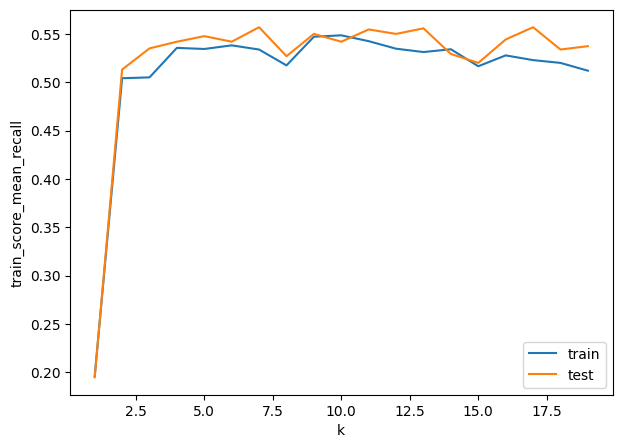

In [173]:
plt.figure(figsize = (7,5))
sns.lineplot(data = df6, x = 'k', y = 'train_score_mean_recall', label = 'train')
sns.lineplot(data = df6, x = 'k', y = 'test_score_recall', label = 'test')
plt.legend()

Insight:
Dari hasil eksperimen dan grafik di atas dapat disimpulkan bahwa jumlah kombinasi feature berdasarkan metode backward yang memiliki nilai recall yang baik adalah 9 fitur. Ketika jumlah fitur diatas 9 akurasi dari data train dan data tes sudah tidak konvergen lagi

# Hasil Eksperimen

In [277]:
df0['eksperimen'] = 'Rule Based'
df1['eksperimen'] = 'Based Model'
df2['eksperimen'] = 'Without Outliers'
df3['eksperimen'] = 'Multikolinearitas'
df4['eksperimen'] = 'Resampling for Balancing (Under Sampling)'
df5['eksperimen'] = 'Resampling for Balancing (Over Sampling)'
df6['eksperimen'] = 'Resampling with Feature Selection Backward'


# penggabungan semua df score
df_gab = pd.concat([df0,df1, df2,df3,df4,df5,df6], axis = 0)
df_gab = df_gab.set_index(['eksperimen','model'])

# highlight ke score terbaik
df_gab.style.highlight_max(subset = ['train_score_mean_recall','test_score_recall'],color = 'lightgreen', axis = 0)


C:\Users\User\AppData\Local\Temp\ipykernel_16100\237452945.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_gab = pd.concat([df0,df1, df2,df3,df4,df5,df6], axis = 0)


Dari Tabel di atas diperoleh model terbaik berdasarkan score recall adalah Logistic Regression dengan Resampling Backwards & Adsyn sekitar 87% untuk data train dan 89% untuk data test. Namun hasil score precision yang diperoleh tidak sebaik score recall yaitu 42% untuk data train dan 41% untuk data tes. Hal ini mengindikasikan bahwa 58-59% yang diprediksi kelas 1 sebenarnya adalah kelas 0. Sementara goals dari modelling ini selain meningkatkan jumlah nasabah, perusahaan juga ingin menekan cost yang dikeluarkan seperti biaya operasional, tagiahn telephone dan yang lainnya. Dengan pertimbangan ini maka diputuskan model yang digunakan adalah NCR - Random Forest dengan recall 78% dan precision 52%


# Final Model

Dari experiment bacward diperoleh 9 feature sudah cukup untuk membentuk model yang baik maka pada final model feature yang digunakan hanya 9 saja untuk efisiensi dalam komputasi

In [203]:
best_model = Pipeline([
    ('transformer', transformer),
    ('selector', RFE(estimator=rf, n_features_to_select = 9)),
    ('resampler',ncr),
    ('model', rf)
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['education',
                                                                       'month',
                                                                       'day_of_week',
                                                                       'pdays'],
                                                                 mapping=[{'col': 'education',
                                                                           'data_type': dtype('O'),
                                                                           'ma...
6 weeks          4
dtype: int64}]),
                                                  ['education', 'month',
                                                   'day_of_week', 'pdays']),
                                                 ('scaler', RobustScaler(),
                                                  Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate'], dtype='object'))])),
                ('selector',
                 RFE(estimator=RandomForestClassifier(random_state=0),
                     n_features_to_select=9)),
                ('resampler', NeighbourhoodCleaningRule()),
                ('model', RandomForestClassifier(random_state=0))])

# Hasil Eksperimen

In [204]:
y_pred = best_model.predict(X_test)
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.7889273356401384
0.5285935085007728


## Hyperparameter Tunning

In [226]:
# Kedalaman pohon
max_depth = [2,4,6,8,10,12,None]



# Jumlah pohon
n_estimators = [100,120,140,150]


# Boostrap
max_features=['sqrt', 'log2', None]



# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__n_estimators': n_estimators,
    'model__max_features': max_features

}

In [227]:
from sklearn.model_selection import RandomizedSearchCV
# Benchmark model dengan hyperparameter tuning
xgb = XGBClassifier(random_state=0)

# Membuat algorithm chains
pipeline_model = Pipeline([
        ('transformer', transformer),
        ('selector', RFE(estimator=rf, n_features_to_select = 5)),
        ('resampler',ncr),
        ('model', rf)
    ])


# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator=pipeline_model,
    param_distributions = hyperparam_space_xgb,
    n_iter = 200,
    cv = StratifiedKFold(5),
    scoring = 'recall',
    n_jobs = -1,
    random_state = 0,
    verbose = 3
)

In [228]:
random_rf.fit(X_train, y_train)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 84 is smaller than n_iter=200. Running 84 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 84 candidates, totalling 420 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['marital',
                                                                                'default',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'poutcome']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['job']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['ed...
                                              RFE(estimator=RandomForestClassifier(random_state=0),
                                                  n_features_to_select=5)),
                                             ('resampler',
                                              NeighbourhoodCleaningRule()),
                                             ('model',
                                              RandomForestClassifier(random_state=0))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'model__max_depth': [2, 4, 6, 8, 10, 12,
                                                             None],
                                        'model__max_features': ['sqrt', 'log2',
                                                                None],
                                        'model__n_estimators': [100, 120, 140,
                                                                150]},
                   random_state=0, scoring='recall', verbose=3)

In [229]:
random_rf.best_params_

{'model__n_estimators': 100,
 'model__max_features': None,
 'model__max_depth': 12}

In [230]:
random_rf.best_score_

0.785014409221902

Insight: dengan hyperparameter tuning akurasi yang diperoleh tidak ada peningkatan yang cukup signifikan. Oleh karena itu diputuskan menggunakan model based Random Forest dengan feature selection RFE 9 fitur dan resampling NCR.

## Penjelasan Model

Pada modelling ini terlebih dahulu dilakukan resampling menggunakan Neighbour cleaning rule (NCR) untuk menyeimbangkan proporsi variabel target. NCR melibatkan algoritma k-Nearest Neighbors (k-NN) untuk menghapus sample-sample kelas mayoritas yang terlalu dekat dengan kelas minoritas hingga proporsi kelas mayoritas seimbang dengan kelas minoritas. 

Tahapan selanjutnya dilakukan modellling mengunakan metode Random Forest. Random forest adalah algoritma yang menggabungkan hasil (output) dari beberapa decision tree untuk mencapai satu hasil yang lebih akurat. Random forest membutuhkan gabungan beberapa decision tree untuk memprediksi hasil yang akurat. Konsep sederhana dari random forest adalah beberapa decision tree yang tidak berkorelasi akan bekerja lebih baik sebagai kelompok dibandingkan individu. 

Saat menggunakan random forest sebagai pengklasifikasi, satu decision tree menyumbang satu suara. Setiap decision tree bisa menghasilkan jawaban yang sama atau berbeda satu sama lain. Misalnya decision tree A, B, E dan F memprediksi hasil 1. Sementara decision tree C dan D memprediksi hasil 0. Karena ada banyaknya alternatif jawaban dalam decision tree dan kemungkinan bias yang tinggi, random forest mengambil prediksi hasil dari beberapa decision tree berdasarkan suara mayoritas dan memprediksi hasil yang lebih akurat.

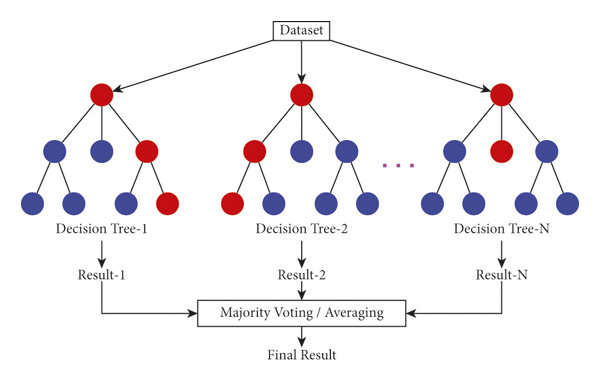

Ada 9 fitur yang digunakan dalam modelling ini. 9 fitur ini diperoleh berdasarkan hasil feature selection menggunakan metode RFE. Dalam metode ini, awalnya digunakan seluruh fitur yang ada lalu akan dikeluarkan satu per satu fitur yang kurang penting hingga tersisa jumlah fitur yang telah ditentukan.



Pertama-tama metode ini akan memasukkan satu fitur yang dianggap paling penting. Lalu terus menambahkan fitur yang terpenting selanjutnya. Hal ini dilakukan sampai kriteria tertentu terpenuhi. Misalkan pada modelling ini ternyata 10 fitur saja sudah cukup untuk membentuk model dengan akurasi yang bagud



# final model interpretation

## Feature Importance

In [234]:
feat_imp = best_model.named_steps['model'].feature_importances_
features = best_model.named_steps['transformer'].get_feature_names_out()

df_feat_imp = pd.DataFrame({
    'features': features[1:10],
    'importance': feat_imp
}).sort_values(by = 'importance', ascending = False)
df_feat_imp

features  importance
4     one hot__contact_telephone    0.419113
7                  binary__job_0    0.163701
8                  binary__job_1    0.130647
3              one hot__loan_yes    0.083963
6      one hot__poutcome_success    0.050563
0        one hot__marital_single    0.044339
1           one hot__default_yes    0.037734
5  one hot__poutcome_nonexistent    0.036517
2           one hot__housing_yes    0.033424

<Axes: xlabel='importance', ylabel='features'>

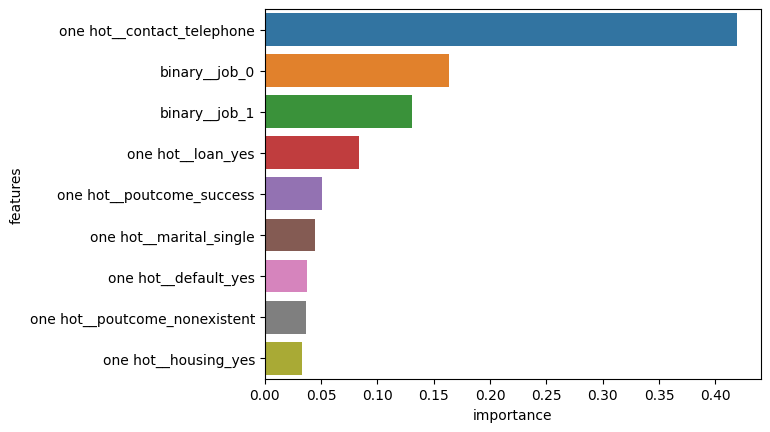

In [235]:
sns.barplot(x = 'importance', y = 'features', data = df_feat_imp)

Berdasarkan barplot feature importances di atas terdapat 3 fitur yang memiliki pengaruh yang cukup signifikan dalam membangung model yaitu fitur contact_telephone  sebesar 0.419113, binary__job_0 sebesar 0.163701 dan binary__job_1 sebesar 0.130647. Sementara fitur-fitur sisanya menymbang pengaruh yang cukup kecil dibawah 0,1

## Limitasi

Selanjutnya akan dicek limitasi pada data tes untuk melihat penyumbang proporsi terbesar kesalahan prediksi kelas positive (False Positive) dari 9 fitur yang digunakan dalam modelling

In [254]:
ab=pd.DataFrame(y_pred)
df_test=X_test.reset_index(drop=True)
df_test['predict']=ab
df_test['y']=y_test.reset_index(drop=True)
df_test['predict flag']=['yes' if df_test['y'][i] == df_test['predict'][i] else 'no' for i in range(len(df_test))]
df_test_FP= df_test[(df_test['y'] == 0) & (df_test['predict'] == 1)]
df_test_FP

age            job  marital            education default housing loan  \
10     31    blue-collar   single    university.degree      no      no   no   
12     23        student   single    university.degree      no     yes   no   
14     39    blue-collar   single             basic.4y      no     yes   no   
20     29  self-employed  married  professional.course      no      no   no   
46     34      housemaid   single             basic.4y      no      no   no   
...   ...            ...      ...                  ...     ...     ...  ...   
7201   71        retired  married             basic.4y      no     yes   no   
7244   57     technician  married  professional.course      no      no   no   
7275   58         admin.  married          high.school      no     yes   no   
7299   27        student   single    university.degree      no     yes   no   
7309   32     technician   single    university.degree      no     yes   no   

        contact month day_of_week  duration  campaign          pdays  \
10     cellular   aug         wed       174         2  not contacted   
12     cellular   sep         fri       349         2        1 weeks   
14    telephone   mar         tue       137         3  not contacted   
20    telephone   jun         wed       632         1  not contacted   
46     cellular   jun         mon       157         1  not contacted   
...         ...   ...         ...       ...       ...            ...   
7201  telephone   sep         thu      2055         1  not contacted   
7244   cellular   nov         tue       564         1  not contacted   
7275  telephone   may         mon       574         3  not contacted   
7299  telephone   aug         wed       153         1        1 weeks   
7309   cellular   aug         thu       588         1  not contacted   

      previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  \
10           0  nonexistent          -2.9          92.201          -31.4   
12           4      failure          -1.1          94.199          -37.5   
14           0  nonexistent          -1.8          92.843          -50.0   
20           0  nonexistent           1.4          94.465          -41.8   
46           0  nonexistent          -2.9          92.963          -40.8   
...        ...          ...           ...             ...            ...   
7201         0  nonexistent          -3.4          92.379          -29.8   
7244         0  nonexistent          -3.4          92.649          -30.1   
7275         0  nonexistent           1.1          93.994          -36.4   
7299         5      success          -1.7          94.027          -38.3   
7309         0  nonexistent           1.4          93.444          -36.1   

      euribor3m  nr.employed  predict  y predict flag  
10        0.879       5076.2        1  0           no  
12        0.879       4963.6        1  0           no  
14        1.687       5099.1        1  0           no  
20        4.962       5228.1        1  0           no  
46        1.260       5076.2        1  0           no  
...         ...          ...      ... ..          ...  
7201      0.809       5017.5        1  0           no  
7244      0.715       5017.5        1  0           no  
7275      4.857       5191.0        1  0           no  
7299      0.900       4991.6        1  0           no  
7309      4.963       5228.1        1  0           no  

[610 rows x 23 columns]

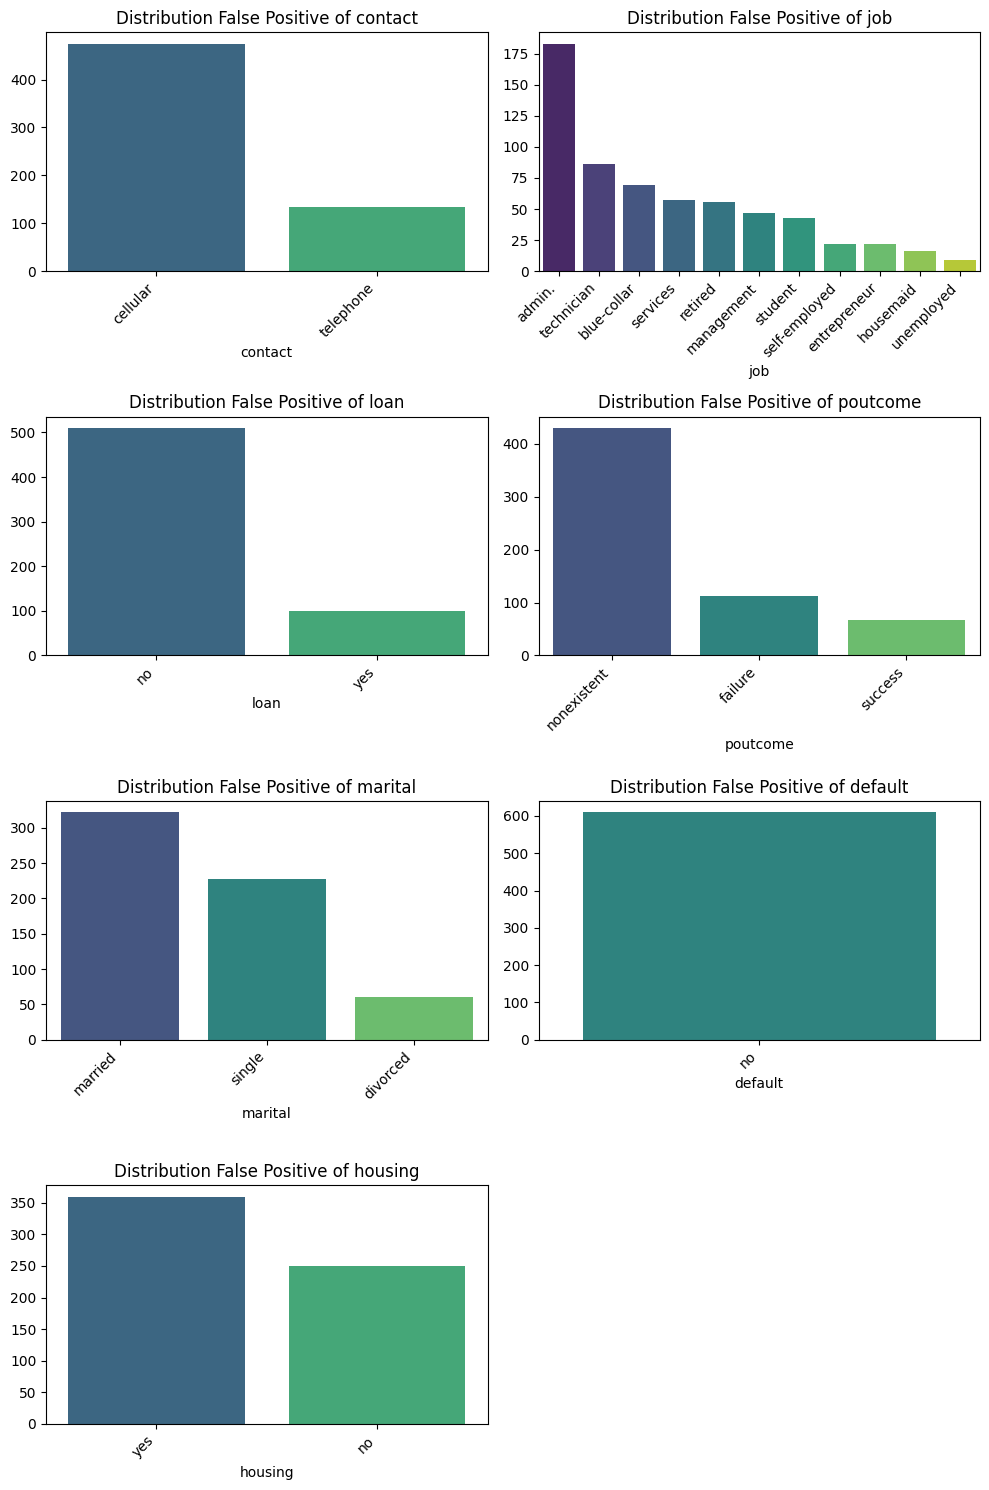

In [278]:
categorical_features = ['contact','job','loan','poutcome','marital','default','housing']

plt.figure(figsize=(10, 15))  # Adjust figure size as needed

positions = 1
for feature in categorical_features:
    plt.subplot(4, 2, positions)
    feature_dist = df_test_FP[feature].value_counts()
    sns.barplot(x=feature_dist.index, y=feature_dist.values, palette='viridis')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.title(f'Distribution False Positive of {feature}')
    positions += 1
plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

Berdasarkan barplot di atas ada beberapa fitur dengan value tertentu yang kesalahan prediksi (False Positive) nya lumayan besar sebagai berikut

| Feature | Range |
|---|---|
| Contact | Cellular |
| Job | Admin |
| Loan | No |
| Poutcome | Nonexistant |
| Marital | Married, Single |
| Default | No |
| Default | Yes |


## **Estimasi Keuntungan (berdasarkan data tes)**

<Axes: >

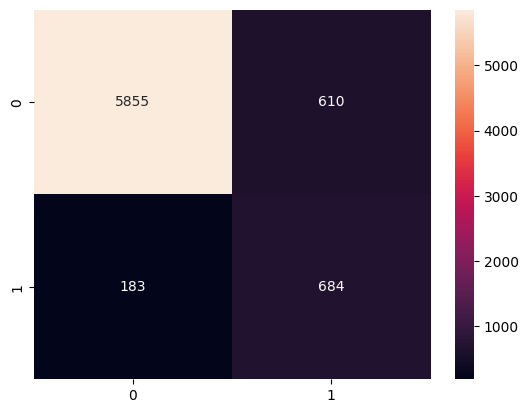

In [237]:
confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt='d')


Dengan membandingkan hasil evaluasi model rule-based dan machine learning, kita dapat menghitung estimasi keuntungan berdasarkan informasi biaya dan potensi pendapatan yang telah diberikan.
-   *Data Dasar*
  1. *Total Nasabah*: 36,658 nasabah  
  2. *Recall Rule-Based*: 0.2053
  3. *Recall Machine Learning*: 0.7889  
  4. *Potensi pendapatan per nasabah (FN)*: €1.48  
  5. *Biaya per panggilan telemarketing (FP)*: €1.115  
  6. *Precision Rule-Based*: 0.1121  
  7. *Precision Machine Learning*: 0.5285  
- *Perhitungan*
  *Hilangnya Potensi Pendapatan (FN)*  
  FN terjadi ketika nasabah yang sebenarnya setuju untuk deposito tidak terdeteksi oleh model.  
      - FN Rule-Based = Total Nasabah x (1 - Recall Rule-Based)  
        = 36,658 x (1 - 0.2053) = 29,138 nasabah.
      - FN Machine Learning = Total Nasabah x (1 - Recall Machine Learning)  
        = 36,658 x (1 - 0.7889) = 7,734 nasabah.  
      Potensi pendapatan yang hilang:  
        - Rule-Based: 29,138 x €1.48 = €43,124.24
        - Machine Learning:7734 x €1.48 = €11,442.32 
      Pengurangan Kerugian Potensi Pendapatan
      43,124.24 - 11,442.32 = €31,681.92
  *Biaya Panggilan Telemarketing (FP)*
  <br>FP terjadi ketika nasabah diprediksi setuju tetapi sebenarnya tidak.  
      - FP Rule-Based = Total Nasabah x (1 - Precision Rule-Based) x Recall Rule-Based  
        = 36,658 x (1 - 0.122) x 0.5836 = 33,267 nasabah.
      - FP Machine Learning = Total Nasabah (1 - Precision Machine Learning) x Recall Machine Learning  
        = 36,658 x (1 - 0.5285) x 0.7889 = 13,640 nasabah.  
      Biaya panggilan telemarketing:  
      - Rule-Based: 33,267 x €1.115 = €37,090.91
      - Machine Learning: 13,640 x €1.115 = €15,211.60
      Pengurangan Biaya Telemarketing:  
      €37,090.91 - €15,211.60=€21,879.31
- *Estimasi Total Keuntungan*
  - Pengurangan kerugian potensi pendapatan: 31,681.92
  - Pengurangan biaya telemarketing: €21,879.31
  *Total Keuntungan dengan Model Machine Learning*: 
     €31,681.92+€21,879.31=€53,561.23 
<br>
*Insight*<br>
Revisi analisis menunjukkan bahwa dengan implementasi model machine learning, recall meningkat dari 0.2053 menjadi 0.7889, sehingga potensi kerugian akibat nasabah yang tidak terdeteksi (FN) berkurang secara signifikan sebesar 31,681.92. Selain itu, precision yang lebih baik pada model machine learning juga mengurangi biaya telemarketing untuk FP sebesar 21,879.31. Secara keseluruhan, model machine learning memberikan keuntungan bersih sebesar €53,561.23, menjadikannya solusi yang jauh lebih efisien dan menguntungkan dibandingkan pendekatan rule-based sebelumnya.
  

# **Menjawab Pertanyaan**

### **Apa Saja Faktor Yang Memengaruhi Keputusan Nasabah Untuk Menerima Tawaran Deposito?**

Keputusan nasabah untuk menerima tawaran deposito dipengaruhi oleh berbagai faktor, mulai dari karakteristik demografi, durasi dan frekuensi kontak selama kampanye, hingga pengalaman dari kampanye sebelumnya. Berikut adalah penjelasan berdasarkan analisis data:  

**1. Karakteristik Demografi**  
- **Usia**  
Nasabah dalam kategori *adult* mendominasi dengan jumlah total  51.2% dari populasi, namun memiliki *conversion rate* (CR) terendah, yakni 9.75%. Sebaliknya, kategori usia *teenage* (40.00%) dan *elderly* (40.76%) mencatat CR tertinggi. Strategi kampanye perlu difokuskan pada nasabah dewasa karena peluang akuisisi masih sangat besar dengan gap CR yang signifikan.  

- **Profesi**  
Profesi *admin*, *technician*, dan *blue-collar* mencatat jumlah nasabah tertinggi dan memberikan kontribusi terbesar terhadap proporsi kampanye. Namun, profesi *student* (CR 32.52%) dan *retired* (CR 27.35%) menunjukkan tingkat keberhasilan yang lebih tinggi, sejalan dengan pola CR berdasarkan usia. Dengan demikian, strategi dapat diarahkan untuk lebih menggali potensi konversi pada profesi dengan jumlah besar dan CR moderat.  

- **Status Pernikahan**  
Nasabah *single* memiliki CR tertinggi (14.43%), dibandingkan dengan *married* (10.75%) dan *divorced* (10.83%). Pada kategori *adult*, tren serupa ditemukan, dengan *single* mencatat CR tertinggi (11.56%).  

- **Pendidikan Terakhir**  
Nasabah dengan tingkat pendidikan terakhir *university degree* merupakan kelompok terbesar (31.9%) dan memiliki CR yang tinggi (14.26%), sehingga menjadi target potensial. Meskipun nasabah dengan pendidikan rendah, seperti *illiterate*, menunjukkan CR tinggi (25.00%), kontribusi mereka terhadap kampanye sangat kecil karena jumlahnya yang minim.  


**2. Durasi dan Frekuensi Kontak**  
- **Durasi Kontak**  
Durasi percakapan yang lebih panjang terbukti meningkatkan efektivitas kampanye. Percakapan dengan durasi di atas 1000 detik mencapai CR puncak sebesar 59.55%. Strategi perlu difokuskan pada interaksi yang mendalam dan informatif untuk meningkatkan konversi.  

- **Frekuensi Kontak**  
Frekuensi kontak yang ideal adalah 1–3 kali, dengan CR tertinggi sebesar 13.04%. Sebaliknya, frekuensi lebih dari 9 kali justru mengurangi efektivitas kampanye, menunjukkan perlunya menghindari over-communication yang dapat mengganggu nasabah.  

**3. Pengalaman Kampanye Sebelumnya**  
- **Jumlah Kontak Sebelumnya (previous)**  
Nasabah yang telah dihubungi lebih dari sekali pada kampanye sebelumnya menunjukkan CR hingga 72.22%, menegaskan pentingnya membangun hubungan berkelanjutan.  

- **Jarak Waktu dari Kontak Terakhir (pdays)**  
Jarak waktu ideal adalah 2–6 minggu sejak kontak terakhir, dengan CR tertinggi hingga 87.50% pada interval ini.  

- **Hasil Kampanye Sebelumnya (POutcome)**  
Nasabah yang berhasil dikonversi pada kampanye sebelumnya memiliki peluang konversi tertinggi (CR 65.23%), sementara mereka yang gagal sebelumnya tetap menunjukkan peluang sebesar 14.37%.  

---
**Kesimpulan Strategis**  
Keputusan nasabah untuk menerima tawaran deposito dipengaruhi oleh kombinasi faktor demografi, kualitas interaksi, dan pengalaman sebelumnya. Kampanye yang efektif perlu:  
1. Menargetkan nasabah dewasa (*adult*) sebagai prioritas utama, dengan mempertimbangkan profesi dominan seperti *admin*, *technician*, dan *blue-collar*.  
2. Meningkatkan durasi dan kualitas percakapan, memastikan frekuensi kontak tetap optimal (1–3 kali).  
3. Memanfaatkan data kampanye sebelumnya untuk mendukung personalisasi pendekatan, terutama untuk nasabah dengan riwayat interaksi positif.  

Dengan pendekatan berbasis data ini, peluang keberhasilan kampanye deposito dapat dimaksimalkan.

### **Bagaimana Pengaruh Status Kredit Nasabah Terhadap Hasil Kampanye Saat Ini?**

Dari analisis yang dilakukan, status kredit (*default, housing,* dan *loan*) menunjukkan pengaruh yang beragam terhadap keputusan nasabah untuk berlangganan produk deposito. Berikut adalah kesimpulan utama dari hasil analisa:

**1. Status Pinjaman Pribadi (Loan):**  
Nasabah tanpa pinjaman pribadi (*loan: no*) memiliki tingkat *conversion rate* (CR) yang sedikit lebih tinggi (12.01%) dibandingkan dengan mereka yang memiliki pinjaman pribadi (*loan: yes*), yang hanya mencapai CR sebesar 10.94%.  
- **Interpretasi:**  
  Hal ini menunjukkan bahwa nasabah tanpa pinjaman pribadi cenderung lebih mungkin menerima tawaran deposito. Meski selisihnya kecil (1.07%), ini mengindikasikan bahwa adanya kewajiban pinjaman pribadi dapat memengaruhi keputusan nasabah untuk berinvestasi di deposito.  
- **Signifikansi Statistik:**  
  P-value sebesar 0.017 mendukung kesimpulan bahwa status pinjaman pribadi memiliki pengaruh terhadap keputusan nasabah.  

**2. Status Kredit Rumah (Housing):**  
Perbedaan CR antara nasabah yang memiliki kredit rumah (*housing: yes*, 11.62%) dan tanpa kredit rumah (*housing: no*, 12.13%) sangat kecil (0.51%).  
- **Interpretasi:**  
  Data ini menunjukkan bahwa status kredit rumah tidak memberikan pola yang jelas terhadap kemungkinan nasabah menerima tawaran deposito. Dengan perbedaan yang kecil, pengaruh variabel ini terhadap keputusan nasabah dianggap tidak signifikan.  
- **Signifikansi Statistik:**  
  P-value yang besar (1.0) memperkuat bahwa status kepemilikan kredit rumah tidak memengaruhi keputusan kampanye secara signifikan.  

**3. Status Default Kredit (Default):**  <br>
  Dalam konteks ini, nasabah dengan status *default* tidak menunjukkan pengaruh yang signifikan terhadap keputusan untuk mengambil deposito. Hal ini didukung oleh nilai P-value yang besar (> 0.05), yang menunjukkan bahwa variabel ini tidak relevan dalam memprediksi keputusan nasabah.  

Dari ketiga variabel kredit yang dianalisis (*default, housing,* dan *loan*), hanya status pinjaman pribadi (*loan*) yang menunjukkan pengaruh signifikan terhadap keputusan nasabah. Nasabah tanpa pinjaman pribadi lebih cenderung untuk mengambil produk deposito. Namun, status kredit rumah (*housing*) dan status default tidak memiliki pengaruh yang jelas terhadap hasil kampanye deposito.  

Strategi kampanye dapat dioptimalkan dengan memprioritaskan nasabah tanpa pinjaman pribadi untuk meningkatkan tingkat keberhasilan kampanye deposito.

## **Saluran Komunikasi Apa Yang Paling Efektif Untuk Meningkatkan Tingkat Penerimaan Tawaran Deposito?**
- Kontak melalui cellular memiliki tingkat keberhasilan (Conversion Rate, CR) yang lebih tinggi, yaitu 15,18%, dibandingkan dengan kontak melalui telephone yang hanya mencapai 5,54%.
- Cellular juga memberikan kontribusi terbesar terhadap keberhasilan kampanye (Participation Rate, PR), yaitu 9,91%, dibandingkan telephone yang hanya 1,93%.
- Sebagian besar nasabah yang tidak berlangganan dihubungi melalui cellular (55,35%), yang sejalan dengan volume kontak yang lebih besar dibandingkan dengan telephone. Sedangkan telephone menyumbang 32,82% dari total nasabah yang tidak berlangganan, menunjukkan efektivitas yang lebih rendah.

<br>

**Insight**<br>
Kontak melalui cellular terbukti lebih efektif dalam meningkatkan peluang keberhasilan kampanye dibandingkan dengan telephone. Kampanye di masa depan sebaiknya lebih memprioritaskan penggunaan kontak cellular untuk mencapai hasil yang lebih optimal.

## **Bagaimana Kondisi Ekonomi Makro Memengaruhi Keputusan Nasabah Untuk Menerima Tawaran Deposito?**

Berdasarkan analisis dari dataset yang digunakan, **Keputusan nasabah untuk menerima tawaran deposito sangat dipengaruhi oleh stabilitas indikator ekonomi**.**Ketika kondisi ekonomi menunjukkan ketidakpastian** —seperti tingkat pengangguran tinggi, inflasi meningkat, kepercayaan konsumen rendah, atau kenaikan suku bunga jangka pendek— **nasabah lebih cenderung memilih deposito** karena dianggap sebagai instrumen yang aman dan stabil. Dalam situasi ini, deposito memberikan perlindungan terhadap risiko dan ketidakpastian pendapatan. Sebaliknya, dalam kondisi ekonomi yang stabil dan optimis, di mana daya beli meningkat, indeks kepercayaan konsumen tinggi, dan suku bunga rendah, nasabah cenderung lebih tertarik pada investasi yang berisiko namun menawarkan potensi pengembalian yang lebih tinggi. Dengan memahami pola ini, bank dapat menyesuaikan strategi kampanye untuk menonjolkan keamanan deposito di masa tidak stabil, dan memberikan insentif tambahan untuk tetap kompetitif pada masa stabilitas ekonomi.

## **Kapan Waktu Terbaik Untuk Menjalankan Kampanye Promosi?**

Berdasarkan analisis data indikator ekonomi dan pola keberhasilan kampanye berdasarkan *month* dan *day_of_week*, waktu terbaik untuk menjalankan kampanye deposito dapat dirangkum sebagai berikut:

**1. Berdasarkan Bulan (Month)**

- **Kondisi Optimal:**  
  Kampanye deposito paling efektif dijalankan pada bulan **Maret, September, dan Desember**. Ketiga bulan ini sering kali bertepatan dengan situasi ekonomi yang stabil atau mencerminkan pola kebutuhan finansial masyarakat, seperti adanya kelebihan dana dari bonus akhir tahun atau perencanaan keuangan di awal dan akhir kuartal.

- **Rasionalisasi:**  
  Bulan-bulan ini cenderung menunjukkan peningkatan minat masyarakat terhadap deposito, baik karena daya beli stabil (inflasi terkendali) maupun karena adanya kebutuhan untuk mengamankan aset dalam periode dengan ketidakpastian tenaga kerja yang rendah.

**2. Berdasarkan Hari dalam Seminggu (Day of Week)**

- **Hari Terbaik untuk Kampanye Umum:**  
  **Kamis (Thursday)** memiliki tingkat keberhasilan (*Conversion Rate, CR*) tertinggi (**12.65%**) dan partisipasi (*Participation Rate, PR*) terbaik (**2.67%**).  
  Alternatif yang cukup efektif adalah **Rabu (Wednesday)** dan **Selasa (Tuesday)**, yang juga menunjukkan CR di atas rata-rata.

- **Rekomendasi Berdasarkan Profesi:**  
  - **Admin:** Kamis adalah hari utama dengan tingkat CR terbaik untuk profesi ini.  
  - **Teknisi dan Blue Collar:** Selasa menjadi hari yang paling efektif untuk menjangkau kelompok ini, dengan Jumat sebagai pilihan cadangan.  
  - **Profesi Lainnya:** Kampanye untuk profesi umum sebaiknya diarahkan pada Kamis, atau Rabu jika Kamis tidak memungkinkan.

- **Hari dengan Peluang Peningkatan:**  
  Meskipun CR pada Senin (**10.47%**) lebih rendah, hari ini tetap memiliki jumlah panggilan tertinggi. Dengan strategi komunikasi yang diperbaiki, seperti pendekatan personal yang relevan dengan situasi ekonomi, potensi keberhasilannya dapat ditingkatkan.

# **Kesimpulan**

## **Kesimpulan Analisis Data**

Analisis terhadap kampanye deposito bank menunjukkan bahwa hasil yang dicapai masih jauh dari optimal meskipun terjadi peningkatan skala kampanye. Tingkat penerimaan menurun dari 25,2% pada kampanye sebelumnya menjadi hanya 11,8% saat ini, yang mengindikasikan bahwa skala besar tidak diiringi dengan pendekatan yang efektif terhadap segmen yang ditargetkan. Beberapa fenomena penting yang didapatkan dari hasil analisis data adalah sebagai berikut:  

1. **Ketergantungan pada Nasabah Baru:**  
   Sebagian besar keberhasilan berasal dari nasabah baru yang tidak terlibat dalam kampanye sebelumnya (67,1%). Hal ini menunjukkan potensi besar pada segmen baru, tetapi juga menyoroti kurangnya strategi retensi untuk nasabah yang sebelumnya berhasil.  

2. **Perbedaan Karakteristik Nasabah:**  
   Nasabah dengan profil tertentu, seperti usia lanjut dan profesi tertentu (*student, retired*), memiliki tingkat keberhasilan kampanye yang tinggi, meskipun jumlahnya kecil. Strategi kampanye perlu lebih berfokus pada segmen ini sambil mengoptimalkan peluang pada kelompok dengan kontribusi besar seperti *admin, technician,* dan *blue-collar*.  

3. **Durasi dan Frekuensi Interaksi:**  
   Durasi percakapan yang lebih panjang (>800 detik) dan frekuensi kontak yang optimal (1–3 kali) terbukti meningkatkan tingkat keberhasilan. Sebaliknya, kontak berlebihan (lebih dari 9 kali) menurunkan efektivitas.  

4. **Pengaruh Status Kredit:**  
   Status kredit pribadi (*loan*) menunjukkan dampak signifikan terhadap keputusan nasabah, di mana nasabah tanpa pinjaman lebih cenderung menerima tawaran. Namun, status *default* dan kredit rumah (*housing*) tidak memberikan pengaruh yang jelas.  

5. **Pengaruh Ekonomi Makro:**  
   Nasabah lebih cenderung memilih deposito pada masa ketidakpastian ekonomi, di mana stabilitas menjadi prioritas. Dalam kondisi ekonomi yang optimis, minat terhadap investasi dengan risiko lebih tinggi meningkat.  

6. **Efektivitas Saluran Komunikasi:**  
   *Cellular contact* adalah saluran yang paling efektif, dengan tingkat konversi dan partisipasi yang jauh lebih tinggi dibandingkan *telephone*.  

7. **Waktu Optimal Kampanye:**  
   Bulan Maret, September, dan Desember adalah periode terbaik, sementara Kamis menjadi hari yang paling efektif untuk menjalankan kampanye.  

## **Kesimpulan Machine Learning**

1. Model terbaik yang diperoleh selama proses pemodelan untuk mengklasifikasi nasabah yang akan membuat deposito adalah model Random Forest dengan Resampling Neighbourhood Cleaning Rule dan menggunakan 9 fitur yang diperoleh dari metode RFE 
2. Hasil hyperparameter tunning tidak digunakan karena tidak ada perubahan yang cukup signifikan setelah model based dilakukan tunning.
3. Best model yang diperoleh memiliki score recall 78,89%. Ini mengindikasikan bahwa dari 100 nasabah yang mengajukan deposito, 78 nasabah yang mengajukan deposito berhasil diprediksi model dengan benar sementara 22 nasabah diprediksi tidak mengajukan deposito
4. Fitur yang paling berpengaruh dalam best model adalah contact dan job
5. Kesimpulan dari model machine learning memberikan keuntungan bersih sebesar 53,561.23 euro, menjadikannya solusi yang jauh lebih efisien dan menguntungkan dibandingkan pendekatan rule-based sebelumnya.

# **Rekomendasi**

## **Rekomendasi Untuk Bisnis**

Berikut adalah rekomendasi untuk meningkatkan peluang keberhasilan kampanye deposito selanjutnya dengan tetap mempertimbangkan efisiensi dan keuntungan bisnis:  

**1. Fokus pada Segmentasi Nasabah**
- **Targetkan Nasabah Potensial Berdasarkan Riwayat dan Demografi:**
  - Prioritaskan nasabah lama dengan riwayat positif dari kampanye sebelumnya, terutama yang pernah berhasil dikonversi. Berikan insentif seperti bonus bunga atau program loyalitas untuk meningkatkan retensi.
  - Optimalkan segmentasi berdasarkan usia, profesi, dan pendidikan. Fokuskan kampanye pada kelompok *adult* dan *university graduates*, yang memiliki potensi volume dan *conversion rate* (CR) tinggi.
- **Optimalkan untuk Nasabah Baru:**  
  - Maksimalkan komunikasi kepada segmen nasabah *nonexistent* (nasabah baru) melalui pendekatan personal yang berbasis data.
  - Rancang program *“welcome deposit package”* untuk menarik perhatian nasabah baru dengan skema bunga kompetitif untuk periode awal.

**2. Optimalisasi Saluran Komunikasi**
- **Gunakan Saluran Cellular Sebagai Kanal Utama:**  
  Saluran *cellular* terbukti lebih efektif dengan tingkat CR lebih tinggi dibandingkan *telephone*. Fokuskan sumber daya pada pelatihan tim untuk memaksimalkan pendekatan personal melalui *cellular*.
- **Automasi dan Personalisasi melaluik kanal digital:**  
  Perluas kanal telemarketing lain seperti merapkan E-mail marketing, teknologi *chatbots* dan platform digital untuk menjangkau nasabah dengan pesan personal berdasarkan pola perilaku mereka. Saluran ini dapat mengurangi biaya dan meningkatkan skala komunikasi.

**3. Penyesuaian Waktu Kampanye**
- **Bulan dan Hari Optimal:**  
  - Lakukan kampanye pada bulan Maret, September, dan Desember untuk memanfaatkan momen stabilitas ekonomi atau peningkatan kebutuhan investasi.
  - Prioritaskan kontak pada Kamis dan Selasa untuk meningkatkan efektivitas.
- **Gunakan Data Ekonomi Makro:**  
  Sesuaikan jadwal kampanye dengan indikator ekonomi makro seperti tingkat pengangguran dan inflasi. Tonjolkan keamanan deposito saat ekonomi tidak stabil untuk menarik minat nasabah.

**4. Meningkatkan Durasi dan Kualitas Interaksi**
- **Peningkatan Durasi Kontak:**  
  Dorong tim penjualan untuk menghabiskan lebih banyak waktu berbicara dengan nasabah yang potensial. Pastikan pembicaraan bersifat edukatif dan relevan.
- **Hindari Over-Communication:**  
  Batasi jumlah kontak menjadi 1–3 kali untuk menghindari gangguan yang dapat menurunkan minat nasabah.

**5. Kampanye Berbasis Data dengan Machine Learning**
- **Prediksi Peluang Konversi:**  
  Implementasikan model *machine learning* untuk memprioritaskan nasabah berdasarkan peluang konversi. Ini akan mengurangi biaya kampanye pada segmen dengan potensi rendah.

- **Pengujian A/B untuk Strategi Kampanye:**  
  Uji pendekatan baru seperti penawaran bunga berbeda atau paket promosi untuk menentukan strategi terbaik.

**6. Efisiensi Biaya Operasional**
- **Manfaatkan Teknologi Otomasi:**  
  Gunakan platform *CRM* (Customer Relationship Management) untuk mencatat dan menganalisis hasil kampanye secara otomatis. Hal ini mengurangi waktu administrasi manual.
- **Peningkatan Pelatihan Tim Penjualan:**  
  Fokuskan pelatihan tim pada teknik penjualan berbasis kebutuhan nasabah. Ini dapat meningkatkan efektivitas interaksi tanpa meningkatkan biaya tenaga kerja.

Dengan kombinasi strategi ini, kampanye deposito tidak hanya akan menjadi lebih terfokus dan relevan bagi nasabah, tetapi juga memberikan hasil yang optimal dengan biaya operasional yang lebih efisien.

### **Rekomendasi Waktu Pelaksanaan Kampanye Berdasarkan Profesi**

Berdasarkan profesi yang ada, berikut adalah rekomendasi strategi waktu terbaik untuk menghubungi nasabah, disesuaikan dengan pola kerja dan kebiasaan dari masing-masing profesi. Strategi ini mempertimbangkan tingkat keterlibatan dan waktu yang tersedia untuk setiap kelompok profesi:

1. **Admin**
   - **Hari Terbaik:** **Kamis** (CR 13.24%, PR 2.71%, not subscribe 17.73%)
     - Kamis menunjukkan performa terbaik dengan tingkat konversi yang lebih tinggi dibandingkan hari lainnya.
   - **Waktu:** **Pagi hingga Siang (08:00 - 12:00)**, karena nasabah admin cenderung lebih aktif pada awal minggu dan tengah hari.
   
2. **Teknisi**
   - **Hari Terbaik:** **Jumat** (CR 11.89%, PR 2.13%, not subscribe 15.79%)
     - Jumat menunjukkan konversi tertinggi, meskipun pada hari lainnya seperti Selasa juga memiliki performa yang baik.
   - **Waktu:** **Pagi (08:00 - 10:00)** dan **Sore (15:00 - 17:00)**, karena teknisi mungkin memiliki jadwal yang lebih fleksibel pada hari Jumat dan cenderung lebih responsif pada waktu-waktu tersebut.
   
3. **Blue-Collar**
   - **Hari Terbaik:** **Rabu** (CR 7.77%, PR 1.72%, not subscribe 20.43%)
     - Rabu adalah hari dengan konversi terbaik untuk segmen blue-collar, meskipun performa turun pada hari lainnya.
   - **Waktu:** **Pagi hari (07:00 - 09:00)** dan **Sore hari (16:00 - 18:00)**, karena blue-collar lebih cenderung terlibat pada waktu-waktu ini setelah atau sebelum jam kerja mereka.

4. **Housemaid**
   - **Hari Terbaik:** **Selasa** hingga **Jumat** (Tengah minggu, dengan aktivitas lebih tenang)
   - **Waktu:** **Pagi 08:00 - 10:00** dan **Sore hari 04:00 - 16:00**, saat mereka mungkin memiliki waktu istirahat sebelum melanjutkan tugasnya.

5. **Services**
   - **Hari Terbaik:** **Selasa hingga Kamis**, terhindar dari kekacauan Senin dan mulai mempersiapkan akhir pekan pada Jumat
   - **Waktu:** **Pagi hari (09:00 - 11:00)** dan **Sore hari (16:00 - 17:30)** saat mereka sudah menyelesaikan sebagian besar tugas mereka.

6. **Retired**
   - **Hari Terbaik:** **Selasa hingga Kamis** karena mereka cenderung lebih santai dan memiliki lebih banyak waktu luang di week-day dan cenderung sibuk di akhir pekan.
   - **Waktu:** **Pagi hari (09:00 - 11:00)** dan **Sore hari (13:00 - 15:00)**.

7. **Unemployed**
   - **Hari Terbaik:** **Senin hingga Jumat** karena fleksibilitas waktu mereka yang tinggi.
   - **Waktu:** **Pagi hari (09:00 - 11:00)** dan **Sore hari (15:00 - 17:00)**.

8. **Management**
   - **Hari Terbaik:** **Selasa hingga Kamis** karena mereka cenderung memiliki jadwal lebih padat di awal minggu dan menjelang akhir pekan.
   - **Waktu:** **Pagi hari (08:00 - 09:30)** dan **Sore hari (15:00 - 16:30)** sebelum rapat atau kegiatan lainnya dimulai.

9. **Entrepreneur**
   - **Hari Terbaik:** **Selasa hingga Kamis**, dengan fokus pada pekerjaan bisnis yang lebih terkendali pada hari-hari tersebut.
   - **Waktu:** **Pagi hari (09:00 - 10:30)** dan **Sore hari (15:00 - 17:00)** karena mereka cenderung sangat sibuk di akhir pekan.

10. **Student**
   - **Hari Terbaik:** **Senin hingga Jumat** yang secara garis besar memiliki aktivitas yang cenderung memiliki beban yang sama setiap harinya
   - **Waktu:** **Pagi hari (08:00 - 10:00)** dan **Sore hari (15:00 - 17:00)**, setelah mereka selesai dengan kegiatan akademik.

11. **Self-Employed**
   - **Hari Terbaik:** **Senin hingga Jumat**, dengan jadwal yang lebih fleksibel
   - **Waktu:** **Pagi hari(09:00 - 11:00)** dan **Sore sore hari(15:00 - 17:00)**, mengingat mereka memiliki waktu lebih bebas dibandingkan pekerja kantor.

### **Rekomendasi untuk Model**

Berikut adalah beberapa rekomendasi untuk studi kasus ini: 
- *Pengembangan model model:* Model yang sudah dibangun dapat digunakan sebagai dasar untuk pengembangan model selanjutnya, seperti menerapkan pembelajaran tanpa pengawasan (unsupervised learning) dengan metode clustering untuk melakukan segmentasi pelanggan yang menguntungkan dan tidak menguntungkan, sehingga strategi pemasaran dapat ditingkatkan.
Kami juga menyarankan agar bank dapat memberikan lebih banyak informasi yang lebih spesifik mengenai data nasabah misalnya seperti pendapatan dan jumlah tanggungan nasabah.

- *Hyperparameter Tuning Lebih Lanjut:* Melakukan pencarian hyperparameter yang lebih ekstensif untuk menemukan kombinasi optimal yang dapat meningkatkan kinerja model.

- *Integrasi dengan Sistem CRM:* Mengintegrasikan model prediksi nasabah potensial dengan sistem Customer Relationship Mxanagement (CRM) untuk memberikan wawasan yang dapat ditindaklanjuti kepada tim penjualan dan pemasaran.

- *Pemantauan Kinerja Model:* Memantau kinerja model secara berkala dan melakukan pembaruan jika diperlukan untuk memastikan akurasi prediksi tetap optimal.


## **Save Model**

In [ ]:
from google.colab import files

# save model
with open('finale.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# load model
with open('finale.pkl', 'rb') as f:
    model_load = pickle.load(f)